<a href="https://colab.research.google.com/github/harmansingh25/Political-Bias-In-Hate-Speech/blob/main/BiLSTM_Pol_Bias_USA_BeforeCNMidsem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install numpy
!pip install pickle
!pip install sys
!pip install sklearn
!pip install nltk
!pip install string
!pip install re
!pip install os
!pip install vanderSentiment
!pip install textstat
!pip install tweet_preprocess

ERROR: Could not find a version that satisfies the requirement pickle (from versions: none)
ERROR: No matching distribution found for pickle
ERROR: Could not find a version that satisfies the requirement sys (from versions: none)
ERROR: No matching distribution found for sys
ERROR: Could not find a version that satisfies the requirement string (from versions: none)
ERROR: No matching distribution found for string
ERROR: Could not find a version that satisfies the requirement re (from versions: none)
ERROR: No matching distribution found for re
ERROR: Could not find a version that satisfies the requirement os (from versions: none)
ERROR: No matching distribution found for os
ERROR: Could not find a version that satisfies the requirement vanderSentiment (from versions: none)
ERROR: No matching distribution found for vanderSentiment
     |████████████████████████████████| 101 kB 3.7 MB/s 
     |████████████████████████████████| 2.0 MB 39.0 MB/s 
ERROR: Could not find a version that satisf

In [ ]:
!pip install vaderSentiment
!pip install tweet-preprocessor
!pip install importlib


     |████████████████████████████████| 125 kB 5.7 MB/s 
  Created wheel for importlib: filename=importlib-1.0.4-py3-none-any.whl size=5874 sha256=1305ba23e931b76bf7a67c0d89f210ade4b3394c7ffbbc34775d06cf37ff3475
  Stored in directory: /root/.cache/pip/wheels/86/e4/cb/62b0e9efd7da1e984baec0c0ded0b727a7ed25e1904ed51fca
Successfully built importlib


In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
import preprocessor as p


In [ ]:
import pandas as pd
import numpy as np
import pickle
import sys
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk.stem.porter import *
import string
import re
import os
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer as VS
from textstat.textstat import *
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.utils import shuffle

In [ ]:
import tensorflow as tf

from tensorflow import keras

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Embedding, LSTM, Bidirectional
import tensorflow.keras.backend as K

from sklearn.model_selection import KFold

import gc

In [ ]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
from collections import Counter

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
dfr1 = pd.read_csv("/content/drive/MyDrive/BTP/USA_pol_stance_annotate.csv")

In [ ]:
dfr1.head()

,Unnamed: 0,Unnamed: 0.1,text,pol_stance,Hate/Offensive/Non-hate
0,0,7,"Uh, Nancy doesn't scream, you do.\nNancy doesn...",0,Non-hate
1,1,50,Your Senate trial is about what you did as @PO...,3,Offensive
2,2,77,"2019 - More Trump tweets, more Trump lies, mor...",0,Non-hate
3,3,125,Don’t bother @realDonaldTrump with this...he’s...,0,Offensive
4,4,157,And trump has done what? Deal with North Korea...,0,Non-hate


In [ ]:
tweets = dfr1['text'].tolist()


In [ ]:
labels_data = dfr1['Hate/Offensive/Non-hate'].tolist()

In [ ]:
pol_stance = dfr1['pol_stance'].tolist()

In [ ]:
labels = []
 
for i in labels_data:
  if(i=='Hate' or i=='Offensive'):
    labels.append(1)
  else:
    labels.append(0)

In [ ]:
data = pd.DataFrame()

In [ ]:
data['label'] = labels
data['tweet'] = tweets
data['stance'] = pol_stance

In [ ]:
data.head()

,label,tweet,stance
0,0,"Uh, Nancy doesn't scream, you do.\nNancy doesn...",0
1,1,Your Senate trial is about what you did as @PO...,3
2,0,"2019 - More Trump tweets, more Trump lies, mor...",0
3,1,Don’t bother @realDonaldTrump with this...he’s...,0
4,0,And trump has done what? Deal with North Korea...,0


In [ ]:
data['stance'].value_counts()

0    2605
2    1050
4     194
1      82
3      75
Name: stance, dtype: int64

In [ ]:
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [ ]:
def clean_text(text):
  delete_dict = {sp_character: '' for sp_character in string.punctuation}
  delete_dict[' '] = ' '
  table = str.maketrans(delete_dict)
  text1 = text.translate(table)
  textArr = text1.split()
  text2 = ' '.join([w for w in textArr if (not w.isdigit() and (not w.isdigit() and len(w)>3))])
  return text2.lower()

In [ ]:
#Preprocessing dataset
data['tweet'] = data['tweet'].apply(remove_emoji)
data['tweet'] = data['tweet'].apply(clean_text)
data['Num_words_text'] = data['tweet'].apply(lambda x: len(str(x).split()))

In [ ]:
#Getting stance wise dataframes
data_0 = data.loc[data['stance'] == 0]
data_1 = data.loc[data['stance'] == 1]
data_2 = data.loc[data['stance'] == 2]
data_3 = data.loc[data['stance'] == 3]
data_4 = data.loc[data['stance'] == 4]


In [ ]:
data_0_train, data_0_test = train_test_split(data_0, test_size = 0.2, stratify = data_0['label'].tolist(), random_state = 0)

In [ ]:
data_1_train, data_1_test = train_test_split(data_1, test_size = 0.2, stratify = data_1['label'].tolist(), random_state = 0)

In [ ]:
data_2_train, data_2_test = train_test_split(data_2, test_size = 0.2, stratify = data_2['label'].tolist(), random_state = 0)

In [ ]:
data_3_train, data_3_test = train_test_split(data_3, test_size = 0.2, stratify = data_3['label'].tolist(), random_state = 0)

In [ ]:
data_4_train, data_4_test = train_test_split(data_4, test_size = 0.2, stratify = data_4['label'].tolist(), random_state = 0)

In [ ]:
#BASE TRAINING MODEL
frames_train = [data_0_train,data_1_train,data_2_train,data_3_train,data_4_train]
train_base = pd.concat(frames_train)

In [ ]:
#BASE TESTING MODEL
frames_test = [data_0_test,data_1_test,data_2_test,data_3_test,data_4_test]
test_base = pd.concat(frames_test)

In [ ]:
train_base = train_base.sample(frac = 1, random_state = 0)

In [ ]:
test_base = test_base.sample(frac = 1, random_state = 0)

In [ ]:
train_base.head()

,label,tweet,stance,Num_words_text
871,1,separating relevant from irrelevant relevant a...,0,24
1282,0,there cancer spread senate shame senrobportman...,0,15
509,1,should call them their offices something calle...,0,28
423,1,grow perdue there “but” when raised your right...,0,23
3317,1,“come chinatown” said speakerpelosi knew wante...,2,20


In [ ]:
test_base.head()

,label,tweet,stance,Num_words_text
1590,1,realdonaldtrump sentencing millions americans ...,0,15
1649,1,this here think reason medical staff getting s...,0,24
360,0,trump understanding constitution impeachment w...,0,15
1774,1,country fucked when president spew much bullsh...,0,20
978,1,senalexander people would they those chose ign...,0,24


In [ ]:
X_train = train_base['tweet'].tolist()
Y_train = train_base['label'].tolist()
X_test = test_base['tweet'].tolist()
Y_test = test_base['label'].tolist()

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
num_words = 50000
tokenizer = Tokenizer(num_words=num_words, oov_token ="unk")
tokenizer.fit_on_texts(X_train)

In [ ]:
x_train = np.array(tokenizer.texts_to_sequences(X_train))
x_test = np.array(tokenizer.texts_to_sequences(X_test))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  


In [ ]:
maxlen = 70
x_train = pad_sequences(x_train, padding='post', maxlen = maxlen)
x_test = pad_sequences(x_test, padding='post', maxlen = maxlen)

In [ ]:
train_labels = np.asarray(Y_train)
test_labels = np.asarray(Y_test)

In [ ]:
#Tensorflow dataset
train_ds = tf.data.Dataset.from_tensor_slices((x_train, train_labels))
test_ds = tf.data.Dataset.from_tensor_slices((x_test, test_labels))

In [ ]:
max_features = 50000
model = tf.keras.Sequential()
model.add(keras.layers.Embedding(max_features+1, 50, mask_zero=True))
model.add(Bidirectional(LSTM(64)))
model.add(keras.layers.Dense(16, activation=tf.nn.relu))
model.add(keras.layers.Dense(1, activation=tf.nn.sigmoid))

model.compile(optimizer=Adam(lr=0.001), loss='binary_crossentropy', metrics=['acc'])


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 50)          2500050   
                                                                 
 bidirectional (Bidirectiona  (None, 128)              58880     
 l)                                                              
                                                                 
 dense (Dense)               (None, 16)                2064      
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 2,561,011
Trainable params: 2,561,011
Non-trainable params: 0
_________________________________________________________________


In [ ]:
print(type(train_ds))

<class 'tensorflow.python.data.ops.dataset_ops.TensorSliceDataset'>


In [ ]:
epochs = 15
model.fit(train_ds.shuffle(5000).batch(1024), epochs = epochs, verbose=1)

Epoch 1/15
4/4 [==============================] - 15s 970ms/step - loss: 0.6923 - acc: 0.5331
Epoch 2/15
4/4 [==============================] - 4s 1s/step - loss: 0.6869 - acc: 0.5481
Epoch 3/15
4/4 [==============================] - 5s 1s/step - loss: 0.6800 - acc: 0.5481
Epoch 4/15
4/4 [==============================] - 5s 1s/step - loss: 0.6681 - acc: 0.5481
Epoch 5/15
4/4 [==============================] - 5s 1s/step - loss: 0.6427 - acc: 0.5705
Epoch 6/15
4/4 [==============================] - 5s 1s/step - loss: 0.5823 - acc: 0.6976
Epoch 7/15
4/4 [==============================] - 5s 1s/step - loss: 0.4641 - acc: 0.8421
Epoch 8/15
4/4 [==============================] - 5s 1s/step - loss: 0.3176 - acc: 0.9070
Epoch 9/15
4/4 [==============================] - 5s 1s/step - loss: 0.1921 - acc: 0.9410
Epoch 10/15
4/4 [==============================] - 5s 1s/step - loss: 0.1085 - acc: 0.9650
Epoch 11/15
4/4 [==============================] - 5s 1s/step - loss: 0.0639 - acc: 0.9800
Epoc

In [ ]:
Y_pred_prob = model.predict(x_test)

In [ ]:
import seaborn as sns

In [ ]:
import matplotlib.pyplot as plt


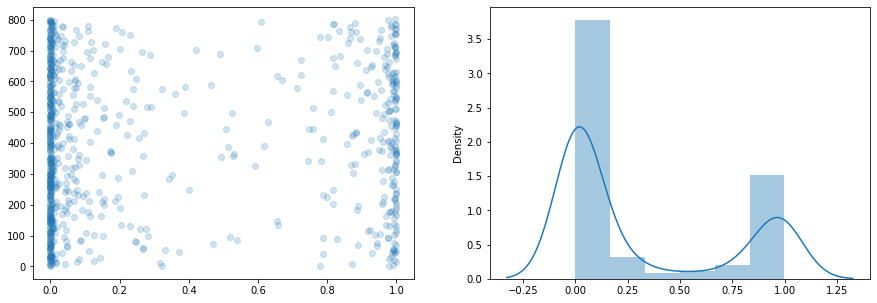

In [ ]:
f, (ax1, ax2) = plt.subplots(1,2,figsize = (15,5))
ax1.scatter(Y_pred_prob, range(0,len(Y_pred_prob)), alpha = 0.2)
ax2 = sns.distplot(Y_pred_prob) 

In [ ]:
import matplotlib as mp1

In [ ]:
import sklearn

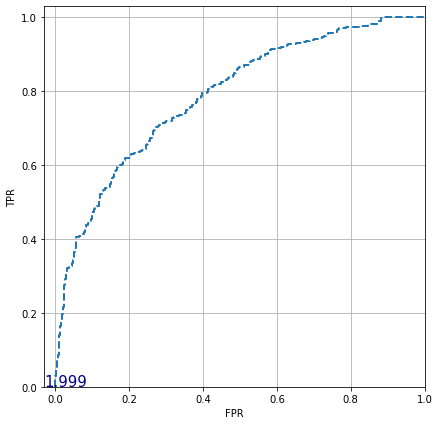

In [ ]:
def plot_roc(name, labels, predictions, **kwargs):
  fp, tp, thresholds = sklearn.metrics.roc_curve(labels, predictions)
  plt.plot(fp, tp, label = name, linewidth = 2, **kwargs)
  plt.xlabel("FPR")
  plt.ylabel("TPR")
  plt.xlim([-0.03, 1.0])
  plt.ylim([0.0, 1.03])
  plt.grid(True)
  thresholdsLength = len(thresholds)
  thresholds_every = 1000
  colorMap = plt.get_cmap('jet', thresholdsLength)
  for i in range(0, thresholdsLength, thresholds_every):
    threshold_value_with_max_four_decimals = str(thresholds[i])[:5]
    plt.text(fp[i]-0.03, tp[i]+0.001,threshold_value_with_max_four_decimals, fontdict={'size':15}, color=colorMap(i/thresholdsLength) )
  ax = plt.gca()
  ax.set_aspect('equal')
mp1.rcParams['figure.figsize'] = (7,7)
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
plot_roc("valid_baseline", test_labels, Y_pred_prob, color=colors[0], linestyle = '--')



In [ ]:
from sklearn.metrics import classification_report

In [ ]:
test_data = test_base.copy()

In [ ]:
cutoff = 0.7
test_data['pred_sentiment'] = Y_pred_prob
test_data['pred_sentiment'] = np.where((test_data.pred_sentiment>=cutoff), 1 ,test_data.pred_sentiment)
test_data['pred_sentiment'] = np.where((test_data.pred_sentiment<cutoff),0,test_data.pred_sentiment)
labels = [0,1]
print(classification_report(test_data['label'].tolist(), test_data['pred_sentiment'].tolist(), labels = labels))

              precision    recall  f1-score   support

           0       0.68      0.89      0.77       439
           1       0.78      0.49      0.60       363

    accuracy                           0.71       802
   macro avg       0.73      0.69      0.68       802
weighted avg       0.72      0.71      0.69       802



In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
print(accuracy_score(test_data['label'].tolist(), test_data['pred_sentiment'].tolist()))

0.7057356608478803


In [ ]:
test_data.head()

,label,tweet,stance,Num_words_text,pred_sentiment
1590,1,realdonaldtrump sentencing millions americans ...,0,15,1.0
1649,1,this here think reason medical staff getting s...,0,24,0.0
360,0,trump understanding constitution impeachment w...,0,15,0.0
1774,1,country fucked when president spew much bullsh...,0,20,1.0
978,1,senalexander people would they those chose ign...,0,24,1.0


In [ ]:
test_base.head()

,label,tweet,stance,Num_words_text
1590,1,realdonaldtrump sentencing millions americans ...,0,15
1649,1,this here think reason medical staff getting s...,0,24
360,0,trump understanding constitution impeachment w...,0,15
1774,1,country fucked when president spew much bullsh...,0,20
978,1,senalexander people would they those chose ign...,0,24


In [ ]:
dictI1={0: 'Anti-BJP',
1: 'Pro-BJP',
2: 'Anti-Congress',
3: 'Pro-Congress',
4: 'Anti-AAP',
5: 'Pro-AAP',
6: 'Other'}

dictI2 = {'Anti-BJP':0, 'Pro-BJP':0,'Anti-Congress':0, 'Pro-Congress':0, 'Anti-AAP':0, 'Pro-AAP':0, 'Other':0 }

In [ ]:
dict_In_Orig_hate = {'Anti-BJP':0, 'Pro-BJP':0,'Anti-Congress':0, 'Pro-Congress':0, 'Anti-AAP':0, 'Pro-AAP':0, 'Other':0 }
#dict_In_Orig_offensive = {'Anti-BJP':0, 'Pro-BJP':0,'Anti-Congress':0, 'Pro-Congress':0, 'Anti-AAP':0, 'Pro-AAP':0, 'Other':0 }
dict_In_Orig_nonHate = {'Anti-BJP':0, 'Pro-BJP':0,'Anti-Congress':0, 'Pro-Congress':0, 'Anti-AAP':0, 'Pro-AAP':0, 'Other':0 }

In [ ]:
dict_In_test_hate = {'Anti-BJP':0, 'Pro-BJP':0,'Anti-Congress':0, 'Pro-Congress':0, 'Anti-AAP':0, 'Pro-AAP':0, 'Other':0 }
#dict_In_test_offensive = {'Anti-BJP':0, 'Pro-BJP':0,'Anti-Congress':0, 'Pro-Congress':0, 'Anti-AAP':0, 'Pro-AAP':0, 'Other':0 }
dict_In_test_nonHate = {'Anti-BJP':0, 'Pro-BJP':0,'Anti-Congress':0, 'Pro-Congress':0, 'Anti-AAP':0, 'Pro-AAP':0, 'Other':0 }

In [ ]:
for index, row in test_data.iterrows():
    if(row['label']==0):
    
      dict_In_Orig_hate[dictI1[row['stance']]]+=1

    elif(row['label']==1):
      dict_In_Orig_nonHate[dictI1[row['stance']]]+=1


     
   
    if(row['pred_sentiment']==1):
        dict_In_test_hate[dictI1[row['stance']]]+=1

    elif(row['pred_sentiment']==0):
        dict_In_test_nonHate[dictI1[row['stance']]]+=1


In [ ]:
dict_In_Orig_hate

{'Anti-AAP': 47,
 'Anti-BJP': 104,
 'Anti-Congress': 40,
 'Other': 271,
 'Pro-AAP': 100,
 'Pro-BJP': 219,
 'Pro-Congress': 4}

In [ ]:
dict_In_Orig_nonHate

{'Anti-AAP': 14,
 'Anti-BJP': 23,
 'Anti-Congress': 11,
 'Other': 65,
 'Pro-AAP': 1,
 'Pro-BJP': 37,
 'Pro-Congress': 1}

In [ ]:
dict_In_test_hate

{'Anti-AAP': 10,
 'Anti-BJP': 9,
 'Anti-Congress': 4,
 'Other': 31,
 'Pro-AAP': 3,
 'Pro-BJP': 21,
 'Pro-Congress': 1}

In [ ]:
dict_In_test_nonHate

{'Anti-AAP': 51,
 'Anti-BJP': 118,
 'Anti-Congress': 47,
 'Other': 305,
 'Pro-AAP': 98,
 'Pro-BJP': 235,
 'Pro-Congress': 4}

In [ ]:
dataf = {'Hate/Offensive': [dict_In_Orig_hate['Anti-BJP'], dict_In_Orig_hate['Pro-BJP'], dict_In_Orig_hate['Anti-Congress'], dict_In_Orig_hate['Pro-Congress'], dict_In_Orig_hate['Anti-AAP'] ,dict_In_Orig_hate['Pro-AAP'],dict_In_Orig_hate['Other']],
        'Non-hate':[dict_In_Orig_nonHate['Anti-BJP'], dict_In_Orig_nonHate['Pro-BJP'], dict_In_Orig_nonHate['Anti-Congress'], dict_In_Orig_nonHate['Pro-Congress'], dict_In_Orig_nonHate['Anti-AAP'] ,dict_In_Orig_nonHate['Pro-AAP'],dict_In_Orig_nonHate['Other']],
        'Hate/Offensive Detected':[dict_In_test_hate['Anti-BJP'], dict_In_test_hate['Pro-BJP'], dict_In_test_hate['Anti-Congress'], dict_In_test_hate['Pro-Congress'], dict_In_test_hate['Anti-AAP'] ,dict_In_test_hate['Pro-AAP'],dict_In_test_hate['Other']],
        'Non-hate Detected':[dict_In_test_nonHate['Anti-BJP'], dict_In_test_nonHate['Pro-BJP'], dict_In_test_nonHate['Anti-Congress'], dict_In_test_nonHate['Pro-Congress'], dict_In_test_nonHate['Anti-AAP'] ,dict_In_test_nonHate['Pro-AAP'],dict_In_test_nonHate['Other']]
        }
df_stat_1 = pd.DataFrame(dataf, index =['Anti-BJP', 'Pro-BJP','Anti-Congress', 'Pro-Congress', 'Anti-AAP', 'Pro-AAP', 'Other'])

In [ ]:
df_stat_1

,Hate/Offensive,Non-hate,Hate/Offensive Detected,Non-hate Detected
Anti-BJP,104,23,9,118
Pro-BJP,219,37,21,235
Anti-Congress,40,11,4,47
Pro-Congress,4,1,1,4
Anti-AAP,47,14,10,51
Pro-AAP,100,1,3,98
Other,271,65,31,305


In [ ]:
df_stat_1['#Hate(Detected)/#Hate(Original)'] = df_stat_1['Hate/Offensive Detected']/df_stat_1['Hate/Offensive']

In [ ]:
df_stat_1

,Hate/Offensive,Non-hate,Hate/Offensive Detected,Non-hate Detected,#Hate(Detected)/#Hate(Original)
Anti-BJP,104,23,9,118,0.086538
Pro-BJP,219,37,21,235,0.095890
Anti-Congress,40,11,4,47,0.100000
Pro-Congress,4,1,1,4,0.250000
Anti-AAP,47,14,10,51,0.212766
Pro-AAP,100,1,3,98,0.030000
Other,271,65,31,305,0.114391


In [ ]:
def stance_accuracy_score(stance, test):
  y_pred = 0
  y_tot = 0
  for index, row in test.iterrows():
    if(row['stance']==stance):
      if((row['label']==0 and row['pred_sentiment']==0) or (row['label']==1 and row['pred_sentiment']==1)):
        y_pred+=1
      y_tot+=1  

  return y_pred/y_tot


In [ ]:
stance = [0,1,2,3,4]
acc_stance = []
for i in stance:
  print(f"{i}: acc={stance_accuracy_score(i, test_data)}")
  acc_stance.append(stance_accuracy_score(i, test_data))

0: acc=0.690978886756238
1: acc=0.7058823529411765
2: acc=0.7333333333333333
3: acc=0.7333333333333333
4: acc=0.7435897435897436


In [ ]:
from sklearn.metrics import f1_score

In [ ]:
test_data['label'].tolist()

[1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,


In [ ]:
def stance_f1_score(stance, test):
  Y_true = []

 

  Y_pred = []
  for index, row in test.iterrows():
    if(row['stance']==stance):
      Y_pred.append(row['pred_sentiment'])
      Y_true.append(row['label'])
  return sklearn.metrics.f1_score(Y_true, Y_pred)  


In [ ]:
f1_stance = []
for i in stance:
  print(f"{i}: f1={stance_f1_score(i, test_data)}")
  f1_stance.append(stance_f1_score(i, test_data))

0: f1=0.5439093484419263
1: f1=0.4444444444444445
2: f1=0.7083333333333334
3: f1=0.6
4: f1=0.6153846153846154


In [ ]:
dataf2 = {'Accuracy': acc_stance, 'f1-score': f1_stance
        }

In [ ]:
df_stat_2 = pd.DataFrame(dataf2, index =['Anti-Republican', 'Pro-Republican','Anti-Democrat', 'Pro-Democrat', 'Other'])

In [ ]:
df_stat_2

,Accuracy,f1-score
Anti-Republican,0.690979,0.543909
Pro-Republican,0.705882,0.444444
Anti-Democrat,0.733333,0.708333
Pro-Democrat,0.733333,0.600000
Other,0.743590,0.615385


# Analysis Party-wise

In [ ]:
def fit_and_pred(fraction, pol_stance_combine,rs):
  #Copying training data
  train_data = train_base.copy()
  test_data = test_base.copy()

  #Getting 2 sets of data (with and without pol_stance_combine)

  train_set_1 = train_data.loc[train_data['stance'].isin(pol_stance_combine)]
  
  train_set_2 = train_data.loc[~train_data['stance'].isin(pol_stance_combine)]

  #Fraction to add
  train_set_frac = train_set_1.sample(frac = fraction, random_state = rs)

  frames_analysis = [train_set_2, train_set_frac]

  #Concatenating
  train_final_analysis = pd.concat(frames_analysis)

  train_final_analysis = train_final_analysis.sample(frac = 1, random_state = 0)

  print("Shape", train_final_analysis.shape)

  #Model training

  X_train = train_final_analysis['tweet'].tolist()
  Y_train = train_final_analysis['label'].tolist()
  X_test = test_data['tweet'].tolist()
  Y_test = test_data['label'].tolist()

  num_words = 50000
  tokenizer = Tokenizer(num_words=num_words, oov_token ="unk")
  tokenizer.fit_on_texts(X_train)

  x_train = np.array(tokenizer.texts_to_sequences(X_train))
  x_test = np.array(tokenizer.texts_to_sequences(X_test))

  maxlen = 70
  x_train = pad_sequences(x_train, padding='post', maxlen = maxlen)
  x_test = pad_sequences(x_test, padding='post', maxlen = maxlen)

  train_labels = np.asarray(Y_train)
  test_labels = np.asarray(Y_test)

  #Tensorflow dataset
  train_ds = tf.data.Dataset.from_tensor_slices((x_train, train_labels))
  test_ds = tf.data.Dataset.from_tensor_slices((x_test, test_labels))

  max_features = 50000
  model = tf.keras.Sequential()
  model.add(keras.layers.Embedding(max_features+1, 50, mask_zero=True))
  model.add(Bidirectional(LSTM(64)))
  model.add(keras.layers.Dense(16, activation=tf.nn.relu))
  model.add(keras.layers.Dense(1, activation=tf.nn.sigmoid))

  model.compile(optimizer=Adam(lr=0.001), loss='binary_crossentropy', metrics=['acc'])
  epochs = 15
  model.fit(train_ds.shuffle(5000).batch(1024), epochs = epochs, verbose=1)


  #Predicting
  Y_pred_prob = model.predict(x_test)
  return Y_pred_prob


In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
def pred_cutoff(cutoff, Y_pred_prob1):
  test_data1 = test_base.copy()
  test_data1['pred_sentiment'] = Y_pred_prob1
  test_data1['pred_sentiment'] = np.where((test_data1.pred_sentiment>=cutoff), 1 ,test_data1.pred_sentiment)
  test_data1['pred_sentiment'] = np.where((test_data1.pred_sentiment<cutoff),0,test_data1.pred_sentiment)
  labels = [0,1]
  print(classification_report(test_data1['label'].tolist(), test_data1['pred_sentiment'].tolist(), labels = labels))
  cm = confusion_matrix(test_data1['label'].tolist(), test_data1['pred_sentiment'].tolist())
  print("Conf matrix", cm)
  return test_data1

In [ ]:
def acc_array(test_data2):
  stance = [0,1,2,3,4]
  acc_stance = []
  for i in stance:
    print(f"{i}: acc={stance_accuracy_score(i, test_data2)}")
    acc_stance.append(stance_accuracy_score(i, test_data2))
  return acc_stance  

In [ ]:
def f1_array(test_data2):
  stance = [0,1,2,3,4]
  f1_stance = []
  for i in stance:
    print(f"{i}: f1={stance_f1_score(i, test_data2)}")
    f1_stance.append(stance_f1_score(i, test_data2))
  return f1_stance

In [ ]:
def get_dataF(acc_arr, f1_arr):
  dataf2 = {'Accuracy': acc_arr, 'f1-score': f1_arr}
  df_stat_2 = pd.DataFrame(dataf2, index =['Anti-Republican', 'Pro-Republican','Anti-Democrat', 'Pro-Democrat', 'Other'])
  return df_stat_2


In [ ]:
def get_dataF_party(acc_arr, f1_arr):
  dataf2 = {'Accuracy': acc_arr, 'f1-score': f1_arr}
  df_stat_2 = pd.DataFrame(dataf2, index =['Republican', 'Democrat', 'Other'])
  return df_stat_2


In [ ]:
def party_accuracy_score(party, test):
  y_pred = 0
  y_tot = 0
  for index, row in test.iterrows():
    if(row['stance'] in party):
      if((row['label']==0 and row['pred_sentiment']==0) or (row['label']==1 and row['pred_sentiment']==1)):
        y_pred+=1
      y_tot+=1  

  return y_pred/y_tot

In [ ]:
def party_f1_score(party, test):
  Y_true = []
  Y_pred = []
  for index, row in test.iterrows():
    if(row['stance'] in party):
      Y_pred.append(row['pred_sentiment'])
      Y_true.append(row['label'])
  return sklearn.metrics.f1_score(Y_true, Y_pred)  


In [ ]:
def acc_array_party(test_data3, party_array):
#  [[0,1], [2,3], [4] ]
  acc_stance = []
  for i in party_array:
   
    acc_stance.append(party_accuracy_score(i, test_data3))
  return acc_stance  

In [ ]:
def f1_array_party(test_data3, party_array):
#  [[0,1], [2,3], [4] ]

  f1_stance = []
  for i in party_array:
    f1_stance.append(party_f1_score(i, test_data3))
  return f1_stance
 

# BJP (Anti-BJP (0) + Pro-BJP(1))

In [ ]:
Y_pred_BJP = fit_and_pred(0.0, [0,1])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:34: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
3/3 [==============================] - 11s 744ms/step - loss: 0.6899 - acc: 0.6575
Epoch 2/15
3/3 [==============================] - 3s 772ms/step - loss: 0.6668 - acc: 0.8346
Epoch 3/15
3/3 [==============================] - 3s 734ms/step - loss: 0.6320 - acc: 0.8346
Epoch 4/15
3/3 [==============================] - 3s 777ms/step - loss: 0.5762 - acc: 0.8346
Epoch 5/15
3/3 [==============================] - 3s 721ms/step - loss: 0.4899 - acc: 0.8346
Epoch 6/15
3/3 [==============================] - 3s 738ms/step - loss: 0.4163 - acc: 0.8346
Epoch 7/15
3/3 [==============================] - 3s 717ms/step - loss: 0.4254 - acc: 0.8346
Epoch 8/15
3/3 [==============================] - 3s 727ms/step - loss: 0.3800 - acc: 0.8346
Epoch 9/15
3/3 [==============================] - 3s 736ms/step - loss: 0.3552 - acc: 0.8346
Epoch 10/15
3/3 [==============================] - 3s 739ms/step - loss: 0.3348 - acc: 0.8364
Epoch 11/15
3/3 [==============================] - 3s 740ms/step - l

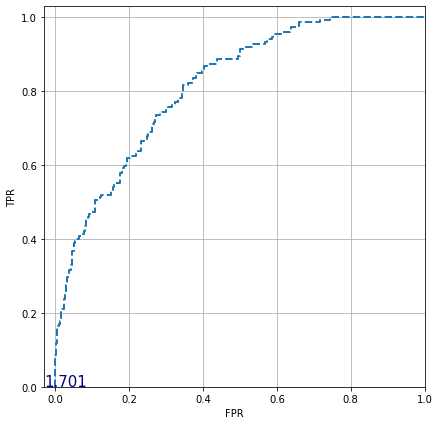

In [ ]:
mp1.rcParams['figure.figsize'] = (7,7)
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
plot_roc("valid_baseline", test_labels, Y_pred_BJP, color=colors[0], linestyle = '--')

In [ ]:
#BJP 0
test_BJP_0  = pred_cutoff(0.7, Y_pred_BJP)


              precision    recall  f1-score   support

           0       0.84      1.00      0.91       785
           1       1.00      0.01      0.01       152

    accuracy                           0.84       937
   macro avg       0.92      0.50      0.46       937
weighted avg       0.86      0.84      0.77       937



In [ ]:
BJP_0_acc = acc_array_party(test_BJP_0, [[0,1], [2,3],[4,5],[6]])
BJP_0_f1 = f1_array_party(test_BJP_0, [[0,1], [2,3],[4,5],[6]])

In [ ]:
BJP_0_df = get_dataF_party(BJP_0_acc, BJP_0_f1)

In [ ]:
BJP_0_df

,Accuracy,f1-score
BJP,0.845953,0.032787
Congress,0.785714,0.000000
AAP,0.907407,0.000000
Other,0.806548,0.000000


In [ ]:
Y_pred_BJP2 = fit_and_pred(0.2, [0,1])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:34: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
3/3 [==============================] - 12s 972ms/step - loss: 0.6843 - acc: 0.7858
Epoch 2/15
3/3 [==============================] - 3s 952ms/step - loss: 0.6501 - acc: 0.8388
Epoch 3/15
3/3 [==============================] - 3s 973ms/step - loss: 0.5956 - acc: 0.8388
Epoch 4/15
3/3 [==============================] - 3s 955ms/step - loss: 0.5152 - acc: 0.8388
Epoch 5/15
3/3 [==============================] - 3s 966ms/step - loss: 0.4211 - acc: 0.8388
Epoch 6/15
3/3 [==============================] - 3s 974ms/step - loss: 0.4262 - acc: 0.8388
Epoch 7/15
3/3 [==============================] - 3s 985ms/step - loss: 0.3826 - acc: 0.8388
Epoch 8/15
3/3 [==============================] - 3s 1s/step - loss: 0.3509 - acc: 0.8388
Epoch 9/15
3/3 [==============================] - 3s 960ms/step - loss: 0.3339 - acc: 0.8392
Epoch 10/15
3/3 [==============================] - 3s 984ms/step - loss: 0.3021 - acc: 0.8416
Epoch 11/15
3/3 [==============================] - 3s 1s/step - loss: 0

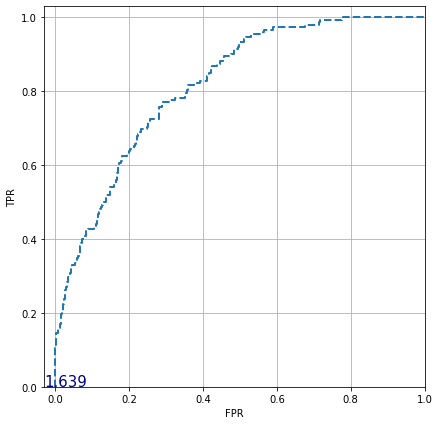

In [ ]:
mp1.rcParams['figure.figsize'] = (7,7)
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
plot_roc("valid_baseline", test_labels, Y_pred_BJP2, color=colors[0], linestyle = '--')

In [ ]:
#BJP 20
test_BJP_2  = pred_cutoff(0.7, Y_pred_BJP2)

              precision    recall  f1-score   support

           0       0.84      1.00      0.91       785
           1       0.00      0.00      0.00       152

    accuracy                           0.84       937
   macro avg       0.42      0.50      0.46       937
weighted avg       0.70      0.84      0.76       937



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
BJP_2_acc = acc_array_party(test_BJP_2, [[0,1], [2,3],[4,5],[6]])
BJP_2_f1 = f1_array_party(test_BJP_2, [[0,1], [2,3],[4,5],[6]])

In [ ]:
BJP_2_df = get_dataF_party(BJP_2_acc, BJP_2_f1)

In [ ]:
BJP_2_df

,Accuracy,f1-score
BJP,0.843342,0.0
Congress,0.785714,0.0
AAP,0.907407,0.0
Other,0.806548,0.0


In [ ]:
#BJP 40%
Y_pred_BJP4 = fit_and_pred(0.4, [0,1])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:34: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
3/3 [==============================] - 12s 1s/step - loss: 0.6887 - acc: 0.6824
Epoch 2/15
3/3 [==============================] - 4s 1s/step - loss: 0.6662 - acc: 0.8428
Epoch 3/15
3/3 [==============================] - 4s 1s/step - loss: 0.6308 - acc: 0.8428
Epoch 4/15
3/3 [==============================] - 4s 1s/step - loss: 0.5725 - acc: 0.8428
Epoch 5/15
3/3 [==============================] - 4s 1s/step - loss: 0.4766 - acc: 0.8428
Epoch 6/15
3/3 [==============================] - 4s 1s/step - loss: 0.4224 - acc: 0.8428
Epoch 7/15
3/3 [==============================] - 4s 1s/step - loss: 0.4154 - acc: 0.8428
Epoch 8/15
3/3 [==============================] - 4s 1s/step - loss: 0.3703 - acc: 0.8428
Epoch 9/15
3/3 [==============================] - 4s 1s/step - loss: 0.3558 - acc: 0.8428
Epoch 10/15
3/3 [==============================] - 4s 1s/step - loss: 0.3304 - acc: 0.8428
Epoch 11/15
3/3 [==============================] - 4s 1s/step - loss: 0.2906 - acc: 0.8432
Epoch 1

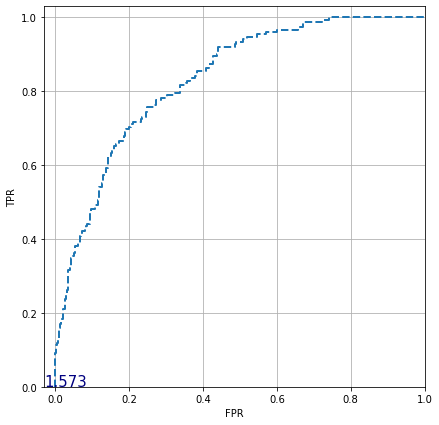

In [ ]:
mp1.rcParams['figure.figsize'] = (7,7)
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
plot_roc("valid_baseline", test_labels, Y_pred_BJP4, color=colors[0], linestyle = '--')

In [ ]:
test_BJP_4  = pred_cutoff(0.7, Y_pred_BJP4)

              precision    recall  f1-score   support

           0       0.84      1.00      0.91       785
           1       0.00      0.00      0.00       152

    accuracy                           0.84       937
   macro avg       0.42      0.50      0.46       937
weighted avg       0.70      0.84      0.76       937



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
BJP_4_acc = acc_array_party(test_BJP_4, [[0,1], [2,3],[4,5],[6]])
BJP_4_f1 = f1_array_party(test_BJP_4, [[0,1], [2,3],[4,5],[6]])

In [ ]:
BJP_4_df = get_dataF_party(BJP_4_acc, BJP_4_f1)

In [ ]:
BJP_4_df

,Accuracy,f1-score
BJP,0.843342,0.0
Congress,0.785714,0.0
AAP,0.907407,0.0
Other,0.806548,0.0


In [ ]:
#BJP 60%
Y_pred_BJP6 = fit_and_pred(0.6, [0,1])

Shape (3123, 4)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
4/4 [==============================] - 13s 941ms/step - loss: 0.6870 - acc: 0.7221
Epoch 2/15
4/4 [==============================] - 4s 880ms/step - loss: 0.6515 - acc: 0.8393
Epoch 3/15
4/4 [==============================] - 4s 877ms/step - loss: 0.5882 - acc: 0.8393
Epoch 4/15
4/4 [==============================] - 4s 842ms/step - loss: 0.4757 - acc: 0.8393
Epoch 5/15
4/4 [==============================] - 4s 1s/step - loss: 0.4385 - acc: 0.8393
Epoch 6/15
4/4 [==============================] - 4s 867ms/step - loss: 0.3947 - acc: 0.8393
Epoch 7/15
4/4 [==============================] - 4s 870ms/step - loss: 0.3746 - acc: 0.8393
Epoch 8/15
4/4 [==============================] - 4s 1s/step - loss: 0.3531 - acc: 0.8402
Epoch 9/15
4/4 [==============================] - 4s 1s/step - loss: 0.3135 - acc: 0.8409
Epoch 10/15
4/4 [==============================] - 4s 872ms/step - loss: 0.2764 - acc: 0.8476
Epoch 11/15
4/4 [==============================] - 4s 902ms/step - loss: 0.23

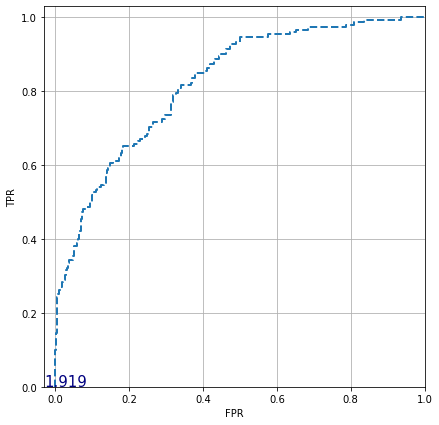

In [ ]:
mp1.rcParams['figure.figsize'] = (7,7)
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
plot_roc("valid_baseline", test_labels, Y_pred_BJP6, color=colors[0], linestyle = '--')

In [ ]:
test_BJP_6  = pred_cutoff(0.7, Y_pred_BJP6)

              precision    recall  f1-score   support

           0       0.87      0.98      0.93       785
           1       0.76      0.27      0.40       152

    accuracy                           0.87       937
   macro avg       0.82      0.63      0.66       937
weighted avg       0.86      0.87      0.84       937



In [ ]:
BJP_6_acc = acc_array_party(test_BJP_6, [[0,1], [2,3],[4,5],[6]])
BJP_6_f1 = f1_array_party(test_BJP_6, [[0,1], [2,3],[4,5],[6]])

In [ ]:
BJP_6_df = get_dataF_party(BJP_6_acc, BJP_6_f1)

In [ ]:
BJP_6_df

,Accuracy,f1-score
BJP,0.869452,0.342105
Congress,0.839286,0.400000
AAP,0.950617,0.692308
Other,0.830357,0.359551


In [ ]:
#BJP 80%
Y_pred_BJP8 = fit_and_pred(0.8, [0,1])

Shape (3429, 4)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
4/4 [==============================] - 13s 1s/step - loss: 0.6822 - acc: 0.8247
Epoch 2/15
4/4 [==============================] - 4s 1s/step - loss: 0.6393 - acc: 0.8393
Epoch 3/15
4/4 [==============================] - 4s 1s/step - loss: 0.5616 - acc: 0.8393
Epoch 4/15
4/4 [==============================] - 4s 996ms/step - loss: 0.4449 - acc: 0.8393
Epoch 5/15
4/4 [==============================] - 4s 1s/step - loss: 0.4241 - acc: 0.8393
Epoch 6/15
4/4 [==============================] - 4s 1s/step - loss: 0.3802 - acc: 0.8393
Epoch 7/15
4/4 [==============================] - 4s 1s/step - loss: 0.3596 - acc: 0.8393
Epoch 8/15
4/4 [==============================] - 4s 1s/step - loss: 0.3251 - acc: 0.8393
Epoch 9/15
4/4 [==============================] - 4s 1s/step - loss: 0.2787 - acc: 0.8399
Epoch 10/15
4/4 [==============================] - 4s 1s/step - loss: 0.2309 - acc: 0.8530
Epoch 11/15
4/4 [==============================] - 4s 1s/step - loss: 0.1804 - acc: 0.8962
Epoc

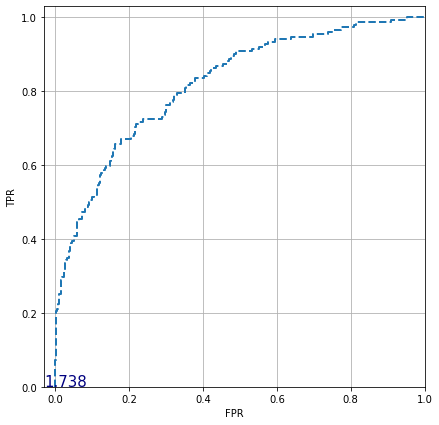

In [ ]:

mp1.rcParams['figure.figsize'] = (7,7)
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
plot_roc("valid_baseline", test_labels, Y_pred_BJP8, color=colors[0], linestyle = '--')

In [ ]:
test_BJP_8  = pred_cutoff(0.7, Y_pred_BJP8)

              precision    recall  f1-score   support

           0       0.85      1.00      0.92       785
           1       0.94      0.11      0.20       152

    accuracy                           0.85       937
   macro avg       0.90      0.56      0.56       937
weighted avg       0.87      0.85      0.80       937



In [ ]:
BJP_8_acc = acc_array_party(test_BJP_8, [[0,1], [2,3],[4,5],[6]])
BJP_8_f1 = f1_array_party(test_BJP_8, [[0,1], [2,3],[4,5],[6]])

In [ ]:
BJP_8_df = get_dataF_party(BJP_8_acc, BJP_8_f1)

In [ ]:
BJP_8_df

,Accuracy,f1-score
BJP,0.856397,0.153846
Congress,0.785714,0.000000
AAP,0.950617,0.636364
Other,0.818452,0.140845


# Congress

In [ ]:
Y_pred_cong0 = fit_and_pred(0.0, [2,3])

Shape (3515, 4)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
4/4 [==============================] - 12s 1s/step - loss: 0.6856 - acc: 0.7684
Epoch 2/15
4/4 [==============================] - 4s 1s/step - loss: 0.6513 - acc: 0.8415
Epoch 3/15
4/4 [==============================] - 4s 1s/step - loss: 0.5902 - acc: 0.8415
Epoch 4/15
4/4 [==============================] - 4s 1s/step - loss: 0.4790 - acc: 0.8415
Epoch 5/15
4/4 [==============================] - 4s 1s/step - loss: 0.4275 - acc: 0.8415
Epoch 6/15
4/4 [==============================] - 4s 1s/step - loss: 0.3949 - acc: 0.8415
Epoch 7/15
4/4 [==============================] - 4s 1s/step - loss: 0.3694 - acc: 0.8415
Epoch 8/15
4/4 [==============================] - 5s 1s/step - loss: 0.3440 - acc: 0.8415
Epoch 9/15
4/4 [==============================] - 5s 1s/step - loss: 0.2985 - acc: 0.8447
Epoch 10/15
4/4 [==============================] - 5s 1s/step - loss: 0.2555 - acc: 0.8609
Epoch 11/15
4/4 [==============================] - 5s 1s/step - loss: 0.2046 - acc: 0.8922
Epoch 1

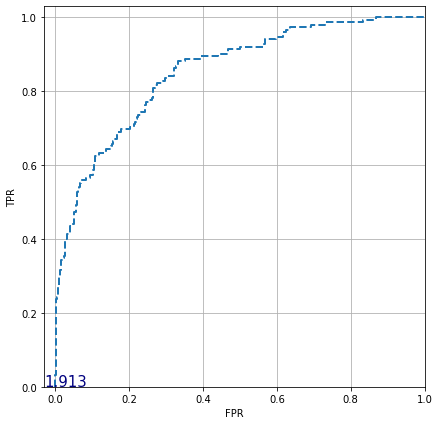

In [ ]:

mp1.rcParams['figure.figsize'] = (7,7)
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
plot_roc("valid_baseline", test_labels,Y_pred_cong0, color=colors[0], linestyle = '--')

In [ ]:
test_cong_0  = pred_cutoff(0.7, Y_pred_cong0)

              precision    recall  f1-score   support

           0       0.89      0.97      0.93       785
           1       0.73      0.36      0.48       152

    accuracy                           0.88       937
   macro avg       0.81      0.67      0.71       937
weighted avg       0.86      0.88      0.86       937



In [ ]:
cong_0_acc = acc_array_party(test_cong_0, [[0,1], [2,3],[4,5],[6]])
cong_0_f1 = f1_array_party(test_cong_0, [[0,1], [2,3],[4,5],[6]])

In [ ]:
cong_0_df = get_dataF_party(cong_0_acc, cong_0_f1)

In [ ]:
cong_0_df

,Accuracy,f1-score
BJP,0.885117,0.521739
Congress,0.785714,0.142857
AAP,0.962963,0.769231
Other,0.836310,0.421053


In [ ]:
Y_pred_cong2 = fit_and_pred(0.2, [2,3])

Shape (3559, 4)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
4/4 [==============================] - 12s 1s/step - loss: 0.6894 - acc: 0.6901
Epoch 2/15
4/4 [==============================] - 5s 1s/step - loss: 0.6683 - acc: 0.8418
Epoch 3/15
4/4 [==============================] - 5s 1s/step - loss: 0.6289 - acc: 0.8418
Epoch 4/15
4/4 [==============================] - 4s 1s/step - loss: 0.5428 - acc: 0.8418
Epoch 5/15
4/4 [==============================] - 4s 1s/step - loss: 0.4326 - acc: 0.8418
Epoch 6/15
4/4 [==============================] - 4s 1s/step - loss: 0.4340 - acc: 0.8418
Epoch 7/15
4/4 [==============================] - 4s 1s/step - loss: 0.3850 - acc: 0.8418
Epoch 8/15
4/4 [==============================] - 5s 1s/step - loss: 0.3685 - acc: 0.8418
Epoch 9/15
4/4 [==============================] - 5s 1s/step - loss: 0.3346 - acc: 0.8435
Epoch 10/15
4/4 [==============================] - 5s 1s/step - loss: 0.2905 - acc: 0.8491
Epoch 11/15
4/4 [==============================] - 5s 1s/step - loss: 0.2417 - acc: 0.8741
Epoch 1

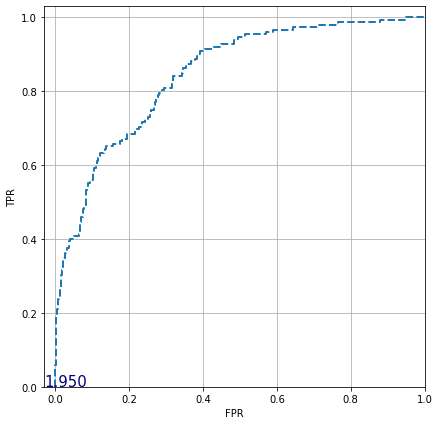

In [ ]:
mp1.rcParams['figure.figsize'] = (7,7)
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
plot_roc("valid_baseline", test_labels,Y_pred_cong2, color=colors[0], linestyle = '--')

In [ ]:
test_cong_2  = pred_cutoff(0.7, Y_pred_cong2)

              precision    recall  f1-score   support

           0       0.90      0.93      0.91       785
           1       0.56      0.45      0.50       152

    accuracy                           0.85       937
   macro avg       0.73      0.69      0.71       937
weighted avg       0.84      0.85      0.85       937



In [ ]:
cong_2_acc = acc_array_party(test_cong_2, [[0,1], [2,3],[4,5],[6]])
cong_2_f1 = f1_array_party(test_cong_2, [[0,1], [2,3],[4,5],[6]])

In [ ]:
cong_2_df = get_dataF_party(cong_2_acc, cong_2_f1)

In [ ]:
cong_2_df

,Accuracy,f1-score
BJP,0.885117,0.584906
Congress,0.785714,0.250000
AAP,0.944444,0.689655
Other,0.785714,0.409836


In [ ]:
Y_pred_cong4 = fit_and_pred(0.4, [2,3])

Shape (3603, 4)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
4/4 [==============================] - 13s 1s/step - loss: 0.6881 - acc: 0.7111
Epoch 2/15
4/4 [==============================] - 5s 1s/step - loss: 0.6625 - acc: 0.8415
Epoch 3/15
4/4 [==============================] - 5s 1s/step - loss: 0.6161 - acc: 0.8415
Epoch 4/15
4/4 [==============================] - 5s 1s/step - loss: 0.5253 - acc: 0.8415
Epoch 5/15
4/4 [==============================] - 5s 1s/step - loss: 0.4308 - acc: 0.8415
Epoch 6/15
4/4 [==============================] - 5s 1s/step - loss: 0.4142 - acc: 0.8415
Epoch 7/15
4/4 [==============================] - 5s 1s/step - loss: 0.3829 - acc: 0.8415
Epoch 8/15
4/4 [==============================] - 5s 1s/step - loss: 0.3629 - acc: 0.8415
Epoch 9/15
4/4 [==============================] - 5s 1s/step - loss: 0.3191 - acc: 0.8432
Epoch 10/15
4/4 [==============================] - 5s 1s/step - loss: 0.2819 - acc: 0.8485
Epoch 11/15
4/4 [==============================] - 5s 1s/step - loss: 0.2306 - acc: 0.8748
Epoch 1

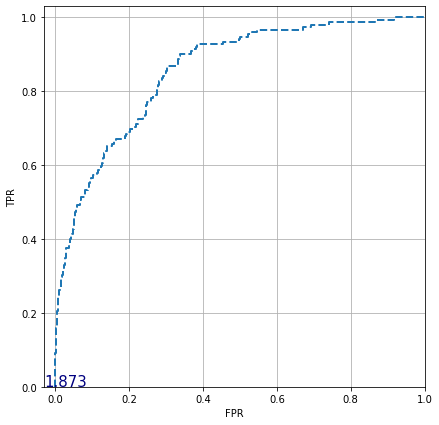

In [ ]:
mp1.rcParams['figure.figsize'] = (7,7)
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
plot_roc("valid_baseline", test_labels,Y_pred_cong4, color=colors[0], linestyle = '--')

In [ ]:
test_cong_4  = pred_cutoff(0.7, Y_pred_cong4)

              precision    recall  f1-score   support

           0       0.89      0.97      0.93       785
           1       0.70      0.38      0.49       152

    accuracy                           0.87       937
   macro avg       0.80      0.67      0.71       937
weighted avg       0.86      0.87      0.86       937



In [ ]:
cong_4_acc = acc_array_party(test_cong_4, [[0,1], [2,3],[4,5],[6]])
cong_4_f1 = f1_array_party(test_cong_4, [[0,1], [2,3],[4,5],[6]])

In [ ]:
cong_4_df = get_dataF_party(cong_4_acc, cong_4_f1)

In [ ]:
cong_4_df

,Accuracy,f1-score
BJP,0.892950,0.559140
Congress,0.785714,0.142857
AAP,0.962963,0.769231
Other,0.821429,0.400000


In [ ]:
Y_pred_cong6 = fit_and_pred(0.6, [2,3])

Shape (3646, 4)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
4/4 [==============================] - 14s 1s/step - loss: 0.6893 - acc: 0.6997
Epoch 2/15
4/4 [==============================] - 5s 1s/step - loss: 0.6691 - acc: 0.8415
Epoch 3/15
4/4 [==============================] - 5s 1s/step - loss: 0.6323 - acc: 0.8415
Epoch 4/15
4/4 [==============================] - 5s 1s/step - loss: 0.5571 - acc: 0.8415
Epoch 5/15
4/4 [==============================] - 5s 1s/step - loss: 0.4393 - acc: 0.8415
Epoch 6/15
4/4 [==============================] - 5s 1s/step - loss: 0.4418 - acc: 0.8415
Epoch 7/15
4/4 [==============================] - 5s 1s/step - loss: 0.3876 - acc: 0.8415
Epoch 8/15
4/4 [==============================] - 5s 1s/step - loss: 0.3733 - acc: 0.8417
Epoch 9/15
4/4 [==============================] - 5s 1s/step - loss: 0.3398 - acc: 0.8426
Epoch 10/15
4/4 [==============================] - 5s 1s/step - loss: 0.2972 - acc: 0.8467
Epoch 11/15
4/4 [==============================] - 5s 1s/step - loss: 0.2501 - acc: 0.8700
Epoch 1

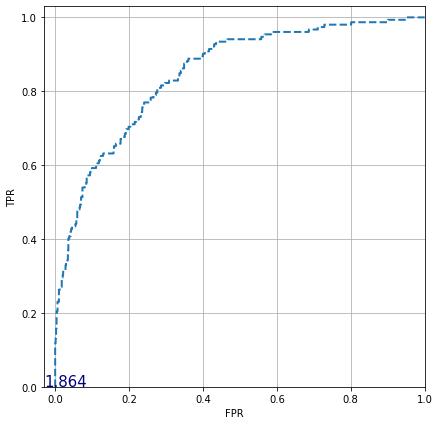

In [ ]:
mp1.rcParams['figure.figsize'] = (7,7)
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
plot_roc("valid_baseline", test_labels,Y_pred_cong6, color=colors[0], linestyle = '--')

In [ ]:
test_cong_6  = pred_cutoff(0.7, Y_pred_cong6)

              precision    recall  f1-score   support

           0       0.88      0.97      0.92       785
           1       0.66      0.35      0.46       152

    accuracy                           0.87       937
   macro avg       0.77      0.66      0.69       937
weighted avg       0.85      0.87      0.85       937



In [ ]:
cong_6_acc = acc_array_party(test_cong_6, [[0,1], [2,3],[4,5],[6]])
cong_6_f1 = f1_array_party(test_cong_6, [[0,1], [2,3],[4,5],[6]])

In [ ]:
cong_6_df = get_dataF_party(cong_6_acc, cong_6_f1)

In [ ]:
cong_6_df

,Accuracy,f1-score
BJP,0.882507,0.516129
Congress,0.785714,0.142857
AAP,0.950617,0.714286
Other,0.818452,0.371134


In [ ]:
Y_pred_cong8 = fit_and_pred(0.8, [2,3])

Shape (3690, 4)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
4/4 [==============================] - 14s 1s/step - loss: 0.6846 - acc: 0.7799
Epoch 2/15
4/4 [==============================] - 5s 1s/step - loss: 0.6468 - acc: 0.8401
Epoch 3/15
4/4 [==============================] - 5s 1s/step - loss: 0.5721 - acc: 0.8401
Epoch 4/15
4/4 [==============================] - 5s 1s/step - loss: 0.4540 - acc: 0.8401
Epoch 5/15
4/4 [==============================] - 5s 1s/step - loss: 0.4416 - acc: 0.8401
Epoch 6/15
4/4 [==============================] - 5s 1s/step - loss: 0.3945 - acc: 0.8401
Epoch 7/15
4/4 [==============================] - 5s 1s/step - loss: 0.3774 - acc: 0.8401
Epoch 8/15
4/4 [==============================] - 5s 1s/step - loss: 0.3389 - acc: 0.8404
Epoch 9/15
4/4 [==============================] - 5s 1s/step - loss: 0.2984 - acc: 0.8423
Epoch 10/15
4/4 [==============================] - 5s 1s/step - loss: 0.2538 - acc: 0.8593
Epoch 11/15
4/4 [==============================] - 5s 1s/step - loss: 0.2015 - acc: 0.8978
Epoch 1

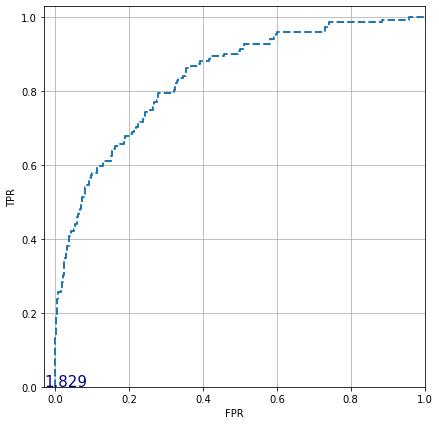

In [ ]:
mp1.rcParams['figure.figsize'] = (7,7)
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
plot_roc("valid_baseline", test_labels,Y_pred_cong8, color=colors[0], linestyle = '--')

In [ ]:
test_cong_8  = pred_cutoff(0.7, Y_pred_cong8)

              precision    recall  f1-score   support

           0       0.87      0.99      0.93       785
           1       0.78      0.26      0.39       152

    accuracy                           0.87       937
   macro avg       0.83      0.62      0.66       937
weighted avg       0.86      0.87      0.84       937



In [ ]:
cong_8_acc = acc_array_party(test_cong_8, [[0,1], [2,3],[4,5],[6]])
cong_8_f1 = f1_array_party(test_cong_8, [[0,1], [2,3],[4,5],[6]])

In [ ]:
cong_8_df = get_dataF_party(cong_8_acc, cong_8_f1)

In [ ]:
cong_8_df

,Accuracy,f1-score
BJP,0.885117,0.463415
Congress,0.785714,0.000000
AAP,0.962963,0.750000
Other,0.815476,0.261905


In [ ]:
list(cong_8_df['Accuracy'])

[0.8851174934725848,
 0.7857142857142857,
 0.9629629629629629,
 0.8154761904761905]

# AAP (party wise)

In [ ]:
def plot_analysis_usa_party_acc(dfs):
  acc_dfs = []
  f1_dfs = []


  BJP_acc = []
  Cong_acc = []
  # AAP_acc = []
  other_acc = []

  BJP_f1 = []
  Cong_f1 = []
  # AAP_f1 = []
  other_f1 = []

  for df in dfs:
    acc_dfs.append(list(df['Accuracy']))
    f1_dfs.append(list(df['f1-score']))

  
  for acc_list in acc_dfs:
    BJP_acc.append(acc_list[0])

  for acc_list in acc_dfs:
    Cong_acc.append(acc_list[1])

  # for acc_list in acc_dfs:
  #   AAP_acc.append(acc_list[2])

  for acc_list in acc_dfs:
    other_acc.append(acc_list[2])

  

  for f1_list in f1_dfs:
    BJP_f1.append(f1_list[0])

  for f1_list in f1_dfs:
    Cong_f1.append(f1_list[1])

  # for f1_list in f1_dfs:
  #   AAP_f1.append(f1_list[2])

  for f1_list in f1_dfs:
    other_f1.append(f1_list[2])

  x = [0.0, 0.2, 0.4, 0.6, 0.8]

  plt.title("Accuracy")
  plt.plot(x, BJP_acc, label = "Republican")
  plt.xlabel("% training data")
  plt.ylabel("Accuracy")
  plt.plot(x, Cong_acc, label = "Democrat")

  plt.plot(x, other_acc, label = "Other")
  plt.legend()
  plt.show()


In [ ]:
def plot_analysis_usa_party_f1(dfs):

  acc_dfs = []
  f1_dfs = []


  BJP_acc = []
  Cong_acc = []
  # AAP_acc = []
  other_acc = []

  BJP_f1 = []
  Cong_f1 = []
  # AAP_f1 = []
  other_f1 = []

  for df in dfs:
    acc_dfs.append(list(df['Accuracy']))
    f1_dfs.append(list(df['f1-score']))

  
  for acc_list in acc_dfs:
    BJP_acc.append(acc_list[0])

  for acc_list in acc_dfs:
    Cong_acc.append(acc_list[1])

  # for acc_list in acc_dfs:
  #   AAP_acc.append(acc_list[2])

  for acc_list in acc_dfs:
    other_acc.append(acc_list[2])

  

  for f1_list in f1_dfs:
    BJP_f1.append(f1_list[0])

  for f1_list in f1_dfs:
    Cong_f1.append(f1_list[1])

  # for f1_list in f1_dfs:
  #   AAP_f1.append(f1_list[2])

  for f1_list in f1_dfs:
    other_f1.append(f1_list[2])

  x = [0.0, 0.2, 0.4, 0.6, 0.8]

  plt.title("f1-score")
  plt.plot(x, BJP_f1, label = "Republican")
  plt.xlabel("% training data")
  plt.ylabel("Accuracy")
  plt.plot(x, Cong_f1, label = "Democrat")

  plt.plot(x, other_f1, label = "Other")
  plt.legend()
  plt.show()


In [ ]:
def plot_analysis_usa_stance_acc(dfs):
  acc_dfs = []
  f1_dfs = []


  anti_BJP_acc = []
  pro_BJP_acc = []
  anti_Cong_acc = []
  pro_Cong_acc = []
  anti_AAP_acc = []
  pro_AAP_acc = []
  other_acc = []

  anti_BJP_f1 = []
  pro_BJP_f1 = []
  anti_Cong_f1 = []
  pro_Cong_f1 = []
  anti_AAP_f1 = []
  pro_AAP_f1 = []
  other_f1 = []



  for df in dfs:
    acc_dfs.append(list(df['Accuracy']))
    f1_dfs.append(list(df['f1-score']))

  
  for acc_list in acc_dfs:
    anti_BJP_acc.append(acc_list[0])

  for acc_list in acc_dfs:
    pro_BJP_acc.append(acc_list[1])

  for acc_list in acc_dfs:
    anti_Cong_acc.append(acc_list[2])

  for acc_list in acc_dfs:
    pro_Cong_acc.append(acc_list[3])

  for acc_list in acc_dfs:
    anti_AAP_acc.append(acc_list[4])

  # for acc_list in acc_dfs:
  #   pro_AAP_acc.append(acc_list[5])

  # for acc_list in acc_dfs:
  #   other_acc.append(acc_list[6])




  for f1_list in f1_dfs:
    anti_BJP_f1.append(f1_list[0])

  for acc_list in acc_dfs:
    pro_BJP_f1.append(f1_list[1])

  for acc_list in acc_dfs:
    anti_Cong_f1.append(f1_list[2])

  for acc_list in acc_dfs:
    pro_Cong_f1.append(f1_list[3])

  for acc_list in acc_dfs:
    anti_AAP_f1.append(f1_list[4])

  # for acc_list in acc_dfs:
  #   pro_AAP_f1.append(f1_list[5])

  # for acc_list in acc_dfs:
  #   other_f1.append(f1_list[6])

  
  x = [0.0, 0.2, 0.4, 0.6, 0.8]
  plt.title("Accuracy")
  plt.plot(x, anti_BJP_acc, label = "Anti-Republican")
  plt.xlabel("% training data")
  plt.ylabel("Accuracy")
  plt.plot(x, pro_BJP_acc, label = "Pro-Republican")
  plt.plot(x, anti_Cong_acc, label = "Anti-Democrat")
  plt.plot(x, pro_Cong_acc, label = "Pro-Democrat")
  plt.plot(x, anti_AAP_acc, label = "Other")
  # plt.plot(x, pro_AAP_acc, label = "Pro-AAP")
  # plt.plot(x, other_acc, label = "Other")
  plt.legend()
  plt.show()


In [ ]:
def plot_analysis_usa_stance_f1(dfs):
  acc_dfs = []
  f1_dfs = []


  anti_BJP_acc = []
  pro_BJP_acc = []
  anti_Cong_acc = []
  pro_Cong_acc = []
  anti_AAP_acc = []
  pro_AAP_acc = []
  other_acc = []

  anti_BJP_f1 = []
  pro_BJP_f1 = []
  anti_Cong_f1 = []
  pro_Cong_f1 = []
  anti_AAP_f1 = []
  pro_AAP_f1 = []
  other_f1 = []



  for df in dfs:
    acc_dfs.append(list(df['Accuracy']))
    f1_dfs.append(list(df['f1-score']))

  
  for acc_list in acc_dfs:
    anti_BJP_acc.append(acc_list[0])

  for acc_list in acc_dfs:
    pro_BJP_acc.append(acc_list[1])

  for acc_list in acc_dfs:
    anti_Cong_acc.append(acc_list[2])

  for acc_list in acc_dfs:
    pro_Cong_acc.append(acc_list[3])

  for acc_list in acc_dfs:
    anti_AAP_acc.append(acc_list[4])

  # for acc_list in acc_dfs:
  #   pro_AAP_acc.append(acc_list[5])

  # for acc_list in acc_dfs:
  #   other_acc.append(acc_list[6])




  for f1_list in f1_dfs:
    anti_BJP_f1.append(f1_list[0])

  for acc_list in acc_dfs:
    pro_BJP_f1.append(f1_list[1])

  for acc_list in acc_dfs:
    anti_Cong_f1.append(f1_list[2])

  for acc_list in acc_dfs:
    pro_Cong_f1.append(f1_list[3])

  for acc_list in acc_dfs:
    anti_AAP_f1.append(f1_list[4])

  # for acc_list in acc_dfs:
  #   pro_AAP_f1.append(f1_list[5])

  # for acc_list in acc_dfs:
  #   other_f1.append(f1_list[6])

  
  x = [0.0, 0.2, 0.4, 0.6, 0.8]
  plt.title("f1-score")
  plt.plot(x, anti_BJP_f1, label = "Anti-Republican")
  plt.xlabel("% training data")
  plt.ylabel("Accuracy")
  plt.plot(x, pro_BJP_f1, label = "Pro-Republican")
  plt.plot(x, anti_Cong_f1, label = "Anti-Democrat")
  plt.plot(x, pro_Cong_f1, label = "Pro-Democrat")
  plt.plot(x, anti_AAP_f1, label = "Other")
  # plt.plot(x, pro_AAP_acc, label = "Pro-AAP")
  # plt.plot(x, other_acc, label = "Other")
  plt.legend()
  plt.show()


In [ ]:
def analysis_dfs_party(pol_stance_array):
  dfs = []
  fractions = [0.0, 0.2, 0.4, 0.6, 0.8]

  
  for frac in fractions:
    avg_acc = []
    avg_f1 = []
    for k in range(0,5):
      Y_pred = fit_and_pred(frac, pol_stance_array,k)
      test  = pred_cutoff(0.7, Y_pred)
      t_acc = acc_array_party(test, [[0,1], [2,3],[4]])
      t_f1 = f1_array_party(test, [[0,1], [2,3],[4]])
      avg_acc.append(t_acc)
      avg_f1.append(t_f1)
      # print("k loop",avg_acc)
      # print(avg_f1)
    acc2 = avg_arr(avg_acc)
    # print("outside k loop",acc2)
    af12 = avg_arr(avg_f1)
    c_df = get_dataF_party(acc2, af12)
    dfs.append(c_df)
  return dfs  



In [ ]:
def avg_arr(acc_arr):
  avgArr = []
  for i in range(len(acc_arr[0])):
    sum = 0
    for j in acc_arr:
      sum+=j[i]
    avgArr.append(sum/len(acc_arr)) 
  return avgArr   

In [ ]:
def analysis_dfs_stance(pol_stance_array):
  dfs = []
  fractions = [0.0, 0.2, 0.4, 0.6, 0.8]

  for frac in fractions:
    avg_acc = []
    avg_f1 = []
    for k in range(0,5):
      Y_pred = fit_and_pred(frac, pol_stance_array,k)
      test  = pred_cutoff(0.7, Y_pred)
      t_acc = acc_array(test)
      t_f1 = f1_array(test)
      avg_acc.append(t_acc)
      avg_f1.append(t_f1)
    acc2 = avg_arr(avg_acc)
    af12 = avg_arr(avg_f1)  
    c_df = get_dataF(t_acc, t_f1)
    dfs.append(c_df)
    
  return dfs 


In [ ]:
hiiiimmafedmnmcsmmccdm

In [ ]:
republican_dfs = analysis_dfs_party([0,1])

Shape (1055, 4)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
2/2 [==============================] - 11s 138ms/step - loss: 0.6931 - acc: 0.5071
Epoch 2/15
2/2 [==============================] - 2s 148ms/step - loss: 0.6910 - acc: 0.6787
Epoch 3/15
2/2 [==============================] - 2s 156ms/step - loss: 0.6886 - acc: 0.7706
Epoch 4/15
2/2 [==============================] - 2s 151ms/step - loss: 0.6858 - acc: 0.8152
Epoch 5/15
2/2 [==============================] - 1s 145ms/step - loss: 0.6821 - acc: 0.8379
Epoch 6/15
2/2 [==============================] - 2s 151ms/step - loss: 0.6772 - acc: 0.8227
Epoch 7/15
2/2 [==============================] - 2s 166ms/step - loss: 0.6696 - acc: 0.9071
Epoch 8/15
2/2 [==============================] - 2s 163ms/step - loss: 0.6593 - acc: 0.8749
Epoch 9/15
2/2 [==============================] - 2s 140ms/step - loss: 0.6459 - acc: 0.8028
Epoch 10/15
2/2 [==============================] - 1s 140ms/step - loss: 0.6242 - acc: 0.8493
Epoch 11/15
2/2 [==============================] - 2s 147ms/step - l

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
2/2 [==============================] - 12s 154ms/step - loss: 0.6933 - acc: 0.4844
Epoch 2/15
2/2 [==============================] - 1s 141ms/step - loss: 0.6920 - acc: 0.6626
Epoch 3/15
2/2 [==============================] - 2s 163ms/step - loss: 0.6906 - acc: 0.6739
Epoch 4/15
2/2 [==============================] - 2s 166ms/step - loss: 0.6889 - acc: 0.7621
Epoch 5/15
2/2 [==============================] - 2s 181ms/step - loss: 0.6869 - acc: 0.6948
Epoch 6/15
2/2 [==============================] - 2s 172ms/step - loss: 0.6838 - acc: 0.6616
Epoch 7/15
2/2 [==============================] - 2s 134ms/step - loss: 0.6792 - acc: 0.7583
Epoch 8/15
2/2 [==============================] - 2s 170ms/step - loss: 0.6732 - acc: 0.8673
Epoch 9/15
2/2 [==============================] - 2s 139ms/step - loss: 0.6649 - acc: 0.9081
Epoch 10/15
2/2 [==============================] - 2s 153ms/step - loss: 0.6530 - acc: 0.9194
Epoch 11/15
2/2 [==============================] - 2s 137ms/step - l

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
2/2 [==============================] - 11s 143ms/step - loss: 0.6931 - acc: 0.5109
Epoch 2/15
2/2 [==============================] - 2s 154ms/step - loss: 0.6919 - acc: 0.6711
Epoch 3/15
2/2 [==============================] - 1s 148ms/step - loss: 0.6907 - acc: 0.7498
Epoch 4/15
2/2 [==============================] - 2s 167ms/step - loss: 0.6890 - acc: 0.6635
Epoch 5/15
2/2 [==============================] - 1s 148ms/step - loss: 0.6866 - acc: 0.6720
Epoch 6/15
2/2 [==============================] - 2s 146ms/step - loss: 0.6833 - acc: 0.8408
Epoch 7/15
2/2 [==============================] - 2s 170ms/step - loss: 0.6790 - acc: 0.9014
Epoch 8/15
2/2 [==============================] - 2s 141ms/step - loss: 0.6739 - acc: 0.7687
Epoch 9/15
2/2 [==============================] - 2s 139ms/step - loss: 0.6668 - acc: 0.7555
Epoch 10/15
2/2 [==============================] - 2s 142ms/step - loss: 0.6558 - acc: 0.8303
Epoch 11/15
2/2 [==============================] - 1s 149ms/step - l

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
2/2 [==============================] - 12s 136ms/step - loss: 0.6932 - acc: 0.5024
Epoch 2/15
2/2 [==============================] - 1s 150ms/step - loss: 0.6917 - acc: 0.5128
Epoch 3/15
2/2 [==============================] - 2s 147ms/step - loss: 0.6903 - acc: 0.5308
Epoch 4/15
2/2 [==============================] - 2s 159ms/step - loss: 0.6891 - acc: 0.7128
Epoch 5/15
2/2 [==============================] - 2s 146ms/step - loss: 0.6870 - acc: 0.8199
Epoch 6/15
2/2 [==============================] - 1s 135ms/step - loss: 0.6839 - acc: 0.7668
Epoch 7/15
2/2 [==============================] - 2s 135ms/step - loss: 0.6802 - acc: 0.7479
Epoch 8/15
2/2 [==============================] - 1s 138ms/step - loss: 0.6750 - acc: 0.7431
Epoch 9/15
2/2 [==============================] - 1s 147ms/step - loss: 0.6676 - acc: 0.7062
Epoch 10/15
2/2 [==============================] - 2s 149ms/step - loss: 0.6577 - acc: 0.6502
Epoch 11/15
2/2 [==============================] - 1s 154ms/step - l

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.55      1.00      0.71       439
           1       0.00      0.00      0.00       363

    accuracy                           0.55       802
   macro avg       0.27      0.50      0.35       802
weighted avg       0.30      0.55      0.39       802

Conf matrix [[439   0]
 [363   0]]
Shape (1055, 4)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
2/2 [==============================] - 12s 145ms/step - loss: 0.6933 - acc: 0.4749
Epoch 2/15
2/2 [==============================] - 2s 137ms/step - loss: 0.6923 - acc: 0.6190
Epoch 3/15
2/2 [==============================] - 2s 161ms/step - loss: 0.6910 - acc: 0.6607
Epoch 4/15
2/2 [==============================] - 2s 141ms/step - loss: 0.6892 - acc: 0.7204
Epoch 5/15
2/2 [==============================] - 2s 153ms/step - loss: 0.6870 - acc: 0.8047
Epoch 6/15
2/2 [==============================] - 1s 145ms/step - loss: 0.6838 - acc: 0.8502
Epoch 7/15
2/2 [==============================] - 1s 151ms/step - loss: 0.6795 - acc: 0.8957
Epoch 8/15
2/2 [==============================] - 2s 141ms/step - loss: 0.6733 - acc: 0.9223
Epoch 9/15
2/2 [==============================] - 2s 150ms/step - loss: 0.6647 - acc: 0.8976
Epoch 10/15
2/2 [==============================] - 2s 160ms/step - loss: 0.6524 - acc: 0.8863
Epoch 11/15
2/2 [==============================] - 2s 142ms/step - l

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
2/2 [==============================] - 12s 748ms/step - loss: 0.6928 - acc: 0.5360
Epoch 2/15
2/2 [==============================] - 2s 700ms/step - loss: 0.6903 - acc: 0.5394
Epoch 3/15
2/2 [==============================] - 2s 770ms/step - loss: 0.6869 - acc: 0.5394
Epoch 4/15
2/2 [==============================] - 2s 736ms/step - loss: 0.6825 - acc: 0.5394
Epoch 5/15
2/2 [==============================] - 2s 713ms/step - loss: 0.6761 - acc: 0.5394
Epoch 6/15
2/2 [==============================] - 2s 716ms/step - loss: 0.6671 - acc: 0.5414
Epoch 7/15
2/2 [==============================] - 2s 771ms/step - loss: 0.6533 - acc: 0.5576
Epoch 8/15
2/2 [==============================] - 2s 757ms/step - loss: 0.6320 - acc: 0.6222
Epoch 9/15
2/2 [==============================] - 2s 931ms/step - loss: 0.6001 - acc: 0.7603
Epoch 10/15
2/2 [==============================] - 2s 731ms/step - loss: 0.5534 - acc: 0.8613
Epoch 11/15
2/2 [==============================] - 2s 771ms/step - l

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
2/2 [==============================] - 11s 710ms/step - loss: 0.6929 - acc: 0.5320
Epoch 2/15
2/2 [==============================] - 2s 755ms/step - loss: 0.6902 - acc: 0.5333
Epoch 3/15
2/2 [==============================] - 2s 732ms/step - loss: 0.6868 - acc: 0.5333
Epoch 4/15
2/2 [==============================] - 2s 717ms/step - loss: 0.6825 - acc: 0.5333
Epoch 5/15
2/2 [==============================] - 2s 797ms/step - loss: 0.6763 - acc: 0.5333
Epoch 6/15
2/2 [==============================] - 2s 744ms/step - loss: 0.6675 - acc: 0.5333
Epoch 7/15
2/2 [==============================] - 2s 733ms/step - loss: 0.6547 - acc: 0.5475
Epoch 8/15
2/2 [==============================] - 2s 765ms/step - loss: 0.6353 - acc: 0.5899
Epoch 9/15
2/2 [==============================] - 2s 808ms/step - loss: 0.6061 - acc: 0.6909
Epoch 10/15
2/2 [==============================] - 2s 780ms/step - loss: 0.5645 - acc: 0.8141
Epoch 11/15
2/2 [==============================] - 2s 771ms/step - l

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
2/2 [==============================] - 13s 879ms/step - loss: 0.6933 - acc: 0.4855
Epoch 2/15
2/2 [==============================] - 2s 798ms/step - loss: 0.6916 - acc: 0.5347
Epoch 3/15
2/2 [==============================] - 2s 835ms/step - loss: 0.6892 - acc: 0.5468
Epoch 4/15
2/2 [==============================] - 2s 844ms/step - loss: 0.6853 - acc: 0.6034
Epoch 5/15
2/2 [==============================] - 2s 723ms/step - loss: 0.6795 - acc: 0.6660
Epoch 6/15
2/2 [==============================] - 2s 742ms/step - loss: 0.6709 - acc: 0.7535
Epoch 7/15
2/2 [==============================] - 2s 718ms/step - loss: 0.6578 - acc: 0.8162
Epoch 8/15
2/2 [==============================] - 2s 796ms/step - loss: 0.6381 - acc: 0.8734
Epoch 9/15
2/2 [==============================] - 2s 749ms/step - loss: 0.6092 - acc: 0.9064
Epoch 10/15
2/2 [==============================] - 2s 738ms/step - loss: 0.5670 - acc: 0.9253
Epoch 11/15
2/2 [==============================] - 2s 740ms/step - l

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
2/2 [==============================] - 12s 725ms/step - loss: 0.6927 - acc: 0.5077
Epoch 2/15
2/2 [==============================] - 2s 756ms/step - loss: 0.6906 - acc: 0.5306
Epoch 3/15
2/2 [==============================] - 2s 752ms/step - loss: 0.6876 - acc: 0.5286
Epoch 4/15
2/2 [==============================] - 2s 741ms/step - loss: 0.6840 - acc: 0.5354
Epoch 5/15
2/2 [==============================] - 2s 744ms/step - loss: 0.6791 - acc: 0.5441
Epoch 6/15
2/2 [==============================] - 2s 757ms/step - loss: 0.6722 - acc: 0.5596
Epoch 7/15
2/2 [==============================] - 2s 845ms/step - loss: 0.6626 - acc: 0.5785
Epoch 8/15
2/2 [==============================] - 2s 732ms/step - loss: 0.6490 - acc: 0.6162
Epoch 9/15
2/2 [==============================] - 2s 821ms/step - loss: 0.6294 - acc: 0.6882
Epoch 10/15
2/2 [==============================] - 2s 785ms/step - loss: 0.5996 - acc: 0.7677
Epoch 11/15
2/2 [==============================] - 2s 780ms/step - l

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
2/2 [==============================] - 13s 783ms/step - loss: 0.6926 - acc: 0.5320
Epoch 2/15
2/2 [==============================] - 3s 782ms/step - loss: 0.6898 - acc: 0.5300
Epoch 3/15
2/2 [==============================] - 2s 865ms/step - loss: 0.6860 - acc: 0.5300
Epoch 4/15
2/2 [==============================] - 2s 801ms/step - loss: 0.6812 - acc: 0.5300
Epoch 5/15
2/2 [==============================] - 2s 851ms/step - loss: 0.6739 - acc: 0.5300
Epoch 6/15
2/2 [==============================] - 3s 863ms/step - loss: 0.6639 - acc: 0.5333
Epoch 7/15
2/2 [==============================] - 3s 875ms/step - loss: 0.6498 - acc: 0.5569
Epoch 8/15
2/2 [==============================] - 2s 820ms/step - loss: 0.6287 - acc: 0.6047
Epoch 9/15
2/2 [==============================] - 2s 890ms/step - loss: 0.5985 - acc: 0.6727
Epoch 10/15
2/2 [==============================] - 2s 764ms/step - loss: 0.5548 - acc: 0.7468
Epoch 11/15
2/2 [==============================] - 2s 825ms/step - l

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
2/2 [==============================] - 15s 1s/step - loss: 0.6930 - acc: 0.5050
Epoch 2/15
2/2 [==============================] - 3s 1s/step - loss: 0.6905 - acc: 0.5394
Epoch 3/15
2/2 [==============================] - 3s 1s/step - loss: 0.6873 - acc: 0.5389
Epoch 4/15
2/2 [==============================] - 3s 1s/step - loss: 0.6832 - acc: 0.5389
Epoch 5/15
2/2 [==============================] - 3s 1s/step - loss: 0.6775 - acc: 0.5389
Epoch 6/15
2/2 [==============================] - 3s 1s/step - loss: 0.6698 - acc: 0.5405
Epoch 7/15
2/2 [==============================] - 3s 1s/step - loss: 0.6583 - acc: 0.5765
Epoch 8/15
2/2 [==============================] - 3s 1s/step - loss: 0.6415 - acc: 0.6736
Epoch 9/15
2/2 [==============================] - 3s 1s/step - loss: 0.6176 - acc: 0.7828
Epoch 10/15
2/2 [==============================] - 3s 1s/step - loss: 0.5836 - acc: 0.8700
Epoch 11/15
2/2 [==============================] - 3s 1s/step - loss: 0.5359 - acc: 0.9065
Epoch 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
2/2 [==============================] - 12s 1s/step - loss: 0.6932 - acc: 0.5023
Epoch 2/15
2/2 [==============================] - 3s 1s/step - loss: 0.6909 - acc: 0.5546
Epoch 3/15
2/2 [==============================] - 3s 1s/step - loss: 0.6883 - acc: 0.5504
Epoch 4/15
2/2 [==============================] - 3s 1s/step - loss: 0.6847 - acc: 0.5535
Epoch 5/15
2/2 [==============================] - 3s 1s/step - loss: 0.6798 - acc: 0.5650
Epoch 6/15
2/2 [==============================] - 3s 1s/step - loss: 0.6729 - acc: 0.5802
Epoch 7/15
2/2 [==============================] - 3s 1s/step - loss: 0.6630 - acc: 0.5922
Epoch 8/15
2/2 [==============================] - 3s 2s/step - loss: 0.6487 - acc: 0.6230
Epoch 9/15
2/2 [==============================] - 3s 1s/step - loss: 0.6279 - acc: 0.6768
Epoch 10/15
2/2 [==============================] - 3s 1s/step - loss: 0.5952 - acc: 0.7603
Epoch 11/15
2/2 [==============================] - 4s 2s/step - loss: 0.5454 - acc: 0.8559
Epoch 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
2/2 [==============================] - 15s 1s/step - loss: 0.6932 - acc: 0.5003
Epoch 2/15
2/2 [==============================] - 3s 1s/step - loss: 0.6913 - acc: 0.5305
Epoch 3/15
2/2 [==============================] - 3s 1s/step - loss: 0.6889 - acc: 0.5300
Epoch 4/15
2/2 [==============================] - 3s 1s/step - loss: 0.6856 - acc: 0.5295
Epoch 5/15
2/2 [==============================] - 3s 1s/step - loss: 0.6811 - acc: 0.5295
Epoch 6/15
2/2 [==============================] - 3s 1s/step - loss: 0.6743 - acc: 0.5300
Epoch 7/15
2/2 [==============================] - 3s 1s/step - loss: 0.6642 - acc: 0.5525
Epoch 8/15
2/2 [==============================] - 3s 1s/step - loss: 0.6485 - acc: 0.5995
Epoch 9/15
2/2 [==============================] - 3s 1s/step - loss: 0.6242 - acc: 0.7180
Epoch 10/15
2/2 [==============================] - 3s 1s/step - loss: 0.5882 - acc: 0.8324
Epoch 11/15
2/2 [==============================] - 3s 1s/step - loss: 0.5353 - acc: 0.8679
Epoch 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
2/2 [==============================] - 14s 1s/step - loss: 0.6929 - acc: 0.5295
Epoch 2/15
2/2 [==============================] - 3s 1s/step - loss: 0.6911 - acc: 0.5332
Epoch 3/15
2/2 [==============================] - 3s 1s/step - loss: 0.6890 - acc: 0.5321
Epoch 4/15
2/2 [==============================] - 3s 1s/step - loss: 0.6861 - acc: 0.5321
Epoch 5/15
2/2 [==============================] - 3s 1s/step - loss: 0.6821 - acc: 0.5321
Epoch 6/15
2/2 [==============================] - 3s 1s/step - loss: 0.6764 - acc: 0.5326
Epoch 7/15
2/2 [==============================] - 3s 1s/step - loss: 0.6679 - acc: 0.5431
Epoch 8/15
2/2 [==============================] - 3s 1s/step - loss: 0.6555 - acc: 0.5817
Epoch 9/15
2/2 [==============================] - 3s 1s/step - loss: 0.6366 - acc: 0.6564
Epoch 10/15
2/2 [==============================] - 3s 1s/step - loss: 0.6090 - acc: 0.7368
Epoch 11/15
2/2 [==============================] - 3s 1s/step - loss: 0.5685 - acc: 0.7838
Epoch 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
2/2 [==============================] - 13s 1s/step - loss: 0.6926 - acc: 0.5311
Epoch 2/15
2/2 [==============================] - 3s 1s/step - loss: 0.6899 - acc: 0.5452
Epoch 3/15
2/2 [==============================] - 3s 1s/step - loss: 0.6864 - acc: 0.5446
Epoch 4/15
2/2 [==============================] - 3s 1s/step - loss: 0.6817 - acc: 0.5446
Epoch 5/15
2/2 [==============================] - 3s 1s/step - loss: 0.6753 - acc: 0.5446
Epoch 6/15
2/2 [==============================] - 3s 1s/step - loss: 0.6671 - acc: 0.5446
Epoch 7/15
2/2 [==============================] - 3s 1s/step - loss: 0.6541 - acc: 0.5446
Epoch 8/15
2/2 [==============================] - 3s 1s/step - loss: 0.6334 - acc: 0.5640
Epoch 9/15
2/2 [==============================] - 3s 1s/step - loss: 0.6016 - acc: 0.6392
Epoch 10/15
2/2 [==============================] - 3s 1s/step - loss: 0.5560 - acc: 0.7666
Epoch 11/15
2/2 [==============================] - 3s 1s/step - loss: 0.4933 - acc: 0.8115
Epoch 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
3/3 [==============================] - 15s 950ms/step - loss: 0.6923 - acc: 0.5358
Epoch 2/15
3/3 [==============================] - 4s 1s/step - loss: 0.6880 - acc: 0.5422
Epoch 3/15
3/3 [==============================] - 4s 1s/step - loss: 0.6822 - acc: 0.5422
Epoch 4/15
3/3 [==============================] - 4s 1s/step - loss: 0.6735 - acc: 0.5422
Epoch 5/15
3/3 [==============================] - 4s 1s/step - loss: 0.6586 - acc: 0.5538
Epoch 6/15
3/3 [==============================] - 5s 1s/step - loss: 0.6336 - acc: 0.5990
Epoch 7/15
3/3 [==============================] - 5s 1s/step - loss: 0.5871 - acc: 0.7142
Epoch 8/15
3/3 [==============================] - 5s 1s/step - loss: 0.5095 - acc: 0.8208
Epoch 9/15
3/3 [==============================] - 4s 1s/step - loss: 0.4013 - acc: 0.8865
Epoch 10/15
3/3 [==============================] - 4s 1s/step - loss: 0.2826 - acc: 0.9300
Epoch 11/15
3/3 [==============================] - 4s 990ms/step - loss: 0.1731 - acc: 0.9522
E

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
3/3 [==============================] - 13s 911ms/step - loss: 0.6924 - acc: 0.5410
Epoch 2/15
3/3 [==============================] - 3s 926ms/step - loss: 0.6883 - acc: 0.5444
Epoch 3/15
3/3 [==============================] - 3s 906ms/step - loss: 0.6827 - acc: 0.5444
Epoch 4/15
3/3 [==============================] - 3s 957ms/step - loss: 0.6747 - acc: 0.5444
Epoch 5/15
3/3 [==============================] - 3s 933ms/step - loss: 0.6625 - acc: 0.5444
Epoch 6/15
3/3 [==============================] - 3s 914ms/step - loss: 0.6384 - acc: 0.5606
Epoch 7/15
3/3 [==============================] - 3s 888ms/step - loss: 0.5986 - acc: 0.6681
Epoch 8/15
3/3 [==============================] - 3s 956ms/step - loss: 0.5334 - acc: 0.7201
Epoch 9/15
3/3 [==============================] - 3s 928ms/step - loss: 0.4490 - acc: 0.8511
Epoch 10/15
3/3 [==============================] - 3s 924ms/step - loss: 0.3676 - acc: 0.9360
Epoch 11/15
3/3 [==============================] - 3s 950ms/step - l

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
3/3 [==============================] - 14s 920ms/step - loss: 0.6926 - acc: 0.5260
Epoch 2/15
3/3 [==============================] - 4s 1s/step - loss: 0.6896 - acc: 0.5388
Epoch 3/15
3/3 [==============================] - 3s 951ms/step - loss: 0.6851 - acc: 0.5388
Epoch 4/15
3/3 [==============================] - 3s 959ms/step - loss: 0.6782 - acc: 0.5388
Epoch 5/15
3/3 [==============================] - 3s 946ms/step - loss: 0.6678 - acc: 0.5397
Epoch 6/15
3/3 [==============================] - 4s 1s/step - loss: 0.6485 - acc: 0.5836
Epoch 7/15
3/3 [==============================] - 4s 1s/step - loss: 0.6131 - acc: 0.6779
Epoch 8/15
3/3 [==============================] - 4s 1s/step - loss: 0.5527 - acc: 0.7410
Epoch 9/15
3/3 [==============================] - 4s 1s/step - loss: 0.4602 - acc: 0.8554
Epoch 10/15
3/3 [==============================] - 4s 1s/step - loss: 0.3568 - acc: 0.9070
Epoch 11/15
3/3 [==============================] - 4s 1s/step - loss: 0.2391 - acc: 0.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
3/3 [==============================] - 14s 981ms/step - loss: 0.6921 - acc: 0.5405
Epoch 2/15
3/3 [==============================] - 3s 965ms/step - loss: 0.6872 - acc: 0.5474
Epoch 3/15
3/3 [==============================] - 3s 895ms/step - loss: 0.6813 - acc: 0.5474
Epoch 4/15
3/3 [==============================] - 3s 915ms/step - loss: 0.6738 - acc: 0.5474
Epoch 5/15
3/3 [==============================] - 3s 892ms/step - loss: 0.6609 - acc: 0.5474
Epoch 6/15
3/3 [==============================] - 3s 954ms/step - loss: 0.6380 - acc: 0.5584
Epoch 7/15
3/3 [==============================] - 3s 924ms/step - loss: 0.5990 - acc: 0.6391
Epoch 8/15
3/3 [==============================] - 3s 962ms/step - loss: 0.5328 - acc: 0.7287
Epoch 9/15
3/3 [==============================] - 4s 1s/step - loss: 0.4384 - acc: 0.8515
Epoch 10/15
3/3 [==============================] - 4s 1s/step - loss: 0.3394 - acc: 0.9275
Epoch 11/15
3/3 [==============================] - 3s 967ms/step - loss: 0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
3/3 [==============================] - 14s 1s/step - loss: 0.6922 - acc: 0.5384
Epoch 2/15
3/3 [==============================] - 3s 983ms/step - loss: 0.6872 - acc: 0.5444
Epoch 3/15
3/3 [==============================] - 4s 1s/step - loss: 0.6803 - acc: 0.5444
Epoch 4/15
3/3 [==============================] - 3s 927ms/step - loss: 0.6707 - acc: 0.5444
Epoch 5/15
3/3 [==============================] - 4s 1s/step - loss: 0.6544 - acc: 0.5448
Epoch 6/15
3/3 [==============================] - 4s 1s/step - loss: 0.6229 - acc: 0.5819
Epoch 7/15
3/3 [==============================] - 3s 961ms/step - loss: 0.5665 - acc: 0.7491
Epoch 8/15
3/3 [==============================] - 4s 1s/step - loss: 0.4761 - acc: 0.8366
Epoch 9/15
3/3 [==============================] - 4s 1s/step - loss: 0.3752 - acc: 0.8985
Epoch 10/15
3/3 [==============================] - 3s 1s/step - loss: 0.2804 - acc: 0.9445
Epoch 11/15
3/3 [==============================] - 4s 1s/step - loss: 0.1867 - acc: 0.966

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
3/3 [==============================] - 13s 1s/step - loss: 0.6923 - acc: 0.5234
Epoch 2/15
3/3 [==============================] - 4s 1s/step - loss: 0.6886 - acc: 0.5454
Epoch 3/15
3/3 [==============================] - 4s 1s/step - loss: 0.6832 - acc: 0.5454
Epoch 4/15
3/3 [==============================] - 4s 1s/step - loss: 0.6750 - acc: 0.5454
Epoch 5/15
3/3 [==============================] - 4s 1s/step - loss: 0.6610 - acc: 0.5523
Epoch 6/15
3/3 [==============================] - 4s 1s/step - loss: 0.6374 - acc: 0.5890
Epoch 7/15
3/3 [==============================] - 4s 1s/step - loss: 0.5945 - acc: 0.7235
Epoch 8/15
3/3 [==============================] - 4s 1s/step - loss: 0.5220 - acc: 0.8133
Epoch 9/15
3/3 [==============================] - 5s 2s/step - loss: 0.4145 - acc: 0.8670
Epoch 10/15
3/3 [==============================] - 4s 1s/step - loss: 0.2935 - acc: 0.9110
Epoch 11/15
3/3 [==============================] - 4s 1s/step - loss: 0.1822 - acc: 0.9416
Epoch 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
3/3 [==============================] - 14s 1s/step - loss: 0.6926 - acc: 0.5144
Epoch 2/15
3/3 [==============================] - 4s 1s/step - loss: 0.6892 - acc: 0.5436
Epoch 3/15
3/3 [==============================] - 4s 1s/step - loss: 0.6844 - acc: 0.5436
Epoch 4/15
3/3 [==============================] - 4s 1s/step - loss: 0.6788 - acc: 0.5436
Epoch 5/15
3/3 [==============================] - 4s 1s/step - loss: 0.6692 - acc: 0.5436
Epoch 6/15
3/3 [==============================] - 4s 1s/step - loss: 0.6529 - acc: 0.5465
Epoch 7/15
3/3 [==============================] - 4s 1s/step - loss: 0.6240 - acc: 0.5898
Epoch 8/15
3/3 [==============================] - 4s 1s/step - loss: 0.5752 - acc: 0.7156
Epoch 9/15
3/3 [==============================] - 4s 1s/step - loss: 0.5007 - acc: 0.7689
Epoch 10/15
3/3 [==============================] - 4s 1s/step - loss: 0.4094 - acc: 0.8947
Epoch 11/15
3/3 [==============================] - 4s 1s/step - loss: 0.3094 - acc: 0.9283
Epoch 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
3/3 [==============================] - 14s 1s/step - loss: 0.6922 - acc: 0.5418
Epoch 2/15
3/3 [==============================] - 4s 1s/step - loss: 0.6879 - acc: 0.5461
Epoch 3/15
3/3 [==============================] - 4s 1s/step - loss: 0.6822 - acc: 0.5461
Epoch 4/15
3/3 [==============================] - 4s 1s/step - loss: 0.6737 - acc: 0.5461
Epoch 5/15
3/3 [==============================] - 4s 1s/step - loss: 0.6603 - acc: 0.5490
Epoch 6/15
3/3 [==============================] - 4s 1s/step - loss: 0.6360 - acc: 0.5804
Epoch 7/15
3/3 [==============================] - 4s 1s/step - loss: 0.5938 - acc: 0.7271
Epoch 8/15
3/3 [==============================] - 4s 1s/step - loss: 0.5244 - acc: 0.8028
Epoch 9/15
3/3 [==============================] - 4s 1s/step - loss: 0.4245 - acc: 0.8648
Epoch 10/15
3/3 [==============================] - 4s 1s/step - loss: 0.3102 - acc: 0.9275
Epoch 11/15
3/3 [==============================] - 4s 1s/step - loss: 0.1990 - acc: 0.9513
Epoch 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
3/3 [==============================] - 14s 1s/step - loss: 0.6928 - acc: 0.5205
Epoch 2/15
3/3 [==============================] - 4s 1s/step - loss: 0.6903 - acc: 0.5501
Epoch 3/15
3/3 [==============================] - 4s 1s/step - loss: 0.6867 - acc: 0.5501
Epoch 4/15
3/3 [==============================] - 4s 1s/step - loss: 0.6815 - acc: 0.5501
Epoch 5/15
3/3 [==============================] - 4s 1s/step - loss: 0.6729 - acc: 0.5505
Epoch 6/15
3/3 [==============================] - 4s 1s/step - loss: 0.6579 - acc: 0.5624
Epoch 7/15
3/3 [==============================] - 4s 1s/step - loss: 0.6304 - acc: 0.6009
Epoch 8/15
3/3 [==============================] - 4s 1s/step - loss: 0.5777 - acc: 0.7069
Epoch 9/15
3/3 [==============================] - 4s 1s/step - loss: 0.4788 - acc: 0.8655
Epoch 10/15
3/3 [==============================] - 4s 1s/step - loss: 0.3427 - acc: 0.9030
Epoch 11/15
3/3 [==============================] - 4s 1s/step - loss: 0.2176 - acc: 0.9279
Epoch 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
3/3 [==============================] - 14s 1s/step - loss: 0.6929 - acc: 0.5227
Epoch 2/15
3/3 [==============================] - 4s 1s/step - loss: 0.6909 - acc: 0.5461
Epoch 3/15
3/3 [==============================] - 5s 2s/step - loss: 0.6879 - acc: 0.5461
Epoch 4/15
3/3 [==============================] - 5s 2s/step - loss: 0.6829 - acc: 0.5461
Epoch 5/15
3/3 [==============================] - 4s 1s/step - loss: 0.6755 - acc: 0.5461
Epoch 6/15
3/3 [==============================] - 4s 1s/step - loss: 0.6638 - acc: 0.5461
Epoch 7/15
3/3 [==============================] - 4s 1s/step - loss: 0.6430 - acc: 0.5526
Epoch 8/15
3/3 [==============================] - 4s 1s/step - loss: 0.6038 - acc: 0.6309
Epoch 9/15
3/3 [==============================] - 4s 1s/step - loss: 0.5367 - acc: 0.7696
Epoch 10/15
3/3 [==============================] - 4s 1s/step - loss: 0.4433 - acc: 0.8508
Epoch 11/15
3/3 [==============================] - 4s 1s/step - loss: 0.3369 - acc: 0.9110
Epoch 1

In [ ]:
democrat_dfs = analysis_dfs_party([2,3])

Shape (2304, 4)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
3/3 [==============================] - 12s 915ms/step - loss: 0.6928 - acc: 0.5412
Epoch 2/15
3/3 [==============================] - 3s 928ms/step - loss: 0.6894 - acc: 0.5707
Epoch 3/15
3/3 [==============================] - 3s 932ms/step - loss: 0.6843 - acc: 0.5707
Epoch 4/15
3/3 [==============================] - 3s 906ms/step - loss: 0.6774 - acc: 0.5707
Epoch 5/15
3/3 [==============================] - 3s 883ms/step - loss: 0.6663 - acc: 0.5707
Epoch 6/15
3/3 [==============================] - 3s 898ms/step - loss: 0.6495 - acc: 0.5707
Epoch 7/15
3/3 [==============================] - 3s 899ms/step - loss: 0.6221 - acc: 0.5734
Epoch 8/15
3/3 [==============================] - 3s 894ms/step - loss: 0.5670 - acc: 0.6272
Epoch 9/15
3/3 [==============================] - 3s 893ms/step - loss: 0.4907 - acc: 0.8238
Epoch 10/15
3/3 [==============================] - 3s 932ms/step - loss: 0.4012 - acc: 0.8793
Epoch 11/15
3/3 [==============================] - 4s 1s/step - loss

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
3/3 [==============================] - 16s 1s/step - loss: 0.6930 - acc: 0.5061
Epoch 2/15
3/3 [==============================] - 4s 1s/step - loss: 0.6892 - acc: 0.5707
Epoch 3/15
3/3 [==============================] - 4s 1s/step - loss: 0.6845 - acc: 0.5707
Epoch 4/15
3/3 [==============================] - 4s 1s/step - loss: 0.6778 - acc: 0.5707
Epoch 5/15
3/3 [==============================] - 3s 993ms/step - loss: 0.6681 - acc: 0.5707
Epoch 6/15
3/3 [==============================] - 4s 1s/step - loss: 0.6546 - acc: 0.5707
Epoch 7/15
3/3 [==============================] - 4s 1s/step - loss: 0.6341 - acc: 0.5751
Epoch 8/15
3/3 [==============================] - 3s 935ms/step - loss: 0.5969 - acc: 0.5955
Epoch 9/15
3/3 [==============================] - 3s 1s/step - loss: 0.5307 - acc: 0.7821
Epoch 10/15
3/3 [==============================] - 3s 926ms/step - loss: 0.4305 - acc: 0.8841
Epoch 11/15
3/3 [==============================] - 3s 985ms/step - loss: 0.3191 - acc: 0.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
3/3 [==============================] - 13s 966ms/step - loss: 0.6919 - acc: 0.5660
Epoch 2/15
3/3 [==============================] - 3s 892ms/step - loss: 0.6855 - acc: 0.5707
Epoch 3/15
3/3 [==============================] - 3s 984ms/step - loss: 0.6772 - acc: 0.5707
Epoch 4/15
3/3 [==============================] - 3s 1s/step - loss: 0.6662 - acc: 0.5707
Epoch 5/15
3/3 [==============================] - 3s 953ms/step - loss: 0.6527 - acc: 0.5707
Epoch 6/15
3/3 [==============================] - 5s 1s/step - loss: 0.6293 - acc: 0.5729
Epoch 7/15
3/3 [==============================] - 4s 1s/step - loss: 0.5801 - acc: 0.6176
Epoch 8/15
3/3 [==============================] - 4s 1s/step - loss: 0.5079 - acc: 0.8177
Epoch 9/15
3/3 [==============================] - 4s 991ms/step - loss: 0.4190 - acc: 0.8273
Epoch 10/15
3/3 [==============================] - 4s 1000ms/step - loss: 0.3407 - acc: 0.9323
Epoch 11/15
3/3 [==============================] - 3s 891ms/step - loss: 0.2760

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
3/3 [==============================] - 13s 932ms/step - loss: 0.6927 - acc: 0.5195
Epoch 2/15
3/3 [==============================] - 4s 1s/step - loss: 0.6884 - acc: 0.5712
Epoch 3/15
3/3 [==============================] - 4s 1s/step - loss: 0.6828 - acc: 0.5707
Epoch 4/15
3/3 [==============================] - 4s 1s/step - loss: 0.6749 - acc: 0.5707
Epoch 5/15
3/3 [==============================] - 4s 1s/step - loss: 0.6637 - acc: 0.5707
Epoch 6/15
3/3 [==============================] - 4s 958ms/step - loss: 0.6479 - acc: 0.5707
Epoch 7/15
3/3 [==============================] - 3s 909ms/step - loss: 0.6221 - acc: 0.5777
Epoch 8/15
3/3 [==============================] - 3s 903ms/step - loss: 0.5711 - acc: 0.6059
Epoch 9/15
3/3 [==============================] - 3s 920ms/step - loss: 0.4866 - acc: 0.7899
Epoch 10/15
3/3 [==============================] - 3s 954ms/step - loss: 0.3849 - acc: 0.8841
Epoch 11/15
3/3 [==============================] - 3s 913ms/step - loss: 0.2939 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
3/3 [==============================] - 13s 1s/step - loss: 0.6921 - acc: 0.5538
Epoch 2/15
3/3 [==============================] - 4s 1s/step - loss: 0.6870 - acc: 0.5707
Epoch 3/15
3/3 [==============================] - 4s 1s/step - loss: 0.6805 - acc: 0.5707
Epoch 4/15
3/3 [==============================] - 4s 1s/step - loss: 0.6716 - acc: 0.5707
Epoch 5/15
3/3 [==============================] - 4s 1s/step - loss: 0.6605 - acc: 0.5707
Epoch 6/15
3/3 [==============================] - 4s 952ms/step - loss: 0.6431 - acc: 0.5707
Epoch 7/15
3/3 [==============================] - 3s 928ms/step - loss: 0.6054 - acc: 0.5799
Epoch 8/15
3/3 [==============================] - 4s 1s/step - loss: 0.5449 - acc: 0.6788
Epoch 9/15
3/3 [==============================] - 4s 1s/step - loss: 0.4580 - acc: 0.7943
Epoch 10/15
3/3 [==============================] - 4s 1s/step - loss: 0.3749 - acc: 0.8924
Epoch 11/15
3/3 [==============================] - 5s 1s/step - loss: 0.3084 - acc: 0.9557
E

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
3/3 [==============================] - 14s 1s/step - loss: 0.6934 - acc: 0.4871
Epoch 2/15
3/3 [==============================] - 4s 1s/step - loss: 0.6904 - acc: 0.5648
Epoch 3/15
3/3 [==============================] - 4s 1s/step - loss: 0.6862 - acc: 0.5648
Epoch 4/15
3/3 [==============================] - 4s 1s/step - loss: 0.6805 - acc: 0.5648
Epoch 5/15
3/3 [==============================] - 3s 1s/step - loss: 0.6725 - acc: 0.5648
Epoch 6/15
3/3 [==============================] - 4s 1s/step - loss: 0.6600 - acc: 0.5648
Epoch 7/15
3/3 [==============================] - 3s 1s/step - loss: 0.6403 - acc: 0.5688
Epoch 8/15
3/3 [==============================] - 3s 1s/step - loss: 0.6028 - acc: 0.5882
Epoch 9/15
3/3 [==============================] - 4s 1s/step - loss: 0.5278 - acc: 0.7254
Epoch 10/15
3/3 [==============================] - 4s 1s/step - loss: 0.4145 - acc: 0.8877
Epoch 11/15
3/3 [==============================] - 4s 1s/step - loss: 0.2929 - acc: 0.9267
Epoch 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
3/3 [==============================] - 14s 1s/step - loss: 0.6924 - acc: 0.5459
Epoch 2/15
3/3 [==============================] - 4s 1s/step - loss: 0.6877 - acc: 0.5696
Epoch 3/15
3/3 [==============================] - 4s 1s/step - loss: 0.6804 - acc: 0.5696
Epoch 4/15
3/3 [==============================] - 4s 1s/step - loss: 0.6715 - acc: 0.5696
Epoch 5/15
3/3 [==============================] - 3s 1s/step - loss: 0.6603 - acc: 0.5696
Epoch 6/15
3/3 [==============================] - 4s 1s/step - loss: 0.6433 - acc: 0.5696
Epoch 7/15
3/3 [==============================] - 4s 1s/step - loss: 0.6055 - acc: 0.5777
Epoch 8/15
3/3 [==============================] - 4s 1s/step - loss: 0.5435 - acc: 0.6965
Epoch 9/15
3/3 [==============================] - 4s 1s/step - loss: 0.4603 - acc: 0.8293
Epoch 10/15
3/3 [==============================] - 4s 1s/step - loss: 0.3843 - acc: 0.9038
Epoch 11/15
3/3 [==============================] - 4s 1s/step - loss: 0.3110 - acc: 0.9509
Epoch 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
3/3 [==============================] - 13s 1s/step - loss: 0.6929 - acc: 0.5274
Epoch 2/15
3/3 [==============================] - 4s 1s/step - loss: 0.6895 - acc: 0.5664
Epoch 3/15
3/3 [==============================] - 4s 1s/step - loss: 0.6845 - acc: 0.5664
Epoch 4/15
3/3 [==============================] - 3s 1s/step - loss: 0.6763 - acc: 0.5664
Epoch 5/15
3/3 [==============================] - 3s 1s/step - loss: 0.6655 - acc: 0.5664
Epoch 6/15
3/3 [==============================] - 4s 1s/step - loss: 0.6507 - acc: 0.5664
Epoch 7/15
3/3 [==============================] - 3s 969ms/step - loss: 0.6203 - acc: 0.5737
Epoch 8/15
3/3 [==============================] - 3s 992ms/step - loss: 0.5589 - acc: 0.6711
Epoch 9/15
3/3 [==============================] - 4s 1s/step - loss: 0.4724 - acc: 0.8466
Epoch 10/15
3/3 [==============================] - 4s 1s/step - loss: 0.3794 - acc: 0.8941
Epoch 11/15
3/3 [==============================] - 4s 1s/step - loss: 0.2744 - acc: 0.9436
E

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
3/3 [==============================] - 16s 1s/step - loss: 0.6927 - acc: 0.5274
Epoch 2/15
3/3 [==============================] - 4s 1s/step - loss: 0.6885 - acc: 0.5700
Epoch 3/15
3/3 [==============================] - 4s 1s/step - loss: 0.6822 - acc: 0.5753
Epoch 4/15
3/3 [==============================] - 4s 1s/step - loss: 0.6728 - acc: 0.5894
Epoch 5/15
3/3 [==============================] - 4s 1s/step - loss: 0.6588 - acc: 0.5890
Epoch 6/15
3/3 [==============================] - 4s 1s/step - loss: 0.6355 - acc: 0.6035
Epoch 7/15
3/3 [==============================] - 4s 1s/step - loss: 0.5958 - acc: 0.6916
Epoch 8/15
3/3 [==============================] - 4s 1s/step - loss: 0.5214 - acc: 0.8136
Epoch 9/15
3/3 [==============================] - 4s 1s/step - loss: 0.3976 - acc: 0.8990
Epoch 10/15
3/3 [==============================] - 4s 1s/step - loss: 0.2550 - acc: 0.9219
Epoch 11/15
3/3 [==============================] - 3s 1s/step - loss: 0.1529 - acc: 0.9493
Epoch 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
3/3 [==============================] - 12s 1s/step - loss: 0.6922 - acc: 0.5475
Epoch 2/15
3/3 [==============================] - 3s 977ms/step - loss: 0.6880 - acc: 0.5652
Epoch 3/15
3/3 [==============================] - 3s 997ms/step - loss: 0.6819 - acc: 0.5652
Epoch 4/15
3/3 [==============================] - 4s 1s/step - loss: 0.6750 - acc: 0.5652
Epoch 5/15
3/3 [==============================] - 3s 1s/step - loss: 0.6643 - acc: 0.5652
Epoch 6/15
3/3 [==============================] - 3s 1s/step - loss: 0.6486 - acc: 0.5652
Epoch 7/15
3/3 [==============================] - 3s 981ms/step - loss: 0.6208 - acc: 0.5805
Epoch 8/15
3/3 [==============================] - 3s 979ms/step - loss: 0.5693 - acc: 0.6337
Epoch 9/15
3/3 [==============================] - 4s 1s/step - loss: 0.4866 - acc: 0.8184
Epoch 10/15
3/3 [==============================] - 3s 1s/step - loss: 0.3880 - acc: 0.8897
Epoch 11/15
3/3 [==============================] - 4s 1s/step - loss: 0.2947 - acc: 0.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
3/3 [==============================] - 15s 1s/step - loss: 0.6926 - acc: 0.5270
Epoch 2/15
3/3 [==============================] - 5s 2s/step - loss: 0.6882 - acc: 0.5601
Epoch 3/15
3/3 [==============================] - 6s 2s/step - loss: 0.6827 - acc: 0.5601
Epoch 4/15
3/3 [==============================] - 5s 1s/step - loss: 0.6743 - acc: 0.5601
Epoch 5/15
3/3 [==============================] - 4s 1s/step - loss: 0.6618 - acc: 0.5601
Epoch 6/15
3/3 [==============================] - 4s 1s/step - loss: 0.6415 - acc: 0.5664
Epoch 7/15
3/3 [==============================] - 4s 1s/step - loss: 0.6038 - acc: 0.5972
Epoch 8/15
3/3 [==============================] - 4s 1s/step - loss: 0.5297 - acc: 0.7785
Epoch 9/15
3/3 [==============================] - 5s 2s/step - loss: 0.4164 - acc: 0.8941
Epoch 10/15
3/3 [==============================] - 4s 1s/step - loss: 0.2889 - acc: 0.9185
Epoch 11/15
3/3 [==============================] - 4s 1s/step - loss: 0.1745 - acc: 0.9478
Epoch 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
3/3 [==============================] - 15s 2s/step - loss: 0.6920 - acc: 0.5586
Epoch 2/15
3/3 [==============================] - 4s 1s/step - loss: 0.6876 - acc: 0.5612
Epoch 3/15
3/3 [==============================] - 4s 1s/step - loss: 0.6819 - acc: 0.5612
Epoch 4/15
3/3 [==============================] - 4s 1s/step - loss: 0.6734 - acc: 0.5612
Epoch 5/15
3/3 [==============================] - 4s 1s/step - loss: 0.6614 - acc: 0.5612
Epoch 6/15
3/3 [==============================] - 4s 1s/step - loss: 0.6417 - acc: 0.5612
Epoch 7/15
3/3 [==============================] - 4s 1s/step - loss: 0.5990 - acc: 0.5661
Epoch 8/15
3/3 [==============================] - 4s 1s/step - loss: 0.5257 - acc: 0.7196
Epoch 9/15
3/3 [==============================] - 4s 1s/step - loss: 0.4414 - acc: 0.8232
Epoch 10/15
3/3 [==============================] - 4s 1s/step - loss: 0.3695 - acc: 0.9306
Epoch 11/15
3/3 [==============================] - 4s 1s/step - loss: 0.3150 - acc: 0.9602
Epoch 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
3/3 [==============================] - 15s 1s/step - loss: 0.6922 - acc: 0.5394
Epoch 2/15
3/3 [==============================] - 4s 1s/step - loss: 0.6878 - acc: 0.5601
Epoch 3/15
3/3 [==============================] - 4s 1s/step - loss: 0.6815 - acc: 0.5601
Epoch 4/15
3/3 [==============================] - 4s 1s/step - loss: 0.6735 - acc: 0.5601
Epoch 5/15
3/3 [==============================] - 4s 1s/step - loss: 0.6617 - acc: 0.5601
Epoch 6/15
3/3 [==============================] - 4s 1s/step - loss: 0.6386 - acc: 0.5642
Epoch 7/15
3/3 [==============================] - 4s 1s/step - loss: 0.5906 - acc: 0.6348
Epoch 8/15
3/3 [==============================] - 4s 1s/step - loss: 0.5103 - acc: 0.8348
Epoch 9/15
3/3 [==============================] - 4s 1s/step - loss: 0.4047 - acc: 0.8637
Epoch 10/15
3/3 [==============================] - 4s 1s/step - loss: 0.2883 - acc: 0.9261
Epoch 11/15
3/3 [==============================] - 4s 1s/step - loss: 0.1800 - acc: 0.9505
Epoch 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
3/3 [==============================] - 13s 1s/step - loss: 0.6914 - acc: 0.5586
Epoch 2/15
3/3 [==============================] - 4s 1s/step - loss: 0.6854 - acc: 0.5586
Epoch 3/15
3/3 [==============================] - 4s 1s/step - loss: 0.6779 - acc: 0.5586
Epoch 4/15
3/3 [==============================] - 4s 1s/step - loss: 0.6671 - acc: 0.5586
Epoch 5/15
3/3 [==============================] - 4s 1s/step - loss: 0.6516 - acc: 0.5586
Epoch 6/15
3/3 [==============================] - 4s 1s/step - loss: 0.6212 - acc: 0.5721
Epoch 7/15
3/3 [==============================] - 4s 1s/step - loss: 0.5732 - acc: 0.6528
Epoch 8/15
3/3 [==============================] - 4s 1s/step - loss: 0.5067 - acc: 0.7102
Epoch 9/15
3/3 [==============================] - 4s 1s/step - loss: 0.4345 - acc: 0.8498
Epoch 10/15
3/3 [==============================] - 4s 1s/step - loss: 0.3741 - acc: 0.9362
Epoch 11/15
3/3 [==============================] - 4s 1s/step - loss: 0.3226 - acc: 0.9568
Epoch 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
3/3 [==============================] - 14s 1s/step - loss: 0.6921 - acc: 0.5282
Epoch 2/15
3/3 [==============================] - 4s 1s/step - loss: 0.6873 - acc: 0.5593
Epoch 3/15
3/3 [==============================] - 4s 1s/step - loss: 0.6808 - acc: 0.5593
Epoch 4/15
3/3 [==============================] - 4s 1s/step - loss: 0.6714 - acc: 0.5593
Epoch 5/15
3/3 [==============================] - 4s 1s/step - loss: 0.6573 - acc: 0.5601
Epoch 6/15
3/3 [==============================] - 3s 1s/step - loss: 0.6331 - acc: 0.5781
Epoch 7/15
3/3 [==============================] - 4s 1s/step - loss: 0.5904 - acc: 0.6445
Epoch 8/15
3/3 [==============================] - 4s 1s/step - loss: 0.5184 - acc: 0.8123
Epoch 9/15
3/3 [==============================] - 4s 1s/step - loss: 0.4203 - acc: 0.8536
Epoch 10/15
3/3 [==============================] - 4s 1s/step - loss: 0.3129 - acc: 0.9234
Epoch 11/15
3/3 [==============================] - 4s 1s/step - loss: 0.2091 - acc: 0.9456
Epoch 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
3/3 [==============================] - 12s 1s/step - loss: 0.6923 - acc: 0.5404
Epoch 2/15
3/3 [==============================] - 4s 1s/step - loss: 0.6880 - acc: 0.5499
Epoch 3/15
3/3 [==============================] - 4s 1s/step - loss: 0.6824 - acc: 0.5499
Epoch 4/15
3/3 [==============================] - 4s 1s/step - loss: 0.6748 - acc: 0.5499
Epoch 5/15
3/3 [==============================] - 4s 1s/step - loss: 0.6630 - acc: 0.5499
Epoch 6/15
3/3 [==============================] - 4s 1s/step - loss: 0.6413 - acc: 0.5580
Epoch 7/15
3/3 [==============================] - 4s 1s/step - loss: 0.6023 - acc: 0.6470
Epoch 8/15
3/3 [==============================] - 4s 1s/step - loss: 0.5388 - acc: 0.7419
Epoch 9/15
3/3 [==============================] - 4s 1s/step - loss: 0.4592 - acc: 0.8175
Epoch 10/15
3/3 [==============================] - 4s 1s/step - loss: 0.3797 - acc: 0.9205
Epoch 11/15
3/3 [==============================] - 4s 1s/step - loss: 0.2977 - acc: 0.9476
Epoch 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
3/3 [==============================] - 13s 1s/step - loss: 0.6926 - acc: 0.5229
Epoch 2/15
3/3 [==============================] - 4s 1s/step - loss: 0.6900 - acc: 0.5531
Epoch 3/15
3/3 [==============================] - 4s 1s/step - loss: 0.6859 - acc: 0.5531
Epoch 4/15
3/3 [==============================] - 4s 1s/step - loss: 0.6797 - acc: 0.5531
Epoch 5/15
3/3 [==============================] - 4s 1s/step - loss: 0.6712 - acc: 0.5531
Epoch 6/15
3/3 [==============================] - 4s 1s/step - loss: 0.6572 - acc: 0.5531
Epoch 7/15
3/3 [==============================] - 4s 1s/step - loss: 0.6297 - acc: 0.5707
Epoch 8/15
3/3 [==============================] - 4s 2s/step - loss: 0.5739 - acc: 0.6987
Epoch 9/15
3/3 [==============================] - 6s 2s/step - loss: 0.4812 - acc: 0.8221
Epoch 10/15
3/3 [==============================] - 4s 1s/step - loss: 0.3798 - acc: 0.8924
Epoch 11/15
3/3 [==============================] - 4s 2s/step - loss: 0.2786 - acc: 0.9255
Epoch 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
3/3 [==============================] - 14s 1s/step - loss: 0.6928 - acc: 0.5225
Epoch 2/15
3/3 [==============================] - 4s 1s/step - loss: 0.6890 - acc: 0.5552
Epoch 3/15
3/3 [==============================] - 4s 1s/step - loss: 0.6840 - acc: 0.5552
Epoch 4/15
3/3 [==============================] - 4s 1s/step - loss: 0.6758 - acc: 0.5552
Epoch 5/15
3/3 [==============================] - 4s 1s/step - loss: 0.6637 - acc: 0.5559
Epoch 6/15
3/3 [==============================] - 4s 1s/step - loss: 0.6419 - acc: 0.5689
Epoch 7/15
3/3 [==============================] - 4s 1s/step - loss: 0.6002 - acc: 0.6238
Epoch 8/15
3/3 [==============================] - 4s 1s/step - loss: 0.5253 - acc: 0.8242
Epoch 9/15
3/3 [==============================] - 4s 1s/step - loss: 0.4167 - acc: 0.8713
Epoch 10/15
3/3 [==============================] - 4s 1s/step - loss: 0.2885 - acc: 0.9156
Epoch 11/15
3/3 [==============================] - 4s 1s/step - loss: 0.1691 - acc: 0.9459
Epoch 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
3/3 [==============================] - 14s 1s/step - loss: 0.6920 - acc: 0.5440
Epoch 2/15
3/3 [==============================] - 4s 1s/step - loss: 0.6865 - acc: 0.5570
Epoch 3/15
3/3 [==============================] - 4s 1s/step - loss: 0.6789 - acc: 0.5570
Epoch 4/15
3/3 [==============================] - 4s 1s/step - loss: 0.6688 - acc: 0.5570
Epoch 5/15
3/3 [==============================] - 4s 1s/step - loss: 0.6515 - acc: 0.5594
Epoch 6/15
3/3 [==============================] - 4s 1s/step - loss: 0.6211 - acc: 0.6048
Epoch 7/15
3/3 [==============================] - 4s 1s/step - loss: 0.5680 - acc: 0.7328
Epoch 8/15
3/3 [==============================] - 4s 1s/step - loss: 0.4786 - acc: 0.8291
Epoch 9/15
3/3 [==============================] - 4s 1s/step - loss: 0.3661 - acc: 0.8864
Epoch 10/15
3/3 [==============================] - 4s 1s/step - loss: 0.2486 - acc: 0.9293
Epoch 11/15
3/3 [==============================] - 4s 1s/step - loss: 0.1577 - acc: 0.9543
Epoch 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
3/3 [==============================] - 16s 1s/step - loss: 0.6926 - acc: 0.5278
Epoch 2/15
3/3 [==============================] - 4s 1s/step - loss: 0.6888 - acc: 0.5556
Epoch 3/15
3/3 [==============================] - 4s 1s/step - loss: 0.6837 - acc: 0.5556
Epoch 4/15
3/3 [==============================] - 4s 1s/step - loss: 0.6768 - acc: 0.5556
Epoch 5/15
3/3 [==============================] - 4s 1s/step - loss: 0.6671 - acc: 0.5556
Epoch 6/15
3/3 [==============================] - 4s 1s/step - loss: 0.6504 - acc: 0.5556
Epoch 7/15
3/3 [==============================] - 4s 1s/step - loss: 0.6192 - acc: 0.5752
Epoch 8/15
3/3 [==============================] - 4s 1s/step - loss: 0.5616 - acc: 0.7419
Epoch 9/15
3/3 [==============================] - 4s 1s/step - loss: 0.4707 - acc: 0.8288
Epoch 10/15
3/3 [==============================] - 4s 1s/step - loss: 0.3650 - acc: 0.8963
Epoch 11/15
3/3 [==============================] - 4s 1s/step - loss: 0.2534 - acc: 0.9395
Epoch 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
3/3 [==============================] - 13s 1s/step - loss: 0.6920 - acc: 0.5367
Epoch 2/15
3/3 [==============================] - 4s 1s/step - loss: 0.6880 - acc: 0.5499
Epoch 3/15
3/3 [==============================] - 4s 1s/step - loss: 0.6818 - acc: 0.5499
Epoch 4/15
3/3 [==============================] - 4s 1s/step - loss: 0.6734 - acc: 0.5499
Epoch 5/15
3/3 [==============================] - 4s 1s/step - loss: 0.6593 - acc: 0.5499
Epoch 6/15
3/3 [==============================] - 5s 2s/step - loss: 0.6292 - acc: 0.5661
Epoch 7/15
3/3 [==============================] - 4s 1s/step - loss: 0.5747 - acc: 0.7037
Epoch 8/15
3/3 [==============================] - 4s 1s/step - loss: 0.4880 - acc: 0.7943
Epoch 9/15
3/3 [==============================] - 4s 1s/step - loss: 0.3836 - acc: 0.8965
Epoch 10/15
3/3 [==============================] - 4s 1s/step - loss: 0.2794 - acc: 0.9325
Epoch 11/15
3/3 [==============================] - 4s 1s/step - loss: 0.1843 - acc: 0.9494
Epoch 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
3/3 [==============================] - 14s 1s/step - loss: 0.6927 - acc: 0.5251
Epoch 2/15
3/3 [==============================] - 4s 1s/step - loss: 0.6900 - acc: 0.5499
Epoch 3/15
3/3 [==============================] - 4s 1s/step - loss: 0.6858 - acc: 0.5499
Epoch 4/15
3/3 [==============================] - 4s 1s/step - loss: 0.6804 - acc: 0.5499
Epoch 5/15
3/3 [==============================] - 4s 1s/step - loss: 0.6720 - acc: 0.5499
Epoch 6/15
3/3 [==============================] - 4s 1s/step - loss: 0.6575 - acc: 0.5499
Epoch 7/15
3/3 [==============================] - 4s 1s/step - loss: 0.6296 - acc: 0.5681
Epoch 8/15
3/3 [==============================] - 4s 1s/step - loss: 0.5749 - acc: 0.6948
Epoch 9/15
3/3 [==============================] - 4s 1s/step - loss: 0.4890 - acc: 0.8194
Epoch 10/15
3/3 [==============================] - 4s 1s/step - loss: 0.3812 - acc: 0.8902
Epoch 11/15
3/3 [==============================] - 4s 1s/step - loss: 0.2746 - acc: 0.9339
Epoch 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
3/3 [==============================] - 13s 1s/step - loss: 0.6923 - acc: 0.5337
Epoch 2/15
3/3 [==============================] - 4s 1s/step - loss: 0.6884 - acc: 0.5529
Epoch 3/15
3/3 [==============================] - 5s 2s/step - loss: 0.6829 - acc: 0.5529
Epoch 4/15
3/3 [==============================] - 5s 2s/step - loss: 0.6754 - acc: 0.5529
Epoch 5/15
3/3 [==============================] - 4s 1s/step - loss: 0.6639 - acc: 0.5529
Epoch 6/15
3/3 [==============================] - 4s 1s/step - loss: 0.6446 - acc: 0.5605
Epoch 7/15
3/3 [==============================] - 4s 1s/step - loss: 0.6075 - acc: 0.6048
Epoch 8/15
3/3 [==============================] - 5s 1s/step - loss: 0.5407 - acc: 0.7698
Epoch 9/15
3/3 [==============================] - 4s 1s/step - loss: 0.4439 - acc: 0.8479
Epoch 10/15
3/3 [==============================] - 4s 1s/step - loss: 0.3319 - acc: 0.9117
Epoch 11/15
3/3 [==============================] - 5s 1s/step - loss: 0.2189 - acc: 0.9408
Epoch 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
3/3 [==============================] - 14s 1s/step - loss: 0.6924 - acc: 0.5317
Epoch 2/15
3/3 [==============================] - 4s 1s/step - loss: 0.6883 - acc: 0.5519
Epoch 3/15
3/3 [==============================] - 4s 1s/step - loss: 0.6830 - acc: 0.5519
Epoch 4/15
3/3 [==============================] - 4s 1s/step - loss: 0.6744 - acc: 0.5519
Epoch 5/15
3/3 [==============================] - 4s 1s/step - loss: 0.6633 - acc: 0.5519
Epoch 6/15
3/3 [==============================] - 4s 1s/step - loss: 0.6422 - acc: 0.5542
Epoch 7/15
3/3 [==============================] - 4s 2s/step - loss: 0.6024 - acc: 0.6181
Epoch 8/15
3/3 [==============================] - 4s 1s/step - loss: 0.5398 - acc: 0.7679
Epoch 9/15
3/3 [==============================] - 4s 1s/step - loss: 0.4566 - acc: 0.8069
Epoch 10/15
3/3 [==============================] - 4s 1s/step - loss: 0.3653 - acc: 0.9091
Epoch 11/15
3/3 [==============================] - 4s 1s/step - loss: 0.2695 - acc: 0.9385
Epoch 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
3/3 [==============================] - 15s 1s/step - loss: 0.6917 - acc: 0.5476
Epoch 2/15
3/3 [==============================] - 4s 1s/step - loss: 0.6868 - acc: 0.5526
Epoch 3/15
3/3 [==============================] - 4s 1s/step - loss: 0.6803 - acc: 0.5526
Epoch 4/15
3/3 [==============================] - 5s 2s/step - loss: 0.6717 - acc: 0.5526
Epoch 5/15
3/3 [==============================] - 5s 1s/step - loss: 0.6559 - acc: 0.5526
Epoch 6/15
3/3 [==============================] - 4s 1s/step - loss: 0.6211 - acc: 0.5774
Epoch 7/15
3/3 [==============================] - 4s 1s/step - loss: 0.5640 - acc: 0.7262
Epoch 8/15
3/3 [==============================] - 4s 1s/step - loss: 0.4751 - acc: 0.7874
Epoch 9/15
3/3 [==============================] - 4s 1s/step - loss: 0.3765 - acc: 0.9077
Epoch 10/15
3/3 [==============================] - 4s 1s/step - loss: 0.2839 - acc: 0.9454
Epoch 11/15
3/3 [==============================] - 4s 1s/step - loss: 0.1971 - acc: 0.9613
Epoch 1

In [ ]:
other_dfs = analysis_dfs_party([4])

Shape (3049, 4)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
3/3 [==============================] - 13s 1s/step - loss: 0.6926 - acc: 0.5284
Epoch 2/15
3/3 [==============================] - 4s 1s/step - loss: 0.6892 - acc: 0.5467
Epoch 3/15
3/3 [==============================] - 4s 1s/step - loss: 0.6842 - acc: 0.5467
Epoch 4/15
3/3 [==============================] - 4s 1s/step - loss: 0.6765 - acc: 0.5474
Epoch 5/15
3/3 [==============================] - 4s 1s/step - loss: 0.6650 - acc: 0.5533
Epoch 6/15
3/3 [==============================] - 4s 1s/step - loss: 0.6451 - acc: 0.5769
Epoch 7/15
3/3 [==============================] - 4s 1s/step - loss: 0.6095 - acc: 0.6828
Epoch 8/15
3/3 [==============================] - 4s 1s/step - loss: 0.5476 - acc: 0.8085
Epoch 9/15
3/3 [==============================] - 4s 1s/step - loss: 0.4518 - acc: 0.8560
Epoch 10/15
3/3 [==============================] - 4s 1s/step - loss: 0.3335 - acc: 0.8970
Epoch 11/15
3/3 [==============================] - 4s 1s/step - loss: 0.2186 - acc: 0.9255
Epoch 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
3/3 [==============================] - 14s 1s/step - loss: 0.6920 - acc: 0.5405
Epoch 2/15
3/3 [==============================] - 4s 1s/step - loss: 0.6876 - acc: 0.5454
Epoch 3/15
3/3 [==============================] - 4s 1s/step - loss: 0.6822 - acc: 0.5454
Epoch 4/15
3/3 [==============================] - 4s 1s/step - loss: 0.6743 - acc: 0.5454
Epoch 5/15
3/3 [==============================] - 4s 1s/step - loss: 0.6609 - acc: 0.5454
Epoch 6/15
3/3 [==============================] - 4s 1s/step - loss: 0.6348 - acc: 0.5710
Epoch 7/15
3/3 [==============================] - 4s 1s/step - loss: 0.5929 - acc: 0.6940
Epoch 8/15
3/3 [==============================] - 4s 1s/step - loss: 0.5281 - acc: 0.7245
Epoch 9/15
3/3 [==============================] - 4s 1s/step - loss: 0.4529 - acc: 0.8550
Epoch 10/15
3/3 [==============================] - 4s 1s/step - loss: 0.3790 - acc: 0.9196
Epoch 11/15
3/3 [==============================] - 4s 1s/step - loss: 0.3044 - acc: 0.9495
Epoch 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
3/3 [==============================] - 13s 1s/step - loss: 0.6922 - acc: 0.5303
Epoch 2/15
3/3 [==============================] - 4s 1s/step - loss: 0.6887 - acc: 0.5454
Epoch 3/15
3/3 [==============================] - 4s 1s/step - loss: 0.6837 - acc: 0.5454
Epoch 4/15
3/3 [==============================] - 4s 1s/step - loss: 0.6762 - acc: 0.5454
Epoch 5/15
3/3 [==============================] - 4s 1s/step - loss: 0.6641 - acc: 0.5599
Epoch 6/15
3/3 [==============================] - 4s 1s/step - loss: 0.6437 - acc: 0.5825
Epoch 7/15
3/3 [==============================] - 4s 1s/step - loss: 0.6081 - acc: 0.6789
Epoch 8/15
3/3 [==============================] - 4s 1s/step - loss: 0.5479 - acc: 0.8445
Epoch 9/15
3/3 [==============================] - 4s 1s/step - loss: 0.4604 - acc: 0.8613
Epoch 10/15
3/3 [==============================] - 4s 1s/step - loss: 0.3553 - acc: 0.8872
Epoch 11/15
3/3 [==============================] - 4s 1s/step - loss: 0.2451 - acc: 0.9141
Epoch 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
3/3 [==============================] - 14s 1s/step - loss: 0.6923 - acc: 0.5405
Epoch 2/15
3/3 [==============================] - 4s 1s/step - loss: 0.6888 - acc: 0.5454
Epoch 3/15
3/3 [==============================] - 5s 2s/step - loss: 0.6837 - acc: 0.5454
Epoch 4/15
3/3 [==============================] - 5s 2s/step - loss: 0.6765 - acc: 0.5454
Epoch 5/15
3/3 [==============================] - 5s 2s/step - loss: 0.6647 - acc: 0.5454
Epoch 6/15
3/3 [==============================] - 4s 1s/step - loss: 0.6418 - acc: 0.5549
Epoch 7/15
3/3 [==============================] - 4s 1s/step - loss: 0.5952 - acc: 0.6681
Epoch 8/15
3/3 [==============================] - 4s 1s/step - loss: 0.5183 - acc: 0.7970
Epoch 9/15
3/3 [==============================] - 4s 1s/step - loss: 0.4166 - acc: 0.8655
Epoch 10/15
3/3 [==============================] - 4s 1s/step - loss: 0.3058 - acc: 0.9337
Epoch 11/15
3/3 [==============================] - 4s 1s/step - loss: 0.1987 - acc: 0.9567
Epoch 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
3/3 [==============================] - 18s 2s/step - loss: 0.6928 - acc: 0.5395
Epoch 2/15
3/3 [==============================] - 4s 1s/step - loss: 0.6895 - acc: 0.5484
Epoch 3/15
3/3 [==============================] - 5s 2s/step - loss: 0.6848 - acc: 0.5471
Epoch 4/15
3/3 [==============================] - 5s 2s/step - loss: 0.6774 - acc: 0.5477
Epoch 5/15
3/3 [==============================] - 4s 1s/step - loss: 0.6665 - acc: 0.5490
Epoch 6/15
3/3 [==============================] - 4s 1s/step - loss: 0.6464 - acc: 0.5566
Epoch 7/15
3/3 [==============================] - 4s 1s/step - loss: 0.6048 - acc: 0.6523
Epoch 8/15
3/3 [==============================] - 4s 1s/step - loss: 0.5278 - acc: 0.8426
Epoch 9/15
3/3 [==============================] - 4s 1s/step - loss: 0.4102 - acc: 0.8777
Epoch 10/15
3/3 [==============================] - 4s 1s/step - loss: 0.2807 - acc: 0.9128
Epoch 11/15
3/3 [==============================] - 4s 1s/step - loss: 0.1667 - acc: 0.9472
Epoch 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
4/4 [==============================] - 14s 950ms/step - loss: 0.6926 - acc: 0.5269
Epoch 2/15
4/4 [==============================] - 4s 962ms/step - loss: 0.6895 - acc: 0.5451
Epoch 3/15
4/4 [==============================] - 4s 1s/step - loss: 0.6860 - acc: 0.5451
Epoch 4/15
4/4 [==============================] - 4s 978ms/step - loss: 0.6802 - acc: 0.5451
Epoch 5/15
4/4 [==============================] - 4s 916ms/step - loss: 0.6707 - acc: 0.5468
Epoch 6/15
4/4 [==============================] - 4s 955ms/step - loss: 0.6520 - acc: 0.6101
Epoch 7/15
4/4 [==============================] - 4s 910ms/step - loss: 0.6123 - acc: 0.8068
Epoch 8/15
4/4 [==============================] - 4s 891ms/step - loss: 0.5364 - acc: 0.7558
Epoch 9/15
4/4 [==============================] - 4s 898ms/step - loss: 0.4177 - acc: 0.8627
Epoch 10/15
4/4 [==============================] - 4s 900ms/step - loss: 0.2983 - acc: 0.9094
Epoch 11/15
4/4 [==============================] - 4s 894ms/step - loss

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
4/4 [==============================] - 14s 992ms/step - loss: 0.6927 - acc: 0.5305
Epoch 2/15
4/4 [==============================] - 4s 961ms/step - loss: 0.6900 - acc: 0.5455
Epoch 3/15
4/4 [==============================] - 4s 915ms/step - loss: 0.6875 - acc: 0.5455
Epoch 4/15
4/4 [==============================] - 4s 890ms/step - loss: 0.6837 - acc: 0.5455
Epoch 5/15
4/4 [==============================] - 4s 1s/step - loss: 0.6780 - acc: 0.5455
Epoch 6/15
4/4 [==============================] - 4s 973ms/step - loss: 0.6683 - acc: 0.5468
Epoch 7/15
4/4 [==============================] - 4s 953ms/step - loss: 0.6488 - acc: 0.5633
Epoch 8/15
4/4 [==============================] - 4s 903ms/step - loss: 0.5986 - acc: 0.6104
Epoch 9/15
4/4 [==============================] - 4s 1s/step - loss: 0.5037 - acc: 0.8221
Epoch 10/15
4/4 [==============================] - 5s 969ms/step - loss: 0.4117 - acc: 0.8873
Epoch 11/15
4/4 [==============================] - 4s 983ms/step - loss: 0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
4/4 [==============================] - 13s 958ms/step - loss: 0.6925 - acc: 0.5269
Epoch 2/15
4/4 [==============================] - 4s 923ms/step - loss: 0.6884 - acc: 0.5455
Epoch 3/15
4/4 [==============================] - 4s 1s/step - loss: 0.6830 - acc: 0.5455
Epoch 4/15
4/4 [==============================] - 5s 1s/step - loss: 0.6744 - acc: 0.5464
Epoch 5/15
4/4 [==============================] - 5s 1s/step - loss: 0.6593 - acc: 0.5481
Epoch 6/15
4/4 [==============================] - 4s 969ms/step - loss: 0.6357 - acc: 0.6370
Epoch 7/15
4/4 [==============================] - 4s 951ms/step - loss: 0.6033 - acc: 0.8695
Epoch 8/15
4/4 [==============================] - 5s 979ms/step - loss: 0.5254 - acc: 0.8419
Epoch 9/15
4/4 [==============================] - 4s 914ms/step - loss: 0.4436 - acc: 0.7909
Epoch 10/15
4/4 [==============================] - 4s 899ms/step - loss: 0.2890 - acc: 0.9250
Epoch 11/15
4/4 [==============================] - 4s 917ms/step - loss: 0.17

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
4/4 [==============================] - 13s 988ms/step - loss: 0.6925 - acc: 0.5224
Epoch 2/15
4/4 [==============================] - 4s 990ms/step - loss: 0.6891 - acc: 0.5760
Epoch 3/15
4/4 [==============================] - 4s 947ms/step - loss: 0.6862 - acc: 0.7032
Epoch 4/15
4/4 [==============================] - 4s 956ms/step - loss: 0.6802 - acc: 0.7877
Epoch 5/15
4/4 [==============================] - 4s 963ms/step - loss: 0.6691 - acc: 0.8403
Epoch 6/15
4/4 [==============================] - 4s 929ms/step - loss: 0.6495 - acc: 0.7721
Epoch 7/15
4/4 [==============================] - 4s 978ms/step - loss: 0.6132 - acc: 0.7497
Epoch 8/15
4/4 [==============================] - 4s 963ms/step - loss: 0.5410 - acc: 0.8958
Epoch 9/15
4/4 [==============================] - 4s 942ms/step - loss: 0.4149 - acc: 0.8916
Epoch 10/15
4/4 [==============================] - 4s 947ms/step - loss: 0.2703 - acc: 0.9182
Epoch 11/15
4/4 [==============================] - 4s 948ms/step - l

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
4/4 [==============================] - 15s 976ms/step - loss: 0.6926 - acc: 0.5292
Epoch 2/15
4/4 [==============================] - 4s 935ms/step - loss: 0.6894 - acc: 0.5464
Epoch 3/15
4/4 [==============================] - 4s 1s/step - loss: 0.6855 - acc: 0.5464
Epoch 4/15
4/4 [==============================] - 4s 977ms/step - loss: 0.6810 - acc: 0.5464
Epoch 5/15
4/4 [==============================] - 4s 929ms/step - loss: 0.6748 - acc: 0.5464
Epoch 6/15
4/4 [==============================] - 4s 980ms/step - loss: 0.6659 - acc: 0.5597
Epoch 7/15
4/4 [==============================] - 4s 908ms/step - loss: 0.6485 - acc: 0.5821
Epoch 8/15
4/4 [==============================] - 4s 917ms/step - loss: 0.6126 - acc: 0.6029
Epoch 9/15
4/4 [==============================] - 5s 979ms/step - loss: 0.5429 - acc: 0.6617
Epoch 10/15
4/4 [==============================] - 5s 1s/step - loss: 0.4411 - acc: 0.8925
Epoch 11/15
4/4 [==============================] - 6s 1s/step - loss: 0.34

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
4/4 [==============================] - 17s 1s/step - loss: 0.6924 - acc: 0.5346
Epoch 2/15
4/4 [==============================] - 5s 1s/step - loss: 0.6878 - acc: 0.5461
Epoch 3/15
4/4 [==============================] - 5s 1s/step - loss: 0.6815 - acc: 0.5461
Epoch 4/15
4/4 [==============================] - 5s 1s/step - loss: 0.6710 - acc: 0.5571
Epoch 5/15
4/4 [==============================] - 5s 1s/step - loss: 0.6524 - acc: 0.5622
Epoch 6/15
4/4 [==============================] - 4s 1s/step - loss: 0.6140 - acc: 0.5969
Epoch 7/15
4/4 [==============================] - 5s 1s/step - loss: 0.5318 - acc: 0.8200
Epoch 8/15
4/4 [==============================] - 5s 1s/step - loss: 0.4005 - acc: 0.8852
Epoch 9/15
4/4 [==============================] - 5s 988ms/step - loss: 0.2636 - acc: 0.9232
Epoch 10/15
4/4 [==============================] - 4s 961ms/step - loss: 0.1692 - acc: 0.9421
Epoch 11/15
4/4 [==============================] - 4s 956ms/step - loss: 0.1126 - acc: 0.957

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
4/4 [==============================] - 15s 952ms/step - loss: 0.6928 - acc: 0.5233
Epoch 2/15
4/4 [==============================] - 4s 987ms/step - loss: 0.6893 - acc: 0.5461
Epoch 3/15
4/4 [==============================] - 4s 945ms/step - loss: 0.6844 - acc: 0.5490
Epoch 4/15
4/4 [==============================] - 4s 960ms/step - loss: 0.6767 - acc: 0.5497
Epoch 5/15
4/4 [==============================] - 4s 968ms/step - loss: 0.6643 - acc: 0.5493
Epoch 6/15
4/4 [==============================] - 4s 927ms/step - loss: 0.6390 - acc: 0.5818
Epoch 7/15
4/4 [==============================] - 4s 989ms/step - loss: 0.5864 - acc: 0.6545
Epoch 8/15
4/4 [==============================] - 4s 1s/step - loss: 0.4845 - acc: 0.8785
Epoch 9/15
4/4 [==============================] - 4s 1s/step - loss: 0.3541 - acc: 0.8827
Epoch 10/15
4/4 [==============================] - 4s 1s/step - loss: 0.2204 - acc: 0.9302
Epoch 11/15
4/4 [==============================] - 5s 1s/step - loss: 0.1473 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
4/4 [==============================] - 15s 998ms/step - loss: 0.6926 - acc: 0.5233
Epoch 2/15
4/4 [==============================] - 4s 991ms/step - loss: 0.6882 - acc: 0.5461
Epoch 3/15
4/4 [==============================] - 4s 1s/step - loss: 0.6828 - acc: 0.5461
Epoch 4/15
4/4 [==============================] - 4s 966ms/step - loss: 0.6743 - acc: 0.5471
Epoch 5/15
4/4 [==============================] - 4s 943ms/step - loss: 0.6582 - acc: 0.5548
Epoch 6/15
4/4 [==============================] - 4s 978ms/step - loss: 0.6245 - acc: 0.6168
Epoch 7/15
4/4 [==============================] - 4s 1s/step - loss: 0.5484 - acc: 0.8309
Epoch 8/15
4/4 [==============================] - 5s 1s/step - loss: 0.4056 - acc: 0.8820
Epoch 9/15
4/4 [==============================] - 5s 1s/step - loss: 0.2604 - acc: 0.9158
Epoch 10/15
4/4 [==============================] - 5s 1s/step - loss: 0.1655 - acc: 0.9412
Epoch 11/15
4/4 [==============================] - 4s 959ms/step - loss: 0.1339 - a

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
4/4 [==============================] - 14s 1s/step - loss: 0.6930 - acc: 0.5092
Epoch 2/15
4/4 [==============================] - 4s 961ms/step - loss: 0.6907 - acc: 0.5477
Epoch 3/15
4/4 [==============================] - 4s 1s/step - loss: 0.6879 - acc: 0.5497
Epoch 4/15
4/4 [==============================] - 4s 937ms/step - loss: 0.6832 - acc: 0.5545
Epoch 5/15
4/4 [==============================] - 4s 906ms/step - loss: 0.6756 - acc: 0.5545
Epoch 6/15
4/4 [==============================] - 4s 907ms/step - loss: 0.6627 - acc: 0.5641
Epoch 7/15
4/4 [==============================] - 4s 907ms/step - loss: 0.6388 - acc: 0.6082
Epoch 8/15
4/4 [==============================] - 4s 982ms/step - loss: 0.5901 - acc: 0.6557
Epoch 9/15
4/4 [==============================] - 4s 979ms/step - loss: 0.4842 - acc: 0.8923
Epoch 10/15
4/4 [==============================] - 4s 950ms/step - loss: 0.3189 - acc: 0.8971
Epoch 11/15
4/4 [==============================] - 4s 883ms/step - loss: 0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
4/4 [==============================] - 15s 964ms/step - loss: 0.6924 - acc: 0.5275
Epoch 2/15
4/4 [==============================] - 4s 942ms/step - loss: 0.6870 - acc: 0.5468
Epoch 3/15
4/4 [==============================] - 5s 1s/step - loss: 0.6807 - acc: 0.5468
Epoch 4/15
4/4 [==============================] - 4s 972ms/step - loss: 0.6712 - acc: 0.5468
Epoch 5/15
4/4 [==============================] - 5s 1s/step - loss: 0.6528 - acc: 0.5493
Epoch 6/15
4/4 [==============================] - 5s 1s/step - loss: 0.6138 - acc: 0.6140
Epoch 7/15
4/4 [==============================] - 5s 1s/step - loss: 0.5403 - acc: 0.7049
Epoch 8/15
4/4 [==============================] - 5s 1s/step - loss: 0.4372 - acc: 0.8663
Epoch 9/15
4/4 [==============================] - 6s 1s/step - loss: 0.3343 - acc: 0.9222
Epoch 10/15
4/4 [==============================] - 5s 1s/step - loss: 0.2119 - acc: 0.9502
Epoch 11/15
4/4 [==============================] - 5s 948ms/step - loss: 0.1206 - acc: 0.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
4/4 [==============================] - 15s 1s/step - loss: 0.6922 - acc: 0.5350
Epoch 2/15
4/4 [==============================] - 4s 1s/step - loss: 0.6877 - acc: 0.5468
Epoch 3/15
4/4 [==============================] - 5s 1s/step - loss: 0.6809 - acc: 0.5493
Epoch 4/15
4/4 [==============================] - 5s 1s/step - loss: 0.6691 - acc: 0.5547
Epoch 5/15
4/4 [==============================] - 4s 920ms/step - loss: 0.6432 - acc: 0.5850
Epoch 6/15
4/4 [==============================] - 4s 934ms/step - loss: 0.5841 - acc: 0.7346
Epoch 7/15
4/4 [==============================] - 4s 915ms/step - loss: 0.4672 - acc: 0.8689
Epoch 8/15
4/4 [==============================] - 4s 948ms/step - loss: 0.3210 - acc: 0.8997
Epoch 9/15
4/4 [==============================] - 4s 974ms/step - loss: 0.1908 - acc: 0.9398
Epoch 10/15
4/4 [==============================] - 4s 902ms/step - loss: 0.1202 - acc: 0.9656
Epoch 11/15
4/4 [==============================] - 4s 915ms/step - loss: 0.0673 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
4/4 [==============================] - 14s 947ms/step - loss: 0.6929 - acc: 0.5267
Epoch 2/15
4/4 [==============================] - 5s 1s/step - loss: 0.6900 - acc: 0.5465
Epoch 3/15
4/4 [==============================] - 5s 1s/step - loss: 0.6853 - acc: 0.5465
Epoch 4/15
4/4 [==============================] - 6s 1s/step - loss: 0.6788 - acc: 0.5465
Epoch 5/15
4/4 [==============================] - 5s 1s/step - loss: 0.6684 - acc: 0.5465
Epoch 6/15
4/4 [==============================] - 4s 931ms/step - loss: 0.6491 - acc: 0.5506
Epoch 7/15
4/4 [==============================] - 5s 1s/step - loss: 0.6037 - acc: 0.6439
Epoch 8/15
4/4 [==============================] - 5s 1s/step - loss: 0.5040 - acc: 0.8339
Epoch 9/15
4/4 [==============================] - 5s 984ms/step - loss: 0.3672 - acc: 0.8768
Epoch 10/15
4/4 [==============================] - 4s 957ms/step - loss: 0.2386 - acc: 0.9160
Epoch 11/15
4/4 [==============================] - 4s 913ms/step - loss: 0.1469 - acc:

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
4/4 [==============================] - 14s 984ms/step - loss: 0.6923 - acc: 0.5382
Epoch 2/15
4/4 [==============================] - 4s 942ms/step - loss: 0.6879 - acc: 0.5471
Epoch 3/15
4/4 [==============================] - 4s 915ms/step - loss: 0.6820 - acc: 0.5471
Epoch 4/15
4/4 [==============================] - 4s 936ms/step - loss: 0.6732 - acc: 0.5471
Epoch 5/15
4/4 [==============================] - 4s 957ms/step - loss: 0.6563 - acc: 0.5528
Epoch 6/15
4/4 [==============================] - 4s 925ms/step - loss: 0.6177 - acc: 0.6178
Epoch 7/15
4/4 [==============================] - 5s 1s/step - loss: 0.5404 - acc: 0.7689
Epoch 8/15
4/4 [==============================] - 5s 991ms/step - loss: 0.4239 - acc: 0.8759
Epoch 9/15
4/4 [==============================] - 5s 958ms/step - loss: 0.3004 - acc: 0.9293
Epoch 10/15
4/4 [==============================] - 4s 978ms/step - loss: 0.1817 - acc: 0.9564
Epoch 11/15
4/4 [==============================] - 5s 1s/step - loss: 0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
4/4 [==============================] - 14s 1s/step - loss: 0.6926 - acc: 0.5255
Epoch 2/15
4/4 [==============================] - 5s 1s/step - loss: 0.6886 - acc: 0.5477
Epoch 3/15
4/4 [==============================] - 5s 1s/step - loss: 0.6830 - acc: 0.5477
Epoch 4/15
4/4 [==============================] - 5s 1s/step - loss: 0.6741 - acc: 0.5477
Epoch 5/15
4/4 [==============================] - 5s 1s/step - loss: 0.6570 - acc: 0.5500
Epoch 6/15
4/4 [==============================] - 4s 992ms/step - loss: 0.6164 - acc: 0.6165
Epoch 7/15
4/4 [==============================] - 4s 968ms/step - loss: 0.5265 - acc: 0.7973
Epoch 8/15
4/4 [==============================] - 4s 952ms/step - loss: 0.3835 - acc: 0.8822
Epoch 9/15
4/4 [==============================] - 4s 993ms/step - loss: 0.2424 - acc: 0.9227
Epoch 10/15
4/4 [==============================] - 4s 950ms/step - loss: 0.1342 - acc: 0.9558
Epoch 11/15
4/4 [==============================] - 5s 1s/step - loss: 0.0778 - acc:

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
4/4 [==============================] - 14s 950ms/step - loss: 0.6925 - acc: 0.5318
Epoch 2/15
4/4 [==============================] - 4s 954ms/step - loss: 0.6885 - acc: 0.5481
Epoch 3/15
4/4 [==============================] - 4s 936ms/step - loss: 0.6827 - acc: 0.5481
Epoch 4/15
4/4 [==============================] - 4s 949ms/step - loss: 0.6739 - acc: 0.5512
Epoch 5/15
4/4 [==============================] - 4s 975ms/step - loss: 0.6568 - acc: 0.5624
Epoch 6/15
4/4 [==============================] - 4s 964ms/step - loss: 0.6170 - acc: 0.6158
Epoch 7/15
4/4 [==============================] - 4s 946ms/step - loss: 0.5279 - acc: 0.7950
Epoch 8/15
4/4 [==============================] - 5s 1s/step - loss: 0.3984 - acc: 0.8609
Epoch 9/15
4/4 [==============================] - 4s 925ms/step - loss: 0.2560 - acc: 0.9048
Epoch 10/15
4/4 [==============================] - 4s 953ms/step - loss: 0.1522 - acc: 0.9500
Epoch 11/15
4/4 [==============================] - 4s 927ms/step - loss

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
4/4 [==============================] - 14s 954ms/step - loss: 0.6925 - acc: 0.5358
Epoch 2/15
4/4 [==============================] - 4s 962ms/step - loss: 0.6878 - acc: 0.5474
Epoch 3/15
4/4 [==============================] - 5s 1s/step - loss: 0.6811 - acc: 0.5474
Epoch 4/15
4/4 [==============================] - 5s 1s/step - loss: 0.6714 - acc: 0.5474
Epoch 5/15
4/4 [==============================] - 5s 1s/step - loss: 0.6516 - acc: 0.5515
Epoch 6/15
4/4 [==============================] - 6s 1s/step - loss: 0.6104 - acc: 0.6489
Epoch 7/15
4/4 [==============================] - 9s 2s/step - loss: 0.5203 - acc: 0.7920
Epoch 8/15
4/4 [==============================] - 7s 1s/step - loss: 0.4023 - acc: 0.8535
Epoch 9/15
4/4 [==============================] - 5s 1s/step - loss: 0.2738 - acc: 0.9240
Epoch 10/15
4/4 [==============================] - 5s 963ms/step - loss: 0.1686 - acc: 0.9471
Epoch 11/15
4/4 [==============================] - 5s 1s/step - loss: 0.1069 - acc: 0.962

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
4/4 [==============================] - 15s 925ms/step - loss: 0.6918 - acc: 0.5427
Epoch 2/15
4/4 [==============================] - 5s 1s/step - loss: 0.6874 - acc: 0.5465
Epoch 3/15
4/4 [==============================] - 5s 1s/step - loss: 0.6818 - acc: 0.5465
Epoch 4/15
4/4 [==============================] - 5s 1s/step - loss: 0.6711 - acc: 0.5465
Epoch 5/15
4/4 [==============================] - 4s 927ms/step - loss: 0.6485 - acc: 0.5506
Epoch 6/15
4/4 [==============================] - 5s 1s/step - loss: 0.5953 - acc: 0.6807
Epoch 7/15
4/4 [==============================] - 4s 989ms/step - loss: 0.5035 - acc: 0.7570
Epoch 8/15
4/4 [==============================] - 5s 1s/step - loss: 0.3929 - acc: 0.9026
Epoch 9/15
4/4 [==============================] - 5s 986ms/step - loss: 0.2959 - acc: 0.9329
Epoch 10/15
4/4 [==============================] - 4s 968ms/step - loss: 0.2033 - acc: 0.9540
Epoch 11/15
4/4 [==============================] - 4s 955ms/step - loss: 0.1409 - a

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
4/4 [==============================] - 15s 1s/step - loss: 0.6927 - acc: 0.5238
Epoch 2/15
4/4 [==============================] - 4s 962ms/step - loss: 0.6881 - acc: 0.5474
Epoch 3/15
4/4 [==============================] - 5s 1s/step - loss: 0.6809 - acc: 0.5487
Epoch 4/15
4/4 [==============================] - 5s 946ms/step - loss: 0.6692 - acc: 0.5607
Epoch 5/15
4/4 [==============================] - 5s 1s/step - loss: 0.6455 - acc: 0.5761
Epoch 6/15
4/4 [==============================] - 4s 965ms/step - loss: 0.5960 - acc: 0.7132
Epoch 7/15
4/4 [==============================] - 5s 1s/step - loss: 0.4972 - acc: 0.8421
Epoch 8/15
4/4 [==============================] - 4s 982ms/step - loss: 0.3470 - acc: 0.8925
Epoch 9/15
4/4 [==============================] - 5s 1s/step - loss: 0.2071 - acc: 0.9303
Epoch 10/15
4/4 [==============================] - 4s 933ms/step - loss: 0.1252 - acc: 0.9565
Epoch 11/15
4/4 [==============================] - 4s 966ms/step - loss: 0.0951 - a

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
4/4 [==============================] - 15s 1s/step - loss: 0.6923 - acc: 0.5348
Epoch 2/15
4/4 [==============================] - 5s 1s/step - loss: 0.6867 - acc: 0.5481
Epoch 3/15
4/4 [==============================] - 5s 996ms/step - loss: 0.6796 - acc: 0.5481
Epoch 4/15
4/4 [==============================] - 6s 1s/step - loss: 0.6682 - acc: 0.5481
Epoch 5/15
4/4 [==============================] - 5s 1s/step - loss: 0.6426 - acc: 0.5600
Epoch 6/15
4/4 [==============================] - 5s 1s/step - loss: 0.5863 - acc: 0.7063
Epoch 7/15
4/4 [==============================] - 5s 1s/step - loss: 0.4936 - acc: 0.7633
Epoch 8/15
4/4 [==============================] - 4s 940ms/step - loss: 0.3990 - acc: 0.9152
Epoch 9/15
4/4 [==============================] - 4s 1s/step - loss: 0.3043 - acc: 0.9496
Epoch 10/15
4/4 [==============================] - 5s 998ms/step - loss: 0.2167 - acc: 0.9619
Epoch 11/15
4/4 [==============================] - 4s 992ms/step - loss: 0.1350 - acc: 0.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
4/4 [==============================] - 16s 1s/step - loss: 0.6926 - acc: 0.5247
Epoch 2/15
4/4 [==============================] - 6s 1s/step - loss: 0.6885 - acc: 0.5484
Epoch 3/15
4/4 [==============================] - 5s 1s/step - loss: 0.6825 - acc: 0.5484
Epoch 4/15
4/4 [==============================] - 4s 958ms/step - loss: 0.6728 - acc: 0.5509
Epoch 5/15
4/4 [==============================] - 5s 1s/step - loss: 0.6536 - acc: 0.5629
Epoch 6/15
4/4 [==============================] - 4s 962ms/step - loss: 0.6076 - acc: 0.6439
Epoch 7/15
4/4 [==============================] - 5s 1s/step - loss: 0.5134 - acc: 0.8289
Epoch 8/15
4/4 [==============================] - 5s 949ms/step - loss: 0.3743 - acc: 0.8865
Epoch 9/15
4/4 [==============================] - 5s 1s/step - loss: 0.2378 - acc: 0.9285
Epoch 10/15
4/4 [==============================] - 5s 1s/step - loss: 0.1320 - acc: 0.9571
Epoch 11/15
4/4 [==============================] - 5s 1s/step - loss: 0.0814 - acc: 0.976

# Graphs Party

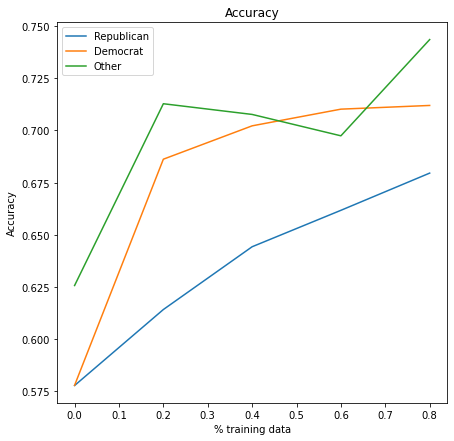

In [ ]:
plot_analysis_usa_party_acc(republican_dfs)

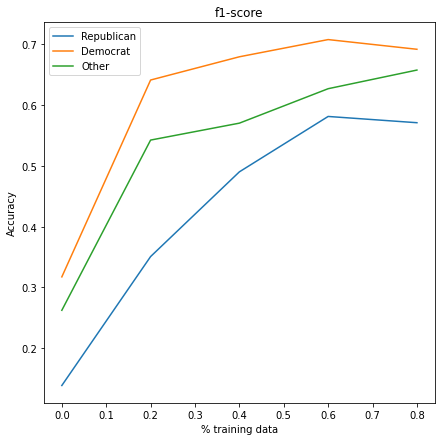

In [ ]:
plot_analysis_usa_party_f1(republican_dfs)

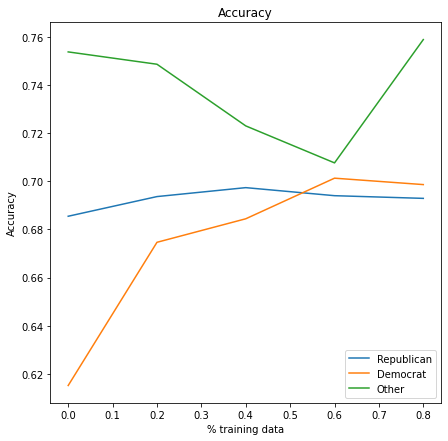

In [ ]:
plot_analysis_usa_party_acc(democrat_dfs)

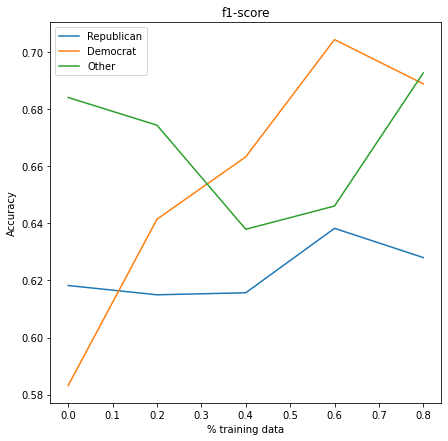

In [ ]:
plot_analysis_usa_party_f1(democrat_dfs)

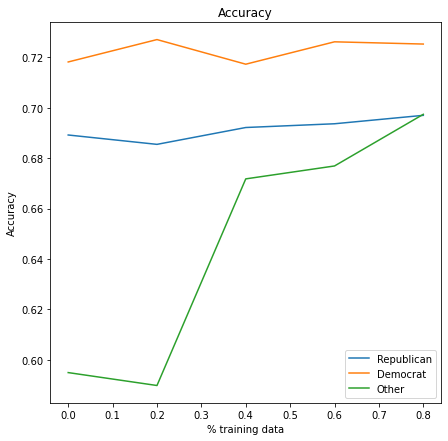

In [ ]:
plot_analysis_usa_party_acc(other_dfs)

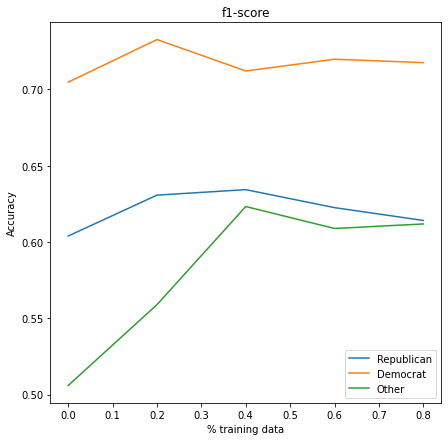

In [ ]:
plot_analysis_usa_party_f1(other_dfs)

# Stance analysis

In [ ]:
anti_Republican_dfs = analysis_dfs_stance([0])

Shape (1120, 4)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
2/2 [==============================] - 14s 306ms/step - loss: 0.6931 - acc: 0.5080
Epoch 2/15
2/2 [==============================] - 2s 229ms/step - loss: 0.6915 - acc: 0.5946
Epoch 3/15
2/2 [==============================] - 2s 226ms/step - loss: 0.6895 - acc: 0.6732
Epoch 4/15
2/2 [==============================] - 2s 207ms/step - loss: 0.6870 - acc: 0.7848
Epoch 5/15
2/2 [==============================] - 2s 230ms/step - loss: 0.6836 - acc: 0.7973
Epoch 6/15
2/2 [==============================] - 2s 211ms/step - loss: 0.6790 - acc: 0.8250
Epoch 7/15
2/2 [==============================] - 2s 250ms/step - loss: 0.6724 - acc: 0.8527
Epoch 8/15
2/2 [==============================] - 2s 217ms/step - loss: 0.6633 - acc: 0.8991
Epoch 9/15
2/2 [==============================] - 2s 297ms/step - loss: 0.6505 - acc: 0.9295
Epoch 10/15
2/2 [==============================] - 2s 255ms/step - loss: 0.6331 - acc: 0.9402
Epoch 11/15
2/2 [==============================] - 2s 244ms/step - l

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
2/2 [==============================] - 12s 253ms/step - loss: 0.6931 - acc: 0.5098
Epoch 2/15
2/2 [==============================] - 2s 222ms/step - loss: 0.6909 - acc: 0.5250
Epoch 3/15
2/2 [==============================] - 2s 274ms/step - loss: 0.6883 - acc: 0.5161
Epoch 4/15
2/2 [==============================] - 2s 239ms/step - loss: 0.6852 - acc: 0.5125
Epoch 5/15
2/2 [==============================] - 2s 218ms/step - loss: 0.6811 - acc: 0.5098
Epoch 6/15
2/2 [==============================] - 2s 229ms/step - loss: 0.6753 - acc: 0.5098
Epoch 7/15
2/2 [==============================] - 2s 206ms/step - loss: 0.6665 - acc: 0.5241
Epoch 8/15
2/2 [==============================] - 2s 221ms/step - loss: 0.6536 - acc: 0.5920
Epoch 9/15
2/2 [==============================] - 1s 201ms/step - loss: 0.6347 - acc: 0.7500
Epoch 10/15
2/2 [==============================] - 1s 201ms/step - loss: 0.6084 - acc: 0.8259
Epoch 11/15
2/2 [==============================] - 2s 227ms/step - l

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
2/2 [==============================] - 10s 205ms/step - loss: 0.6932 - acc: 0.5036
Epoch 2/15
2/2 [==============================] - 1s 213ms/step - loss: 0.6918 - acc: 0.6598
Epoch 3/15
2/2 [==============================] - 2s 219ms/step - loss: 0.6901 - acc: 0.6821
Epoch 4/15
2/2 [==============================] - 2s 250ms/step - loss: 0.6880 - acc: 0.7786
Epoch 5/15
2/2 [==============================] - 2s 261ms/step - loss: 0.6852 - acc: 0.8455
Epoch 6/15
2/2 [==============================] - 2s 225ms/step - loss: 0.6810 - acc: 0.8366
Epoch 7/15
2/2 [==============================] - 2s 204ms/step - loss: 0.6754 - acc: 0.8518
Epoch 8/15
2/2 [==============================] - 2s 222ms/step - loss: 0.6672 - acc: 0.8902
Epoch 9/15
2/2 [==============================] - 2s 250ms/step - loss: 0.6554 - acc: 0.9143
Epoch 10/15
2/2 [==============================] - 2s 255ms/step - loss: 0.6379 - acc: 0.9152
Epoch 11/15
2/2 [==============================] - 2s 209ms/step - l

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
2/2 [==============================] - 12s 252ms/step - loss: 0.6931 - acc: 0.5018
Epoch 2/15
2/2 [==============================] - 2s 219ms/step - loss: 0.6915 - acc: 0.5098
Epoch 3/15
2/2 [==============================] - 2s 225ms/step - loss: 0.6894 - acc: 0.5098
Epoch 4/15
2/2 [==============================] - 2s 244ms/step - loss: 0.6864 - acc: 0.5098
Epoch 5/15
2/2 [==============================] - 2s 260ms/step - loss: 0.6825 - acc: 0.5098
Epoch 6/15
2/2 [==============================] - 1s 210ms/step - loss: 0.6770 - acc: 0.5116
Epoch 7/15
2/2 [==============================] - 2s 216ms/step - loss: 0.6693 - acc: 0.5500
Epoch 8/15
2/2 [==============================] - 2s 276ms/step - loss: 0.6585 - acc: 0.5875
Epoch 9/15
2/2 [==============================] - 2s 300ms/step - loss: 0.6435 - acc: 0.5920
Epoch 10/15
2/2 [==============================] - 2s 215ms/step - loss: 0.6212 - acc: 0.6375
Epoch 11/15
2/2 [==============================] - 2s 217ms/step - l

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.55      1.00      0.71       439
           1       0.00      0.00      0.00       363

    accuracy                           0.55       802
   macro avg       0.27      0.50      0.35       802
weighted avg       0.30      0.55      0.39       802

Conf matrix [[439   0]
 [363   0]]
0: acc=0.5681381957773513
1: acc=0.5882352941176471
2: acc=0.48095238095238096
3: acc=0.6
4: acc=0.5897435897435898
0: f1=0.0
1: f1=0.0
2: f1=0.0
3: f1=0.0
4: f1=0.0
Shape (1120, 4)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
2/2 [==============================] - 12s 220ms/step - loss: 0.6931 - acc: 0.5036
Epoch 2/15
2/2 [==============================] - 2s 247ms/step - loss: 0.6913 - acc: 0.5500
Epoch 3/15
2/2 [==============================] - 2s 261ms/step - loss: 0.6889 - acc: 0.5714
Epoch 4/15
2/2 [==============================] - 2s 286ms/step - loss: 0.6858 - acc: 0.6348
Epoch 5/15
2/2 [==============================] - 2s 261ms/step - loss: 0.6814 - acc: 0.6598
Epoch 6/15
2/2 [==============================] - 2s 236ms/step - loss: 0.6749 - acc: 0.7473
Epoch 7/15
2/2 [==============================] - 2s 305ms/step - loss: 0.6656 - acc: 0.7161
Epoch 8/15
2/2 [==============================] - 3s 280ms/step - loss: 0.6531 - acc: 0.6411
Epoch 9/15
2/2 [==============================] - 2s 314ms/step - loss: 0.6346 - acc: 0.6955
Epoch 10/15
2/2 [==============================] - 2s 234ms/step - loss: 0.6109 - acc: 0.8393
Epoch 11/15
2/2 [==============================] - 2s 235ms/step - l

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
2/2 [==============================] - 12s 849ms/step - loss: 0.6931 - acc: 0.4971
Epoch 2/15
2/2 [==============================] - 3s 985ms/step - loss: 0.6911 - acc: 0.5420
Epoch 3/15
2/2 [==============================] - 3s 915ms/step - loss: 0.6887 - acc: 0.5517
Epoch 4/15
2/2 [==============================] - 3s 1s/step - loss: 0.6852 - acc: 0.5654
Epoch 5/15
2/2 [==============================] - 3s 958ms/step - loss: 0.6805 - acc: 0.6168
Epoch 6/15
2/2 [==============================] - 3s 915ms/step - loss: 0.6737 - acc: 0.6799
Epoch 7/15
2/2 [==============================] - 3s 976ms/step - loss: 0.6640 - acc: 0.7066
Epoch 8/15
2/2 [==============================] - 2s 848ms/step - loss: 0.6500 - acc: 0.7170
Epoch 9/15
2/2 [==============================] - 3s 1s/step - loss: 0.6300 - acc: 0.7554
Epoch 10/15
2/2 [==============================] - 3s 923ms/step - loss: 0.6014 - acc: 0.8133
Epoch 11/15
2/2 [==============================] - 3s 1s/step - loss: 0.56

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
2/2 [==============================] - 14s 847ms/step - loss: 0.6931 - acc: 0.5114
Epoch 2/15
2/2 [==============================] - 3s 1s/step - loss: 0.6909 - acc: 0.6181
Epoch 3/15
2/2 [==============================] - 3s 1s/step - loss: 0.6878 - acc: 0.6766
Epoch 4/15
2/2 [==============================] - 2s 857ms/step - loss: 0.6835 - acc: 0.7326
Epoch 5/15
2/2 [==============================] - 2s 897ms/step - loss: 0.6774 - acc: 0.7619
Epoch 6/15
2/2 [==============================] - 2s 964ms/step - loss: 0.6688 - acc: 0.8055
Epoch 7/15
2/2 [==============================] - 3s 1s/step - loss: 0.6566 - acc: 0.8790
Epoch 8/15
2/2 [==============================] - 2s 890ms/step - loss: 0.6394 - acc: 0.9245
Epoch 9/15
2/2 [==============================] - 2s 890ms/step - loss: 0.6148 - acc: 0.9336
Epoch 10/15
2/2 [==============================] - 3s 927ms/step - loss: 0.5797 - acc: 0.9401
Epoch 11/15
2/2 [==============================] - 2s 901ms/step - loss: 0.52

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
2/2 [==============================] - 14s 1s/step - loss: 0.6930 - acc: 0.5088
Epoch 2/15
2/2 [==============================] - 3s 1s/step - loss: 0.6907 - acc: 0.5244
Epoch 3/15
2/2 [==============================] - 3s 1s/step - loss: 0.6879 - acc: 0.5244
Epoch 4/15
2/2 [==============================] - 3s 1s/step - loss: 0.6838 - acc: 0.5244
Epoch 5/15
2/2 [==============================] - 3s 903ms/step - loss: 0.6778 - acc: 0.5335
Epoch 6/15
2/2 [==============================] - 2s 947ms/step - loss: 0.6688 - acc: 0.5673
Epoch 7/15
2/2 [==============================] - 3s 973ms/step - loss: 0.6553 - acc: 0.6272
Epoch 8/15
2/2 [==============================] - 3s 900ms/step - loss: 0.6354 - acc: 0.7118
Epoch 9/15
2/2 [==============================] - 2s 802ms/step - loss: 0.6069 - acc: 0.7723
Epoch 10/15
2/2 [==============================] - 2s 863ms/step - loss: 0.5656 - acc: 0.8276
Epoch 11/15
2/2 [==============================] - 2s 1s/step - loss: 0.5075 - a

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
2/2 [==============================] - 11s 813ms/step - loss: 0.6930 - acc: 0.5016
Epoch 2/15
2/2 [==============================] - 2s 1s/step - loss: 0.6910 - acc: 0.5277
Epoch 3/15
2/2 [==============================] - 3s 956ms/step - loss: 0.6882 - acc: 0.5250
Epoch 4/15
2/2 [==============================] - 3s 871ms/step - loss: 0.6844 - acc: 0.5264
Epoch 5/15
2/2 [==============================] - 2s 875ms/step - loss: 0.6791 - acc: 0.5322
Epoch 6/15
2/2 [==============================] - 3s 1s/step - loss: 0.6716 - acc: 0.5426
Epoch 7/15
2/2 [==============================] - 2s 859ms/step - loss: 0.6610 - acc: 0.5673
Epoch 8/15
2/2 [==============================] - 2s 843ms/step - loss: 0.6455 - acc: 0.6298
Epoch 9/15
2/2 [==============================] - 2s 866ms/step - loss: 0.6235 - acc: 0.7248
Epoch 10/15
2/2 [==============================] - 2s 898ms/step - loss: 0.5924 - acc: 0.7807
Epoch 11/15
2/2 [==============================] - 2s 924ms/step - loss: 0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
2/2 [==============================] - 18s 852ms/step - loss: 0.6931 - acc: 0.5016
Epoch 2/15
2/2 [==============================] - 3s 1s/step - loss: 0.6911 - acc: 0.5329
Epoch 3/15
2/2 [==============================] - 3s 1s/step - loss: 0.6885 - acc: 0.5316
Epoch 4/15
2/2 [==============================] - 3s 1s/step - loss: 0.6853 - acc: 0.5316
Epoch 5/15
2/2 [==============================] - 4s 1s/step - loss: 0.6801 - acc: 0.5316
Epoch 6/15
2/2 [==============================] - 3s 1s/step - loss: 0.6728 - acc: 0.5316
Epoch 7/15
2/2 [==============================] - 4s 1s/step - loss: 0.6614 - acc: 0.5439
Epoch 8/15
2/2 [==============================] - 3s 971ms/step - loss: 0.6439 - acc: 0.5797
Epoch 9/15
2/2 [==============================] - 3s 989ms/step - loss: 0.6176 - acc: 0.6252
Epoch 10/15
2/2 [==============================] - 3s 894ms/step - loss: 0.5773 - acc: 0.7163
Epoch 11/15
2/2 [==============================] - 3s 992ms/step - loss: 0.5199 - acc:

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
2/2 [==============================] - 14s 1s/step - loss: 0.6931 - acc: 0.5092
Epoch 2/15
2/2 [==============================] - 3s 1s/step - loss: 0.6916 - acc: 0.5906
Epoch 3/15
2/2 [==============================] - 3s 1s/step - loss: 0.6896 - acc: 0.6909
Epoch 4/15
2/2 [==============================] - 3s 2s/step - loss: 0.6865 - acc: 0.7574
Epoch 5/15
2/2 [==============================] - 3s 1s/step - loss: 0.6821 - acc: 0.7712
Epoch 6/15
2/2 [==============================] - 3s 1s/step - loss: 0.6756 - acc: 0.8301
Epoch 7/15
2/2 [==============================] - 3s 1s/step - loss: 0.6662 - acc: 0.8925
Epoch 8/15
2/2 [==============================] - 3s 1s/step - loss: 0.6527 - acc: 0.9150
Epoch 9/15
2/2 [==============================] - 3s 1s/step - loss: 0.6335 - acc: 0.9202
Epoch 10/15
2/2 [==============================] - 3s 1s/step - loss: 0.6055 - acc: 0.8961
Epoch 11/15
2/2 [==============================] - 3s 2s/step - loss: 0.5648 - acc: 0.8895
Epoch 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
2/2 [==============================] - 15s 1s/step - loss: 0.6929 - acc: 0.5256
Epoch 2/15
2/2 [==============================] - 3s 1s/step - loss: 0.6910 - acc: 0.5343
Epoch 3/15
2/2 [==============================] - 3s 1s/step - loss: 0.6881 - acc: 0.5312
Epoch 4/15
2/2 [==============================] - 3s 1s/step - loss: 0.6845 - acc: 0.5312
Epoch 5/15
2/2 [==============================] - 3s 1s/step - loss: 0.6799 - acc: 0.5312
Epoch 6/15
2/2 [==============================] - 3s 1s/step - loss: 0.6735 - acc: 0.5312
Epoch 7/15
2/2 [==============================] - 2s 1s/step - loss: 0.6635 - acc: 0.5312
Epoch 8/15
2/2 [==============================] - 3s 1s/step - loss: 0.6483 - acc: 0.5481
Epoch 9/15
2/2 [==============================] - 3s 1s/step - loss: 0.6243 - acc: 0.6039
Epoch 10/15
2/2 [==============================] - 2s 1s/step - loss: 0.5887 - acc: 0.7277
Epoch 11/15
2/2 [==============================] - 3s 1s/step - loss: 0.5356 - acc: 0.7917
Epoch 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
2/2 [==============================] - 14s 2s/step - loss: 0.6932 - acc: 0.5031
Epoch 2/15
2/2 [==============================] - 3s 1s/step - loss: 0.6917 - acc: 0.5384
Epoch 3/15
2/2 [==============================] - 3s 1s/step - loss: 0.6897 - acc: 0.5394
Epoch 4/15
2/2 [==============================] - 3s 2s/step - loss: 0.6872 - acc: 0.5629
Epoch 5/15
2/2 [==============================] - 3s 1s/step - loss: 0.6829 - acc: 0.6157
Epoch 6/15
2/2 [==============================] - 3s 1s/step - loss: 0.6772 - acc: 0.7190
Epoch 7/15
2/2 [==============================] - 3s 2s/step - loss: 0.6687 - acc: 0.8142
Epoch 8/15
2/2 [==============================] - 3s 1s/step - loss: 0.6562 - acc: 0.8721
Epoch 9/15
2/2 [==============================] - 4s 2s/step - loss: 0.6380 - acc: 0.8997
Epoch 10/15
2/2 [==============================] - 3s 2s/step - loss: 0.6119 - acc: 0.9207
Epoch 11/15
2/2 [==============================] - 3s 1s/step - loss: 0.5743 - acc: 0.9273
Epoch 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
2/2 [==============================] - 13s 2s/step - loss: 0.6923 - acc: 0.5394
Epoch 2/15
2/2 [==============================] - 4s 2s/step - loss: 0.6897 - acc: 0.5379
Epoch 3/15
2/2 [==============================] - 3s 2s/step - loss: 0.6863 - acc: 0.5379
Epoch 4/15
2/2 [==============================] - 3s 2s/step - loss: 0.6819 - acc: 0.5379
Epoch 5/15
2/2 [==============================] - 3s 1s/step - loss: 0.6752 - acc: 0.5379
Epoch 6/15
2/2 [==============================] - 4s 2s/step - loss: 0.6658 - acc: 0.5379
Epoch 7/15
2/2 [==============================] - 3s 1s/step - loss: 0.6514 - acc: 0.5455
Epoch 8/15
2/2 [==============================] - 5s 2s/step - loss: 0.6290 - acc: 0.5850
Epoch 9/15
2/2 [==============================] - 5s 3s/step - loss: 0.5966 - acc: 0.6899
Epoch 10/15
2/2 [==============================] - 5s 2s/step - loss: 0.5497 - acc: 0.7380
Epoch 11/15
2/2 [==============================] - 4s 2s/step - loss: 0.4893 - acc: 0.7871
Epoch 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
2/2 [==============================] - 13s 1s/step - loss: 0.6926 - acc: 0.5322
Epoch 2/15
2/2 [==============================] - 3s 1s/step - loss: 0.6894 - acc: 0.5368
Epoch 3/15
2/2 [==============================] - 3s 1s/step - loss: 0.6854 - acc: 0.5368
Epoch 4/15
2/2 [==============================] - 3s 1s/step - loss: 0.6801 - acc: 0.5368
Epoch 5/15
2/2 [==============================] - 4s 2s/step - loss: 0.6734 - acc: 0.5368
Epoch 6/15
2/2 [==============================] - 3s 1s/step - loss: 0.6629 - acc: 0.5368
Epoch 7/15
2/2 [==============================] - 3s 1s/step - loss: 0.6471 - acc: 0.5466
Epoch 8/15
2/2 [==============================] - 3s 1s/step - loss: 0.6239 - acc: 0.6259
Epoch 9/15
2/2 [==============================] - 3s 1s/step - loss: 0.5918 - acc: 0.7180
Epoch 10/15
2/2 [==============================] - 3s 1s/step - loss: 0.5458 - acc: 0.7277
Epoch 11/15
2/2 [==============================] - 3s 1s/step - loss: 0.4856 - acc: 0.7815
Epoch 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
3/3 [==============================] - 14s 1s/step - loss: 0.6927 - acc: 0.5354
Epoch 2/15
3/3 [==============================] - 4s 983ms/step - loss: 0.6898 - acc: 0.5422
Epoch 3/15
3/3 [==============================] - 3s 917ms/step - loss: 0.6857 - acc: 0.5435
Epoch 4/15
3/3 [==============================] - 3s 882ms/step - loss: 0.6793 - acc: 0.5451
Epoch 5/15
3/3 [==============================] - 4s 1s/step - loss: 0.6682 - acc: 0.5586
Epoch 6/15
3/3 [==============================] - 3s 962ms/step - loss: 0.6484 - acc: 0.6582
Epoch 7/15
3/3 [==============================] - 4s 1s/step - loss: 0.6125 - acc: 0.7983
Epoch 8/15
3/3 [==============================] - 3s 920ms/step - loss: 0.5438 - acc: 0.8392
Epoch 9/15
3/3 [==============================] - 4s 1s/step - loss: 0.4281 - acc: 0.8869
Epoch 10/15
3/3 [==============================] - 4s 937ms/step - loss: 0.2860 - acc: 0.9063
Epoch 11/15
3/3 [==============================] - 4s 1s/step - loss: 0.1693 - a

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
3/3 [==============================] - 16s 1s/step - loss: 0.6925 - acc: 0.5376
Epoch 2/15
3/3 [==============================] - 4s 1s/step - loss: 0.6889 - acc: 0.5422
Epoch 3/15
3/3 [==============================] - 4s 1s/step - loss: 0.6840 - acc: 0.5422
Epoch 4/15
3/3 [==============================] - 4s 1s/step - loss: 0.6763 - acc: 0.5422
Epoch 5/15
3/3 [==============================] - 5s 1s/step - loss: 0.6651 - acc: 0.5422
Epoch 6/15
3/3 [==============================] - 5s 1s/step - loss: 0.6444 - acc: 0.5540
Epoch 7/15
3/3 [==============================] - 4s 1s/step - loss: 0.6046 - acc: 0.6312
Epoch 8/15
3/3 [==============================] - 4s 1s/step - loss: 0.5393 - acc: 0.8025
Epoch 9/15
3/3 [==============================] - 5s 1s/step - loss: 0.4444 - acc: 0.8371
Epoch 10/15
3/3 [==============================] - 5s 1s/step - loss: 0.3425 - acc: 0.9354
Epoch 11/15
3/3 [==============================] - 4s 1s/step - loss: 0.2509 - acc: 0.9532
Epoch 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
3/3 [==============================] - 12s 886ms/step - loss: 0.6924 - acc: 0.5333
Epoch 2/15
3/3 [==============================] - 3s 885ms/step - loss: 0.6887 - acc: 0.5388
Epoch 3/15
3/3 [==============================] - 3s 893ms/step - loss: 0.6835 - acc: 0.5388
Epoch 4/15
3/3 [==============================] - 3s 901ms/step - loss: 0.6763 - acc: 0.5388
Epoch 5/15
3/3 [==============================] - 3s 905ms/step - loss: 0.6647 - acc: 0.5392
Epoch 6/15
3/3 [==============================] - 3s 877ms/step - loss: 0.6434 - acc: 0.5549
Epoch 7/15
3/3 [==============================] - 3s 892ms/step - loss: 0.6051 - acc: 0.6751
Epoch 8/15
3/3 [==============================] - 3s 897ms/step - loss: 0.5431 - acc: 0.7333
Epoch 9/15
3/3 [==============================] - 3s 870ms/step - loss: 0.4582 - acc: 0.8405
Epoch 10/15
3/3 [==============================] - 3s 895ms/step - loss: 0.3701 - acc: 0.9304
Epoch 11/15
3/3 [==============================] - 3s 908ms/step - l

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
3/3 [==============================] - 12s 868ms/step - loss: 0.6925 - acc: 0.5346
Epoch 2/15
3/3 [==============================] - 3s 894ms/step - loss: 0.6889 - acc: 0.5451
Epoch 3/15
3/3 [==============================] - 3s 879ms/step - loss: 0.6837 - acc: 0.5451
Epoch 4/15
3/3 [==============================] - 3s 925ms/step - loss: 0.6762 - acc: 0.5451
Epoch 5/15
3/3 [==============================] - 3s 874ms/step - loss: 0.6636 - acc: 0.5451
Epoch 6/15
3/3 [==============================] - 3s 876ms/step - loss: 0.6416 - acc: 0.5549
Epoch 7/15
3/3 [==============================] - 3s 872ms/step - loss: 0.6013 - acc: 0.6667
Epoch 8/15
3/3 [==============================] - 3s 878ms/step - loss: 0.5350 - acc: 0.7869
Epoch 9/15
3/3 [==============================] - 3s 876ms/step - loss: 0.4521 - acc: 0.8190
Epoch 10/15
3/3 [==============================] - 3s 875ms/step - loss: 0.3554 - acc: 0.9228
Epoch 11/15
3/3 [==============================] - 3s 895ms/step - l

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
3/3 [==============================] - 11s 902ms/step - loss: 0.6921 - acc: 0.5380
Epoch 2/15
3/3 [==============================] - 3s 872ms/step - loss: 0.6869 - acc: 0.5418
Epoch 3/15
3/3 [==============================] - 3s 898ms/step - loss: 0.6805 - acc: 0.5418
Epoch 4/15
3/3 [==============================] - 3s 935ms/step - loss: 0.6706 - acc: 0.5418
Epoch 5/15
3/3 [==============================] - 3s 898ms/step - loss: 0.6531 - acc: 0.5477
Epoch 6/15
3/3 [==============================] - 3s 887ms/step - loss: 0.6219 - acc: 0.6287
Epoch 7/15
3/3 [==============================] - 3s 879ms/step - loss: 0.5686 - acc: 0.7388
Epoch 8/15
3/3 [==============================] - 3s 885ms/step - loss: 0.4849 - acc: 0.8063
Epoch 9/15
3/3 [==============================] - 3s 930ms/step - loss: 0.3865 - acc: 0.8983
Epoch 10/15
3/3 [==============================] - 3s 891ms/step - loss: 0.2783 - acc: 0.9435
Epoch 11/15
3/3 [==============================] - 3s 880ms/step - l

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
3/3 [==============================] - 12s 1s/step - loss: 0.6919 - acc: 0.5386
Epoch 2/15
3/3 [==============================] - 3s 1s/step - loss: 0.6864 - acc: 0.5422
Epoch 3/15
3/3 [==============================] - 4s 1s/step - loss: 0.6787 - acc: 0.5422
Epoch 4/15
3/3 [==============================] - 4s 1s/step - loss: 0.6674 - acc: 0.5422
Epoch 5/15
3/3 [==============================] - 3s 1s/step - loss: 0.6477 - acc: 0.5522
Epoch 6/15
3/3 [==============================] - 4s 1s/step - loss: 0.6121 - acc: 0.6304
Epoch 7/15
3/3 [==============================] - 4s 1s/step - loss: 0.5519 - acc: 0.7463
Epoch 8/15
3/3 [==============================] - 4s 1s/step - loss: 0.4710 - acc: 0.7987
Epoch 9/15
3/3 [==============================] - 4s 1s/step - loss: 0.3851 - acc: 0.9200
Epoch 10/15
3/3 [==============================] - 4s 1s/step - loss: 0.3003 - acc: 0.9483
Epoch 11/15
3/3 [==============================] - 4s 1s/step - loss: 0.2098 - acc: 0.9656
Epoch 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
3/3 [==============================] - 12s 1s/step - loss: 0.6925 - acc: 0.5228
Epoch 2/15
3/3 [==============================] - 3s 1s/step - loss: 0.6887 - acc: 0.5447
Epoch 3/15
3/3 [==============================] - 4s 1s/step - loss: 0.6840 - acc: 0.5447
Epoch 4/15
3/3 [==============================] - 4s 1s/step - loss: 0.6767 - acc: 0.5447
Epoch 5/15
3/3 [==============================] - 3s 1s/step - loss: 0.6658 - acc: 0.5447
Epoch 6/15
3/3 [==============================] - 3s 1s/step - loss: 0.6462 - acc: 0.5547
Epoch 7/15
3/3 [==============================] - 4s 1s/step - loss: 0.6083 - acc: 0.6236
Epoch 8/15
3/3 [==============================] - 4s 1s/step - loss: 0.5434 - acc: 0.8242
Epoch 9/15
3/3 [==============================] - 4s 1s/step - loss: 0.4467 - acc: 0.8572
Epoch 10/15
3/3 [==============================] - 4s 1s/step - loss: 0.3343 - acc: 0.9142
Epoch 11/15
3/3 [==============================] - 4s 1s/step - loss: 0.2306 - acc: 0.9394
Epoch 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
3/3 [==============================] - 13s 1s/step - loss: 0.6918 - acc: 0.5436
Epoch 2/15
3/3 [==============================] - 4s 1s/step - loss: 0.6874 - acc: 0.5457
Epoch 3/15
3/3 [==============================] - 4s 1s/step - loss: 0.6813 - acc: 0.5457
Epoch 4/15
3/3 [==============================] - 3s 1s/step - loss: 0.6728 - acc: 0.5457
Epoch 5/15
3/3 [==============================] - 3s 1s/step - loss: 0.6568 - acc: 0.5457
Epoch 6/15
3/3 [==============================] - 3s 1s/step - loss: 0.6256 - acc: 0.6017
Epoch 7/15
3/3 [==============================] - 4s 1s/step - loss: 0.5717 - acc: 0.7348
Epoch 8/15
3/3 [==============================] - 3s 1s/step - loss: 0.4913 - acc: 0.7689
Epoch 9/15
3/3 [==============================] - 3s 1s/step - loss: 0.3942 - acc: 0.8988
Epoch 10/15
3/3 [==============================] - 3s 1s/step - loss: 0.2926 - acc: 0.9419
Epoch 11/15
3/3 [==============================] - 3s 1s/step - loss: 0.1964 - acc: 0.9566
Epoch 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
3/3 [==============================] - 13s 1s/step - loss: 0.6926 - acc: 0.5361
Epoch 2/15
3/3 [==============================] - 4s 1s/step - loss: 0.6897 - acc: 0.5486
Epoch 3/15
3/3 [==============================] - 4s 1s/step - loss: 0.6854 - acc: 0.5486
Epoch 4/15
3/3 [==============================] - 4s 1s/step - loss: 0.6792 - acc: 0.5486
Epoch 5/15
3/3 [==============================] - 4s 1s/step - loss: 0.6703 - acc: 0.5486
Epoch 6/15
3/3 [==============================] - 4s 1s/step - loss: 0.6526 - acc: 0.5504
Epoch 7/15
3/3 [==============================] - 4s 1s/step - loss: 0.6182 - acc: 0.6024
Epoch 8/15
3/3 [==============================] - 4s 1s/step - loss: 0.5537 - acc: 0.7714
Epoch 9/15
3/3 [==============================] - 4s 1s/step - loss: 0.4567 - acc: 0.8202
Epoch 10/15
3/3 [==============================] - 4s 1s/step - loss: 0.3425 - acc: 0.9117
Epoch 11/15
3/3 [==============================] - 4s 1s/step - loss: 0.2317 - acc: 0.9394
Epoch 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
3/3 [==============================] - 13s 1s/step - loss: 0.6922 - acc: 0.5271
Epoch 2/15
3/3 [==============================] - 4s 1s/step - loss: 0.6877 - acc: 0.5414
Epoch 3/15
3/3 [==============================] - 4s 1s/step - loss: 0.6820 - acc: 0.5414
Epoch 4/15
3/3 [==============================] - 4s 1s/step - loss: 0.6731 - acc: 0.5414
Epoch 5/15
3/3 [==============================] - 4s 1s/step - loss: 0.6566 - acc: 0.5436
Epoch 6/15
3/3 [==============================] - 4s 1s/step - loss: 0.6240 - acc: 0.6189
Epoch 7/15
3/3 [==============================] - 4s 1s/step - loss: 0.5691 - acc: 0.7338
Epoch 8/15
3/3 [==============================] - 4s 1s/step - loss: 0.4849 - acc: 0.7905
Epoch 9/15
3/3 [==============================] - 4s 1s/step - loss: 0.3940 - acc: 0.9103
Epoch 10/15
3/3 [==============================] - 4s 1s/step - loss: 0.3065 - acc: 0.9408
Epoch 11/15
3/3 [==============================] - 4s 1s/step - loss: 0.2141 - acc: 0.9548
Epoch 1

In [ ]:
pro_Republican_dfs = analysis_dfs_stance([1])

Shape (3139, 4)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
4/4 [==============================] - 13s 963ms/step - loss: 0.6929 - acc: 0.5145
Epoch 2/15
4/4 [==============================] - 4s 923ms/step - loss: 0.6890 - acc: 0.5476
Epoch 3/15
4/4 [==============================] - 4s 904ms/step - loss: 0.6841 - acc: 0.5476
Epoch 4/15
4/4 [==============================] - 4s 902ms/step - loss: 0.6761 - acc: 0.5476
Epoch 5/15
4/4 [==============================] - 4s 925ms/step - loss: 0.6618 - acc: 0.5476
Epoch 6/15
4/4 [==============================] - 4s 938ms/step - loss: 0.6317 - acc: 0.5766
Epoch 7/15
4/4 [==============================] - 4s 902ms/step - loss: 0.5634 - acc: 0.7114
Epoch 8/15
4/4 [==============================] - 4s 896ms/step - loss: 0.4410 - acc: 0.8589
Epoch 9/15
4/4 [==============================] - 4s 884ms/step - loss: 0.3029 - acc: 0.9073
Epoch 10/15
4/4 [==============================] - 4s 911ms/step - loss: 0.1817 - acc: 0.9414
Epoch 11/15
4/4 [==============================] - 4s 955ms/step - l

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
4/4 [==============================] - 12s 901ms/step - loss: 0.6928 - acc: 0.5145
Epoch 2/15
4/4 [==============================] - 4s 900ms/step - loss: 0.6895 - acc: 0.5476
Epoch 3/15
4/4 [==============================] - 4s 893ms/step - loss: 0.6848 - acc: 0.5476
Epoch 4/15
4/4 [==============================] - 4s 911ms/step - loss: 0.6781 - acc: 0.5476
Epoch 5/15
4/4 [==============================] - 4s 909ms/step - loss: 0.6672 - acc: 0.5476
Epoch 6/15
4/4 [==============================] - 4s 907ms/step - loss: 0.6420 - acc: 0.5553
Epoch 7/15
4/4 [==============================] - 4s 971ms/step - loss: 0.5876 - acc: 0.6416
Epoch 8/15
4/4 [==============================] - 4s 915ms/step - loss: 0.4858 - acc: 0.7929
Epoch 9/15
4/4 [==============================] - 4s 907ms/step - loss: 0.3784 - acc: 0.9016
Epoch 10/15
4/4 [==============================] - 4s 927ms/step - loss: 0.2776 - acc: 0.9414
Epoch 11/15
4/4 [==============================] - 4s 904ms/step - l

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
4/4 [==============================] - 13s 914ms/step - loss: 0.6923 - acc: 0.5378
Epoch 2/15
4/4 [==============================] - 4s 917ms/step - loss: 0.6880 - acc: 0.5476
Epoch 3/15
4/4 [==============================] - 4s 925ms/step - loss: 0.6817 - acc: 0.5489
Epoch 4/15
4/4 [==============================] - 4s 940ms/step - loss: 0.6700 - acc: 0.5476
Epoch 5/15
4/4 [==============================] - 4s 901ms/step - loss: 0.6495 - acc: 0.5511
Epoch 6/15
4/4 [==============================] - 4s 932ms/step - loss: 0.6018 - acc: 0.6397
Epoch 7/15
4/4 [==============================] - 4s 911ms/step - loss: 0.5077 - acc: 0.8117
Epoch 8/15
4/4 [==============================] - 4s 918ms/step - loss: 0.3902 - acc: 0.9009
Epoch 9/15
4/4 [==============================] - 4s 893ms/step - loss: 0.2755 - acc: 0.9328
Epoch 10/15
4/4 [==============================] - 4s 914ms/step - loss: 0.1563 - acc: 0.9576
Epoch 11/15
4/4 [==============================] - 4s 953ms/step - l

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
4/4 [==============================] - 13s 898ms/step - loss: 0.6918 - acc: 0.5483
Epoch 2/15
4/4 [==============================] - 4s 915ms/step - loss: 0.6855 - acc: 0.5476
Epoch 3/15
4/4 [==============================] - 4s 877ms/step - loss: 0.6768 - acc: 0.5476
Epoch 4/15
4/4 [==============================] - 4s 899ms/step - loss: 0.6639 - acc: 0.5483
Epoch 5/15
4/4 [==============================] - 4s 913ms/step - loss: 0.6353 - acc: 0.5706
Epoch 6/15
4/4 [==============================] - 4s 900ms/step - loss: 0.5739 - acc: 0.6970
Epoch 7/15
4/4 [==============================] - 4s 895ms/step - loss: 0.4639 - acc: 0.8241
Epoch 8/15
4/4 [==============================] - 4s 870ms/step - loss: 0.3448 - acc: 0.9175
Epoch 9/15
4/4 [==============================] - 4s 893ms/step - loss: 0.2292 - acc: 0.9458
Epoch 10/15
4/4 [==============================] - 4s 873ms/step - loss: 0.1677 - acc: 0.9532
Epoch 11/15
4/4 [==============================] - 4s 887ms/step - l

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
4/4 [==============================] - 13s 891ms/step - loss: 0.6921 - acc: 0.5403
Epoch 2/15
4/4 [==============================] - 4s 890ms/step - loss: 0.6868 - acc: 0.5476
Epoch 3/15
4/4 [==============================] - 4s 881ms/step - loss: 0.6795 - acc: 0.5476
Epoch 4/15
4/4 [==============================] - 4s 862ms/step - loss: 0.6680 - acc: 0.5476
Epoch 5/15
4/4 [==============================] - 4s 885ms/step - loss: 0.6452 - acc: 0.5556
Epoch 6/15
4/4 [==============================] - 4s 887ms/step - loss: 0.5926 - acc: 0.7324
Epoch 7/15
4/4 [==============================] - 4s 885ms/step - loss: 0.4950 - acc: 0.8025
Epoch 8/15
4/4 [==============================] - 4s 878ms/step - loss: 0.3581 - acc: 0.8993
Epoch 9/15
4/4 [==============================] - 4s 889ms/step - loss: 0.2347 - acc: 0.9302
Epoch 10/15
4/4 [==============================] - 4s 869ms/step - loss: 0.1890 - acc: 0.9197
Epoch 11/15
4/4 [==============================] - 4s 869ms/step - l

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
4/4 [==============================] - 13s 914ms/step - loss: 0.6923 - acc: 0.5197
Epoch 2/15
4/4 [==============================] - 4s 891ms/step - loss: 0.6869 - acc: 0.5476
Epoch 3/15
4/4 [==============================] - 4s 882ms/step - loss: 0.6803 - acc: 0.5476
Epoch 4/15
4/4 [==============================] - 4s 948ms/step - loss: 0.6704 - acc: 0.5476
Epoch 5/15
4/4 [==============================] - 4s 925ms/step - loss: 0.6488 - acc: 0.5549
Epoch 6/15
4/4 [==============================] - 4s 949ms/step - loss: 0.6045 - acc: 0.6168
Epoch 7/15
4/4 [==============================] - 4s 966ms/step - loss: 0.5183 - acc: 0.7459
Epoch 8/15
4/4 [==============================] - 4s 937ms/step - loss: 0.4088 - acc: 0.8709
Epoch 9/15
4/4 [==============================] - 4s 876ms/step - loss: 0.2867 - acc: 0.9337
Epoch 10/15
4/4 [==============================] - 4s 913ms/step - loss: 0.1826 - acc: 0.9549
Epoch 11/15
4/4 [==============================] - 4s 911ms/step - l

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
4/4 [==============================] - 12s 906ms/step - loss: 0.6925 - acc: 0.5336
Epoch 2/15
4/4 [==============================] - 4s 866ms/step - loss: 0.6880 - acc: 0.5482
Epoch 3/15
4/4 [==============================] - 4s 866ms/step - loss: 0.6818 - acc: 0.5482
Epoch 4/15
4/4 [==============================] - 4s 880ms/step - loss: 0.6712 - acc: 0.5520
Epoch 5/15
4/4 [==============================] - 4s 894ms/step - loss: 0.6516 - acc: 0.5638
Epoch 6/15
4/4 [==============================] - 4s 903ms/step - loss: 0.6052 - acc: 0.6260
Epoch 7/15
4/4 [==============================] - 4s 912ms/step - loss: 0.5070 - acc: 0.8043
Epoch 8/15
4/4 [==============================] - 4s 923ms/step - loss: 0.3842 - acc: 0.8972
Epoch 9/15
4/4 [==============================] - 4s 900ms/step - loss: 0.2629 - acc: 0.9293
Epoch 10/15
4/4 [==============================] - 4s 934ms/step - loss: 0.1714 - acc: 0.9454
Epoch 11/15
4/4 [==============================] - 4s 871ms/step - l

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
4/4 [==============================] - 13s 887ms/step - loss: 0.6923 - acc: 0.5359
Epoch 2/15
4/4 [==============================] - 4s 881ms/step - loss: 0.6869 - acc: 0.5473
Epoch 3/15
4/4 [==============================] - 4s 872ms/step - loss: 0.6795 - acc: 0.5473
Epoch 4/15
4/4 [==============================] - 4s 905ms/step - loss: 0.6673 - acc: 0.5473
Epoch 5/15
4/4 [==============================] - 4s 881ms/step - loss: 0.6394 - acc: 0.5695
Epoch 6/15
4/4 [==============================] - 4s 866ms/step - loss: 0.5812 - acc: 0.7719
Epoch 7/15
4/4 [==============================] - 4s 883ms/step - loss: 0.4783 - acc: 0.7884
Epoch 8/15
4/4 [==============================] - 4s 877ms/step - loss: 0.3506 - acc: 0.9042
Epoch 9/15
4/4 [==============================] - 4s 871ms/step - loss: 0.2099 - acc: 0.9359
Epoch 10/15
4/4 [==============================] - 4s 871ms/step - loss: 0.1297 - acc: 0.9569
Epoch 11/15
4/4 [==============================] - 4s 859ms/step - l

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
4/4 [==============================] - 13s 887ms/step - loss: 0.6925 - acc: 0.5209
Epoch 2/15
4/4 [==============================] - 4s 883ms/step - loss: 0.6874 - acc: 0.5473
Epoch 3/15
4/4 [==============================] - 4s 883ms/step - loss: 0.6808 - acc: 0.5473
Epoch 4/15
4/4 [==============================] - 4s 884ms/step - loss: 0.6716 - acc: 0.5473
Epoch 5/15
4/4 [==============================] - 4s 877ms/step - loss: 0.6541 - acc: 0.5482
Epoch 6/15
4/4 [==============================] - 4s 877ms/step - loss: 0.6142 - acc: 0.6377
Epoch 7/15
4/4 [==============================] - 4s 889ms/step - loss: 0.5394 - acc: 0.7602
Epoch 8/15
4/4 [==============================] - 4s 882ms/step - loss: 0.4244 - acc: 0.8503
Epoch 9/15
4/4 [==============================] - 4s 887ms/step - loss: 0.3164 - acc: 0.9245
Epoch 10/15
4/4 [==============================] - 4s 885ms/step - loss: 0.1963 - acc: 0.9499
Epoch 11/15
4/4 [==============================] - 4s 881ms/step - l

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
4/4 [==============================] - 13s 908ms/step - loss: 0.6924 - acc: 0.5298
Epoch 2/15
4/4 [==============================] - 4s 889ms/step - loss: 0.6879 - acc: 0.5476
Epoch 3/15
4/4 [==============================] - 4s 896ms/step - loss: 0.6817 - acc: 0.5479
Epoch 4/15
4/4 [==============================] - 4s 961ms/step - loss: 0.6708 - acc: 0.5536
Epoch 5/15
4/4 [==============================] - 4s 975ms/step - loss: 0.6492 - acc: 0.5587
Epoch 6/15
4/4 [==============================] - 4s 983ms/step - loss: 0.5949 - acc: 0.6494
Epoch 7/15
4/4 [==============================] - 4s 934ms/step - loss: 0.4857 - acc: 0.8445
Epoch 8/15
4/4 [==============================] - 4s 967ms/step - loss: 0.3489 - acc: 0.8921
Epoch 9/15
4/4 [==============================] - 4s 978ms/step - loss: 0.2011 - acc: 0.9381
Epoch 10/15
4/4 [==============================] - 4s 913ms/step - loss: 0.1168 - acc: 0.9610
Epoch 11/15
4/4 [==============================] - 4s 915ms/step - l

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
4/4 [==============================] - 14s 928ms/step - loss: 0.6926 - acc: 0.5280
Epoch 2/15
4/4 [==============================] - 4s 923ms/step - loss: 0.6883 - acc: 0.5476
Epoch 3/15
4/4 [==============================] - 4s 899ms/step - loss: 0.6827 - acc: 0.5476
Epoch 4/15
4/4 [==============================] - 4s 934ms/step - loss: 0.6743 - acc: 0.5476
Epoch 5/15
4/4 [==============================] - 4s 923ms/step - loss: 0.6606 - acc: 0.5476
Epoch 6/15
4/4 [==============================] - 4s 955ms/step - loss: 0.6276 - acc: 0.5671
Epoch 7/15
4/4 [==============================] - 4s 959ms/step - loss: 0.5651 - acc: 0.7981
Epoch 8/15
4/4 [==============================] - 4s 941ms/step - loss: 0.4690 - acc: 0.7779
Epoch 9/15
4/4 [==============================] - 4s 909ms/step - loss: 0.3589 - acc: 0.9188
Epoch 10/15
4/4 [==============================] - 4s 894ms/step - loss: 0.2449 - acc: 0.9406
Epoch 11/15
4/4 [==============================] - 4s 881ms/step - l

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
4/4 [==============================] - 12s 881ms/step - loss: 0.6930 - acc: 0.5118
Epoch 2/15
4/4 [==============================] - 4s 892ms/step - loss: 0.6903 - acc: 0.5558
Epoch 3/15
4/4 [==============================] - 4s 900ms/step - loss: 0.6860 - acc: 0.5848
Epoch 4/15
4/4 [==============================] - 4s 889ms/step - loss: 0.6785 - acc: 0.5845
Epoch 5/15
4/4 [==============================] - 4s 878ms/step - loss: 0.6649 - acc: 0.6376
Epoch 6/15
4/4 [==============================] - 4s 887ms/step - loss: 0.6380 - acc: 0.6761
Epoch 7/15
4/4 [==============================] - 4s 897ms/step - loss: 0.5767 - acc: 0.8411
Epoch 8/15
4/4 [==============================] - 4s 892ms/step - loss: 0.4384 - acc: 0.8875
Epoch 9/15
4/4 [==============================] - 4s 916ms/step - loss: 0.2592 - acc: 0.9093
Epoch 10/15
4/4 [==============================] - 4s 911ms/step - loss: 0.1504 - acc: 0.9488
Epoch 11/15
4/4 [==============================] - 4s 879ms/step - l

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
4/4 [==============================] - 13s 927ms/step - loss: 0.6925 - acc: 0.5223
Epoch 2/15
4/4 [==============================] - 4s 912ms/step - loss: 0.6883 - acc: 0.5466
Epoch 3/15
4/4 [==============================] - 4s 898ms/step - loss: 0.6826 - acc: 0.5466
Epoch 4/15
4/4 [==============================] - 4s 895ms/step - loss: 0.6742 - acc: 0.5466
Epoch 5/15
4/4 [==============================] - 4s 915ms/step - loss: 0.6598 - acc: 0.5466
Epoch 6/15
4/4 [==============================] - 4s 898ms/step - loss: 0.6228 - acc: 0.5782
Epoch 7/15
4/4 [==============================] - 4s 880ms/step - loss: 0.5476 - acc: 0.7425
Epoch 8/15
4/4 [==============================] - 4s 885ms/step - loss: 0.4512 - acc: 0.8404
Epoch 9/15
4/4 [==============================] - 4s 925ms/step - loss: 0.3366 - acc: 0.9242
Epoch 10/15
4/4 [==============================] - 4s 877ms/step - loss: 0.2095 - acc: 0.9501
Epoch 11/15
4/4 [==============================] - 4s 861ms/step - l

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
4/4 [==============================] - 13s 894ms/step - loss: 0.6925 - acc: 0.5226
Epoch 2/15
4/4 [==============================] - 4s 867ms/step - loss: 0.6871 - acc: 0.5476
Epoch 3/15
4/4 [==============================] - 4s 882ms/step - loss: 0.6796 - acc: 0.5476
Epoch 4/15
4/4 [==============================] - 4s 867ms/step - loss: 0.6682 - acc: 0.5476
Epoch 5/15
4/4 [==============================] - 4s 871ms/step - loss: 0.6439 - acc: 0.5633
Epoch 6/15
4/4 [==============================] - 4s 873ms/step - loss: 0.5954 - acc: 0.7652
Epoch 7/15
4/4 [==============================] - 4s 874ms/step - loss: 0.5050 - acc: 0.7678
Epoch 8/15
4/4 [==============================] - 4s 857ms/step - loss: 0.3800 - acc: 0.8926
Epoch 9/15
4/4 [==============================] - 4s 879ms/step - loss: 0.2516 - acc: 0.9299
Epoch 10/15
4/4 [==============================] - 4s 876ms/step - loss: 0.1433 - acc: 0.9567
Epoch 11/15
4/4 [==============================] - 4s 880ms/step - l

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
4/4 [==============================] - 13s 889ms/step - loss: 0.6927 - acc: 0.5166
Epoch 2/15
4/4 [==============================] - 4s 889ms/step - loss: 0.6889 - acc: 0.5479
Epoch 3/15
4/4 [==============================] - 4s 882ms/step - loss: 0.6828 - acc: 0.5498
Epoch 4/15
4/4 [==============================] - 4s 871ms/step - loss: 0.6712 - acc: 0.5589
Epoch 5/15
4/4 [==============================] - 4s 887ms/step - loss: 0.6475 - acc: 0.6363
Epoch 6/15
4/4 [==============================] - 4s 883ms/step - loss: 0.5939 - acc: 0.7273
Epoch 7/15
4/4 [==============================] - 4s 900ms/step - loss: 0.4759 - acc: 0.8676
Epoch 8/15
4/4 [==============================] - 4s 865ms/step - loss: 0.3087 - acc: 0.9027
Epoch 9/15
4/4 [==============================] - 4s 887ms/step - loss: 0.1907 - acc: 0.9368
Epoch 10/15
4/4 [==============================] - 4s 904ms/step - loss: 0.1063 - acc: 0.9649
Epoch 11/15
4/4 [==============================] - 4s 894ms/step - l

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
4/4 [==============================] - 12s 892ms/step - loss: 0.6920 - acc: 0.5400
Epoch 2/15
4/4 [==============================] - 4s 880ms/step - loss: 0.6856 - acc: 0.5472
Epoch 3/15
4/4 [==============================] - 4s 874ms/step - loss: 0.6776 - acc: 0.5472
Epoch 4/15
4/4 [==============================] - 4s 874ms/step - loss: 0.6644 - acc: 0.5475
Epoch 5/15
4/4 [==============================] - 4s 891ms/step - loss: 0.6344 - acc: 0.5746
Epoch 6/15
4/4 [==============================] - 4s 881ms/step - loss: 0.5710 - acc: 0.7832
Epoch 7/15
4/4 [==============================] - 4s 882ms/step - loss: 0.4612 - acc: 0.8408
Epoch 8/15
4/4 [==============================] - 4s 893ms/step - loss: 0.3274 - acc: 0.8971
Epoch 9/15
4/4 [==============================] - 4s 903ms/step - loss: 0.2032 - acc: 0.9364
Epoch 10/15
4/4 [==============================] - 4s 917ms/step - loss: 0.1217 - acc: 0.9575
Epoch 11/15
4/4 [==============================] - 4s 907ms/step - l

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
4/4 [==============================] - 12s 870ms/step - loss: 0.6921 - acc: 0.5425
Epoch 2/15
4/4 [==============================] - 4s 904ms/step - loss: 0.6865 - acc: 0.5475
Epoch 3/15
4/4 [==============================] - 4s 891ms/step - loss: 0.6787 - acc: 0.5475
Epoch 4/15
4/4 [==============================] - 4s 892ms/step - loss: 0.6647 - acc: 0.5478
Epoch 5/15
4/4 [==============================] - 4s 888ms/step - loss: 0.6342 - acc: 0.5724
Epoch 6/15
4/4 [==============================] - 4s 911ms/step - loss: 0.5613 - acc: 0.7102
Epoch 7/15
4/4 [==============================] - 4s 911ms/step - loss: 0.4312 - acc: 0.8710
Epoch 8/15
4/4 [==============================] - 4s 890ms/step - loss: 0.2966 - acc: 0.9157
Epoch 9/15
4/4 [==============================] - 4s 888ms/step - loss: 0.1966 - acc: 0.9339
Epoch 10/15
4/4 [==============================] - 4s 898ms/step - loss: 0.1178 - acc: 0.9638
Epoch 11/15
4/4 [==============================] - 4s 908ms/step - l

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
4/4 [==============================] - 12s 949ms/step - loss: 0.6921 - acc: 0.5403
Epoch 2/15
4/4 [==============================] - 4s 906ms/step - loss: 0.6875 - acc: 0.5466
Epoch 3/15
4/4 [==============================] - 4s 898ms/step - loss: 0.6809 - acc: 0.5466
Epoch 4/15
4/4 [==============================] - 4s 887ms/step - loss: 0.6723 - acc: 0.5466
Epoch 5/15
4/4 [==============================] - 4s 913ms/step - loss: 0.6544 - acc: 0.5466
Epoch 6/15
4/4 [==============================] - 4s 912ms/step - loss: 0.6151 - acc: 0.6082
Epoch 7/15
4/4 [==============================] - 4s 911ms/step - loss: 0.5367 - acc: 0.7288
Epoch 8/15
4/4 [==============================] - 4s 899ms/step - loss: 0.4368 - acc: 0.8578
Epoch 9/15
4/4 [==============================] - 4s 978ms/step - loss: 0.3414 - acc: 0.9125
Epoch 10/15
4/4 [==============================] - 4s 960ms/step - loss: 0.2454 - acc: 0.9276
Epoch 11/15
4/4 [==============================] - 4s 889ms/step - l

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
4/4 [==============================] - 13s 899ms/step - loss: 0.6923 - acc: 0.5390
Epoch 2/15
4/4 [==============================] - 4s 893ms/step - loss: 0.6876 - acc: 0.5478
Epoch 3/15
4/4 [==============================] - 4s 896ms/step - loss: 0.6812 - acc: 0.5478
Epoch 4/15
4/4 [==============================] - 4s 917ms/step - loss: 0.6711 - acc: 0.5478
Epoch 5/15
4/4 [==============================] - 4s 881ms/step - loss: 0.6516 - acc: 0.5500
Epoch 6/15
4/4 [==============================] - 4s 890ms/step - loss: 0.6028 - acc: 0.6016
Epoch 7/15
4/4 [==============================] - 4s 913ms/step - loss: 0.4980 - acc: 0.8332
Epoch 8/15
4/4 [==============================] - 4s 926ms/step - loss: 0.3712 - acc: 0.8870
Epoch 9/15
4/4 [==============================] - 4s 937ms/step - loss: 0.2363 - acc: 0.9352
Epoch 10/15
4/4 [==============================] - 4s 907ms/step - loss: 0.1364 - acc: 0.9550
Epoch 11/15
4/4 [==============================] - 4s 917ms/step - l

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
4/4 [==============================] - 16s 1s/step - loss: 0.6915 - acc: 0.5447
Epoch 2/15
4/4 [==============================] - 4s 927ms/step - loss: 0.6845 - acc: 0.5475
Epoch 3/15
4/4 [==============================] - 4s 911ms/step - loss: 0.6755 - acc: 0.5475
Epoch 4/15
4/4 [==============================] - 4s 918ms/step - loss: 0.6607 - acc: 0.5475
Epoch 5/15
4/4 [==============================] - 4s 886ms/step - loss: 0.6236 - acc: 0.5680
Epoch 6/15
4/4 [==============================] - 4s 889ms/step - loss: 0.5567 - acc: 0.7105
Epoch 7/15
4/4 [==============================] - 4s 896ms/step - loss: 0.4635 - acc: 0.8241
Epoch 8/15
4/4 [==============================] - 4s 909ms/step - loss: 0.3711 - acc: 0.9226
Epoch 9/15
4/4 [==============================] - 4s 902ms/step - loss: 0.2775 - acc: 0.9490
Epoch 10/15
4/4 [==============================] - 4s 917ms/step - loss: 0.1864 - acc: 0.9585
Epoch 11/15
4/4 [==============================] - 4s 913ms/step - loss

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
4/4 [==============================] - 13s 890ms/step - loss: 0.6914 - acc: 0.5456
Epoch 2/15
4/4 [==============================] - 4s 880ms/step - loss: 0.6845 - acc: 0.5475
Epoch 3/15
4/4 [==============================] - 4s 918ms/step - loss: 0.6752 - acc: 0.5475
Epoch 4/15
4/4 [==============================] - 4s 872ms/step - loss: 0.6567 - acc: 0.5475
Epoch 5/15
4/4 [==============================] - 4s 877ms/step - loss: 0.6152 - acc: 0.5754
Epoch 6/15
4/4 [==============================] - 4s 888ms/step - loss: 0.5358 - acc: 0.6988
Epoch 7/15
4/4 [==============================] - 4s 887ms/step - loss: 0.4304 - acc: 0.8684
Epoch 8/15
4/4 [==============================] - 4s 899ms/step - loss: 0.3468 - acc: 0.9298
Epoch 9/15
4/4 [==============================] - 4s 889ms/step - loss: 0.2461 - acc: 0.9564
Epoch 10/15
4/4 [==============================] - 4s 897ms/step - loss: 0.1595 - acc: 0.9662
Epoch 11/15
4/4 [==============================] - 4s 902ms/step - l

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
4/4 [==============================] - 13s 937ms/step - loss: 0.6926 - acc: 0.5243
Epoch 2/15
4/4 [==============================] - 4s 912ms/step - loss: 0.6886 - acc: 0.5481
Epoch 3/15
4/4 [==============================] - 4s 900ms/step - loss: 0.6829 - acc: 0.5481
Epoch 4/15
4/4 [==============================] - 4s 888ms/step - loss: 0.6740 - acc: 0.5500
Epoch 5/15
4/4 [==============================] - 4s 913ms/step - loss: 0.6557 - acc: 0.5600
Epoch 6/15
4/4 [==============================] - 4s 937ms/step - loss: 0.6095 - acc: 0.6449
Epoch 7/15
4/4 [==============================] - 4s 929ms/step - loss: 0.5067 - acc: 0.8054
Epoch 8/15
4/4 [==============================] - 4s 913ms/step - loss: 0.3726 - acc: 0.8819
Epoch 9/15
4/4 [==============================] - 4s 896ms/step - loss: 0.2488 - acc: 0.9135
Epoch 10/15
4/4 [==============================] - 4s 892ms/step - loss: 0.1429 - acc: 0.9483
Epoch 11/15
4/4 [==============================] - 4s 896ms/step - l

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
4/4 [==============================] - 13s 1s/step - loss: 0.6922 - acc: 0.5393
Epoch 2/15
4/4 [==============================] - 4s 933ms/step - loss: 0.6876 - acc: 0.5475
Epoch 3/15
4/4 [==============================] - 4s 939ms/step - loss: 0.6805 - acc: 0.5475
Epoch 4/15
4/4 [==============================] - 4s 1s/step - loss: 0.6686 - acc: 0.5475
Epoch 5/15
4/4 [==============================] - 4s 959ms/step - loss: 0.6434 - acc: 0.5622
Epoch 6/15
4/4 [==============================] - 4s 946ms/step - loss: 0.5813 - acc: 0.7048
Epoch 7/15
4/4 [==============================] - 4s 941ms/step - loss: 0.4638 - acc: 0.8414
Epoch 8/15
4/4 [==============================] - 4s 952ms/step - loss: 0.3265 - acc: 0.8988
Epoch 9/15
4/4 [==============================] - 4s 929ms/step - loss: 0.1918 - acc: 0.9367
Epoch 10/15
4/4 [==============================] - 4s 954ms/step - loss: 0.1150 - acc: 0.9621
Epoch 11/15
4/4 [==============================] - 4s 907ms/step - loss: 0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
4/4 [==============================] - 13s 942ms/step - loss: 0.6930 - acc: 0.5246
Epoch 2/15
4/4 [==============================] - 4s 912ms/step - loss: 0.6903 - acc: 0.5475
Epoch 3/15
4/4 [==============================] - 4s 955ms/step - loss: 0.6859 - acc: 0.5475
Epoch 4/15
4/4 [==============================] - 4s 978ms/step - loss: 0.6785 - acc: 0.5516
Epoch 5/15
4/4 [==============================] - 4s 972ms/step - loss: 0.6643 - acc: 0.5606
Epoch 6/15
4/4 [==============================] - 4s 941ms/step - loss: 0.6334 - acc: 0.5791
Epoch 7/15
4/4 [==============================] - 4s 934ms/step - loss: 0.5573 - acc: 0.7170
Epoch 8/15
4/4 [==============================] - 4s 960ms/step - loss: 0.4159 - acc: 0.8637
Epoch 9/15
4/4 [==============================] - 4s 930ms/step - loss: 0.2739 - acc: 0.9185
Epoch 10/15
4/4 [==============================] - 4s 974ms/step - loss: 0.1697 - acc: 0.9433
Epoch 11/15
4/4 [==============================] - 4s 956ms/step - l

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
4/4 [==============================] - 13s 911ms/step - loss: 0.6919 - acc: 0.5337
Epoch 2/15
4/4 [==============================] - 4s 892ms/step - loss: 0.6856 - acc: 0.5484
Epoch 3/15
4/4 [==============================] - 4s 911ms/step - loss: 0.6786 - acc: 0.5484
Epoch 4/15
4/4 [==============================] - 4s 941ms/step - loss: 0.6663 - acc: 0.5484
Epoch 5/15
4/4 [==============================] - 4s 901ms/step - loss: 0.6438 - acc: 0.5682
Epoch 6/15
4/4 [==============================] - 4s 889ms/step - loss: 0.6010 - acc: 0.6468
Epoch 7/15
4/4 [==============================] - 4s 882ms/step - loss: 0.5225 - acc: 0.7474
Epoch 8/15
4/4 [==============================] - 4s 888ms/step - loss: 0.4216 - acc: 0.8706
Epoch 9/15
4/4 [==============================] - 4s 904ms/step - loss: 0.3143 - acc: 0.9213
Epoch 10/15
4/4 [==============================] - 4s 887ms/step - loss: 0.1970 - acc: 0.9486
Epoch 11/15
4/4 [==============================] - 4s 913ms/step - l

In [ ]:
anti_democrat_dfs = analysis_dfs_stance([2])

Shape (2364, 4)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
3/3 [==============================] - 12s 864ms/step - loss: 0.6918 - acc: 0.5609
Epoch 2/15
3/3 [==============================] - 3s 881ms/step - loss: 0.6865 - acc: 0.5719
Epoch 3/15
3/3 [==============================] - 3s 854ms/step - loss: 0.6788 - acc: 0.5719
Epoch 4/15
3/3 [==============================] - 3s 852ms/step - loss: 0.6674 - acc: 0.5719
Epoch 5/15
3/3 [==============================] - 3s 868ms/step - loss: 0.6514 - acc: 0.5719
Epoch 6/15
3/3 [==============================] - 3s 873ms/step - loss: 0.6221 - acc: 0.5842
Epoch 7/15
3/3 [==============================] - 3s 863ms/step - loss: 0.5686 - acc: 0.6362
Epoch 8/15
3/3 [==============================] - 3s 867ms/step - loss: 0.4765 - acc: 0.8118
Epoch 9/15
3/3 [==============================] - 3s 848ms/step - loss: 0.3623 - acc: 0.9069
Epoch 10/15
3/3 [==============================] - 3s 846ms/step - loss: 0.2526 - acc: 0.9518
Epoch 11/15
3/3 [==============================] - 3s 862ms/step - l

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
3/3 [==============================] - 12s 904ms/step - loss: 0.6928 - acc: 0.5254
Epoch 2/15
3/3 [==============================] - 3s 886ms/step - loss: 0.6891 - acc: 0.5719
Epoch 3/15
3/3 [==============================] - 3s 882ms/step - loss: 0.6845 - acc: 0.5719
Epoch 4/15
3/3 [==============================] - 3s 895ms/step - loss: 0.6777 - acc: 0.5719
Epoch 5/15
3/3 [==============================] - 3s 855ms/step - loss: 0.6683 - acc: 0.5719
Epoch 6/15
3/3 [==============================] - 3s 941ms/step - loss: 0.6553 - acc: 0.5719
Epoch 7/15
3/3 [==============================] - 3s 875ms/step - loss: 0.6344 - acc: 0.5753
Epoch 8/15
3/3 [==============================] - 3s 870ms/step - loss: 0.5924 - acc: 0.5931
Epoch 9/15
3/3 [==============================] - 3s 950ms/step - loss: 0.5170 - acc: 0.7606
Epoch 10/15
3/3 [==============================] - 3s 915ms/step - loss: 0.4155 - acc: 0.8617
Epoch 11/15
3/3 [==============================] - 3s 892ms/step - l

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
3/3 [==============================] - 11s 891ms/step - loss: 0.6926 - acc: 0.5372
Epoch 2/15
3/3 [==============================] - 3s 887ms/step - loss: 0.6881 - acc: 0.5719
Epoch 3/15
3/3 [==============================] - 3s 888ms/step - loss: 0.6821 - acc: 0.5719
Epoch 4/15
3/3 [==============================] - 3s 883ms/step - loss: 0.6737 - acc: 0.5719
Epoch 5/15
3/3 [==============================] - 3s 882ms/step - loss: 0.6618 - acc: 0.5719
Epoch 6/15
3/3 [==============================] - 3s 890ms/step - loss: 0.6435 - acc: 0.5723
Epoch 7/15
3/3 [==============================] - 3s 892ms/step - loss: 0.6063 - acc: 0.5871
Epoch 8/15
3/3 [==============================] - 3s 919ms/step - loss: 0.5335 - acc: 0.7327
Epoch 9/15
3/3 [==============================] - 3s 896ms/step - loss: 0.4272 - acc: 0.8672
Epoch 10/15
3/3 [==============================] - 3s 911ms/step - loss: 0.3115 - acc: 0.9310
Epoch 11/15
3/3 [==============================] - 3s 904ms/step - l

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
3/3 [==============================] - 12s 931ms/step - loss: 0.6918 - acc: 0.5643
Epoch 2/15
3/3 [==============================] - 3s 945ms/step - loss: 0.6863 - acc: 0.5719
Epoch 3/15
3/3 [==============================] - 3s 899ms/step - loss: 0.6779 - acc: 0.5719
Epoch 4/15
3/3 [==============================] - 3s 894ms/step - loss: 0.6683 - acc: 0.5719
Epoch 5/15
3/3 [==============================] - 3s 873ms/step - loss: 0.6567 - acc: 0.5719
Epoch 6/15
3/3 [==============================] - 3s 887ms/step - loss: 0.6344 - acc: 0.5736
Epoch 7/15
3/3 [==============================] - 3s 933ms/step - loss: 0.5890 - acc: 0.5998
Epoch 8/15
3/3 [==============================] - 3s 938ms/step - loss: 0.5169 - acc: 0.7648
Epoch 9/15
3/3 [==============================] - 3s 977ms/step - loss: 0.4251 - acc: 0.8156
Epoch 10/15
3/3 [==============================] - 3s 902ms/step - loss: 0.3355 - acc: 0.9319
Epoch 11/15
3/3 [==============================] - 3s 880ms/step - l

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
3/3 [==============================] - 12s 892ms/step - loss: 0.6926 - acc: 0.5453
Epoch 2/15
3/3 [==============================] - 3s 899ms/step - loss: 0.6892 - acc: 0.5719
Epoch 3/15
3/3 [==============================] - 3s 892ms/step - loss: 0.6848 - acc: 0.5719
Epoch 4/15
3/3 [==============================] - 3s 883ms/step - loss: 0.6785 - acc: 0.5719
Epoch 5/15
3/3 [==============================] - 3s 895ms/step - loss: 0.6693 - acc: 0.5719
Epoch 6/15
3/3 [==============================] - 3s 895ms/step - loss: 0.6554 - acc: 0.5719
Epoch 7/15
3/3 [==============================] - 3s 882ms/step - loss: 0.6362 - acc: 0.5719
Epoch 8/15
3/3 [==============================] - 3s 875ms/step - loss: 0.5971 - acc: 0.5918
Epoch 9/15
3/3 [==============================] - 3s 891ms/step - loss: 0.5258 - acc: 0.7094
Epoch 10/15
3/3 [==============================] - 3s 927ms/step - loss: 0.4210 - acc: 0.8684
Epoch 11/15
3/3 [==============================] - 3s 882ms/step - l

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
3/3 [==============================] - 12s 995ms/step - loss: 0.6924 - acc: 0.5292
Epoch 2/15
3/3 [==============================] - 3s 1s/step - loss: 0.6874 - acc: 0.5628
Epoch 3/15
3/3 [==============================] - 3s 1s/step - loss: 0.6810 - acc: 0.5628
Epoch 4/15
3/3 [==============================] - 3s 1s/step - loss: 0.6719 - acc: 0.5628
Epoch 5/15
3/3 [==============================] - 3s 1s/step - loss: 0.6612 - acc: 0.5628
Epoch 6/15
3/3 [==============================] - 3s 1s/step - loss: 0.6384 - acc: 0.5652
Epoch 7/15
3/3 [==============================] - 3s 1s/step - loss: 0.5927 - acc: 0.6130
Epoch 8/15
3/3 [==============================] - 3s 987ms/step - loss: 0.5135 - acc: 0.7950
Epoch 9/15
3/3 [==============================] - 3s 979ms/step - loss: 0.4121 - acc: 0.8539
Epoch 10/15
3/3 [==============================] - 3s 1s/step - loss: 0.3045 - acc: 0.9388
Epoch 11/15
3/3 [==============================] - 3s 991ms/step - loss: 0.2009 - acc: 0.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
3/3 [==============================] - 12s 979ms/step - loss: 0.6919 - acc: 0.5490
Epoch 2/15
3/3 [==============================] - 3s 981ms/step - loss: 0.6862 - acc: 0.5644
Epoch 3/15
3/3 [==============================] - 3s 1s/step - loss: 0.6779 - acc: 0.5640
Epoch 4/15
3/3 [==============================] - 3s 984ms/step - loss: 0.6676 - acc: 0.5640
Epoch 5/15
3/3 [==============================] - 3s 1s/step - loss: 0.6502 - acc: 0.5640
Epoch 6/15
3/3 [==============================] - 3s 976ms/step - loss: 0.6162 - acc: 0.5770
Epoch 7/15
3/3 [==============================] - 3s 995ms/step - loss: 0.5474 - acc: 0.7105
Epoch 8/15
3/3 [==============================] - 3s 1s/step - loss: 0.4479 - acc: 0.8618
Epoch 9/15
3/3 [==============================] - 3s 991ms/step - loss: 0.3496 - acc: 0.9135
Epoch 10/15
3/3 [==============================] - 3s 1s/step - loss: 0.2512 - acc: 0.9542
Epoch 11/15
3/3 [==============================] - 3s 1s/step - loss: 0.1574 - a

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
3/3 [==============================] - 11s 1s/step - loss: 0.6924 - acc: 0.5371
Epoch 2/15
3/3 [==============================] - 3s 994ms/step - loss: 0.6882 - acc: 0.5671
Epoch 3/15
3/3 [==============================] - 3s 1s/step - loss: 0.6829 - acc: 0.5671
Epoch 4/15
3/3 [==============================] - 3s 1s/step - loss: 0.6752 - acc: 0.5671
Epoch 5/15
3/3 [==============================] - 3s 1s/step - loss: 0.6641 - acc: 0.5671
Epoch 6/15
3/3 [==============================] - 3s 1s/step - loss: 0.6489 - acc: 0.5683
Epoch 7/15
3/3 [==============================] - 3s 1s/step - loss: 0.6141 - acc: 0.5786
Epoch 8/15
3/3 [==============================] - 3s 1s/step - loss: 0.5490 - acc: 0.6868
Epoch 9/15
3/3 [==============================] - 3s 1s/step - loss: 0.4531 - acc: 0.8400
Epoch 10/15
3/3 [==============================] - 3s 1s/step - loss: 0.3567 - acc: 0.9005
Epoch 11/15
3/3 [==============================] - 3s 1s/step - loss: 0.2686 - acc: 0.9451
Epoc

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
3/3 [==============================] - 11s 996ms/step - loss: 0.6910 - acc: 0.5667
Epoch 2/15
3/3 [==============================] - 3s 995ms/step - loss: 0.6831 - acc: 0.5687
Epoch 3/15
3/3 [==============================] - 3s 975ms/step - loss: 0.6736 - acc: 0.5687
Epoch 4/15
3/3 [==============================] - 3s 992ms/step - loss: 0.6631 - acc: 0.5687
Epoch 5/15
3/3 [==============================] - 3s 1s/step - loss: 0.6472 - acc: 0.5687
Epoch 6/15
3/3 [==============================] - 3s 961ms/step - loss: 0.6185 - acc: 0.5790
Epoch 7/15
3/3 [==============================] - 3s 990ms/step - loss: 0.5746 - acc: 0.6655
Epoch 8/15
3/3 [==============================] - 3s 975ms/step - loss: 0.5068 - acc: 0.7393
Epoch 9/15
3/3 [==============================] - 4s 1s/step - loss: 0.4318 - acc: 0.8211
Epoch 10/15
3/3 [==============================] - 3s 986ms/step - loss: 0.3661 - acc: 0.9340
Epoch 11/15
3/3 [==============================] - 3s 962ms/step - loss: 0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
3/3 [==============================] - 12s 994ms/step - loss: 0.6923 - acc: 0.5273
Epoch 2/15
3/3 [==============================] - 3s 980ms/step - loss: 0.6880 - acc: 0.5644
Epoch 3/15
3/3 [==============================] - 3s 1s/step - loss: 0.6816 - acc: 0.5644
Epoch 4/15
3/3 [==============================] - 3s 984ms/step - loss: 0.6724 - acc: 0.5644
Epoch 5/15
3/3 [==============================] - 3s 1s/step - loss: 0.6591 - acc: 0.5644
Epoch 6/15
3/3 [==============================] - 3s 1s/step - loss: 0.6360 - acc: 0.5715
Epoch 7/15
3/3 [==============================] - 3s 986ms/step - loss: 0.5894 - acc: 0.6240
Epoch 8/15
3/3 [==============================] - 3s 998ms/step - loss: 0.5074 - acc: 0.8124
Epoch 9/15
3/3 [==============================] - 3s 974ms/step - loss: 0.3976 - acc: 0.8712
Epoch 10/15
3/3 [==============================] - 3s 964ms/step - loss: 0.2783 - acc: 0.9265
Epoch 11/15
3/3 [==============================] - 3s 967ms/step - loss: 0.17

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
3/3 [==============================] - 12s 1s/step - loss: 0.6920 - acc: 0.5393
Epoch 2/15
3/3 [==============================] - 3s 1s/step - loss: 0.6872 - acc: 0.5593
Epoch 3/15
3/3 [==============================] - 3s 1s/step - loss: 0.6807 - acc: 0.5593
Epoch 4/15
3/3 [==============================] - 3s 1s/step - loss: 0.6721 - acc: 0.5593
Epoch 5/15
3/3 [==============================] - 3s 1s/step - loss: 0.6596 - acc: 0.5593
Epoch 6/15
3/3 [==============================] - 3s 1s/step - loss: 0.6373 - acc: 0.5685
Epoch 7/15
3/3 [==============================] - 4s 1s/step - loss: 0.5969 - acc: 0.6200
Epoch 8/15
3/3 [==============================] - 4s 1s/step - loss: 0.5310 - acc: 0.8059
Epoch 9/15
3/3 [==============================] - 3s 1s/step - loss: 0.4438 - acc: 0.8193
Epoch 10/15
3/3 [==============================] - 3s 1s/step - loss: 0.3533 - acc: 0.9189
Epoch 11/15
3/3 [==============================] - 4s 1s/step - loss: 0.2639 - acc: 0.9467
Epoch 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
3/3 [==============================] - 12s 1s/step - loss: 0.6923 - acc: 0.5396
Epoch 2/15
3/3 [==============================] - 3s 1s/step - loss: 0.6881 - acc: 0.5567
Epoch 3/15
3/3 [==============================] - 3s 1s/step - loss: 0.6816 - acc: 0.5567
Epoch 4/15
3/3 [==============================] - 4s 1s/step - loss: 0.6731 - acc: 0.5567
Epoch 5/15
3/3 [==============================] - 4s 1s/step - loss: 0.6600 - acc: 0.5567
Epoch 6/15
3/3 [==============================] - 3s 1s/step - loss: 0.6347 - acc: 0.5615
Epoch 7/15
3/3 [==============================] - 3s 1s/step - loss: 0.5804 - acc: 0.6422
Epoch 8/15
3/3 [==============================] - 3s 1s/step - loss: 0.4965 - acc: 0.8341
Epoch 9/15
3/3 [==============================] - 3s 1s/step - loss: 0.4012 - acc: 0.8511
Epoch 10/15
3/3 [==============================] - 3s 1s/step - loss: 0.3103 - acc: 0.9407
Epoch 11/15
3/3 [==============================] - 3s 1s/step - loss: 0.2165 - acc: 0.9593
Epoch 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
3/3 [==============================] - 12s 1s/step - loss: 0.6916 - acc: 0.5615
Epoch 2/15
3/3 [==============================] - 4s 1s/step - loss: 0.6864 - acc: 0.5615
Epoch 3/15
3/3 [==============================] - 4s 1s/step - loss: 0.6796 - acc: 0.5615
Epoch 4/15
3/3 [==============================] - 3s 1s/step - loss: 0.6698 - acc: 0.5615
Epoch 5/15
3/3 [==============================] - 3s 1s/step - loss: 0.6566 - acc: 0.5615
Epoch 6/15
3/3 [==============================] - 4s 1s/step - loss: 0.6306 - acc: 0.5637
Epoch 7/15
3/3 [==============================] - 4s 1s/step - loss: 0.5816 - acc: 0.6419
Epoch 8/15
3/3 [==============================] - 3s 1s/step - loss: 0.5082 - acc: 0.7841
Epoch 9/15
3/3 [==============================] - 3s 1s/step - loss: 0.4225 - acc: 0.8404
Epoch 10/15
3/3 [==============================] - 3s 1s/step - loss: 0.3464 - acc: 0.9333
Epoch 11/15
3/3 [==============================] - 3s 1s/step - loss: 0.2737 - acc: 0.9530
Epoch 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
3/3 [==============================] - 12s 1s/step - loss: 0.6925 - acc: 0.5333
Epoch 2/15
3/3 [==============================] - 4s 1s/step - loss: 0.6891 - acc: 0.5630
Epoch 3/15
3/3 [==============================] - 4s 1s/step - loss: 0.6842 - acc: 0.5630
Epoch 4/15
3/3 [==============================] - 4s 1s/step - loss: 0.6771 - acc: 0.5630
Epoch 5/15
3/3 [==============================] - 3s 1s/step - loss: 0.6669 - acc: 0.5630
Epoch 6/15
3/3 [==============================] - 4s 1s/step - loss: 0.6508 - acc: 0.5644
Epoch 7/15
3/3 [==============================] - 4s 1s/step - loss: 0.6166 - acc: 0.5826
Epoch 8/15
3/3 [==============================] - 3s 1s/step - loss: 0.5487 - acc: 0.7152
Epoch 9/15
3/3 [==============================] - 4s 1s/step - loss: 0.4402 - acc: 0.8670
Epoch 10/15
3/3 [==============================] - 4s 1s/step - loss: 0.3200 - acc: 0.9196
Epoch 11/15
3/3 [==============================] - 4s 1s/step - loss: 0.2131 - acc: 0.9496
Epoch 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
3/3 [==============================] - 12s 1s/step - loss: 0.6922 - acc: 0.5393
Epoch 2/15
3/3 [==============================] - 3s 1s/step - loss: 0.6872 - acc: 0.5604
Epoch 3/15
3/3 [==============================] - 3s 1s/step - loss: 0.6794 - acc: 0.5604
Epoch 4/15
3/3 [==============================] - 4s 1s/step - loss: 0.6690 - acc: 0.5604
Epoch 5/15
3/3 [==============================] - 4s 1s/step - loss: 0.6521 - acc: 0.5619
Epoch 6/15
3/3 [==============================] - 3s 1s/step - loss: 0.6219 - acc: 0.5800
Epoch 7/15
3/3 [==============================] - 4s 1s/step - loss: 0.5620 - acc: 0.6959
Epoch 8/15
3/3 [==============================] - 4s 1s/step - loss: 0.4675 - acc: 0.8448
Epoch 9/15
3/3 [==============================] - 4s 1s/step - loss: 0.3564 - acc: 0.8952
Epoch 10/15
3/3 [==============================] - 4s 1s/step - loss: 0.2464 - acc: 0.9400
Epoch 11/15
3/3 [==============================] - 4s 1s/step - loss: 0.1600 - acc: 0.9556
Epoch 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
3/3 [==============================] - 14s 1s/step - loss: 0.6924 - acc: 0.5436
Epoch 2/15
3/3 [==============================] - 4s 1s/step - loss: 0.6890 - acc: 0.5544
Epoch 3/15
3/3 [==============================] - 4s 1s/step - loss: 0.6841 - acc: 0.5544
Epoch 4/15
3/3 [==============================] - 4s 1s/step - loss: 0.6769 - acc: 0.5544
Epoch 5/15
3/3 [==============================] - 4s 1s/step - loss: 0.6661 - acc: 0.5547
Epoch 6/15
3/3 [==============================] - 4s 1s/step - loss: 0.6479 - acc: 0.5596
Epoch 7/15
3/3 [==============================] - 4s 1s/step - loss: 0.6128 - acc: 0.5994
Epoch 8/15
3/3 [==============================] - 4s 1s/step - loss: 0.5473 - acc: 0.7744
Epoch 9/15
3/3 [==============================] - 4s 1s/step - loss: 0.4506 - acc: 0.8511
Epoch 10/15
3/3 [==============================] - 4s 1s/step - loss: 0.3292 - acc: 0.9079
Epoch 11/15
3/3 [==============================] - 4s 1s/step - loss: 0.2139 - acc: 0.9379
Epoch 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
3/3 [==============================] - 14s 1s/step - loss: 0.6926 - acc: 0.5143
Epoch 2/15
3/3 [==============================] - 4s 1s/step - loss: 0.6885 - acc: 0.5540
Epoch 3/15
3/3 [==============================] - 4s 1s/step - loss: 0.6826 - acc: 0.5540
Epoch 4/15
3/3 [==============================] - 4s 1s/step - loss: 0.6747 - acc: 0.5540
Epoch 5/15
3/3 [==============================] - 4s 1s/step - loss: 0.6636 - acc: 0.5540
Epoch 6/15
3/3 [==============================] - 4s 1s/step - loss: 0.6447 - acc: 0.5554
Epoch 7/15
3/3 [==============================] - 4s 1s/step - loss: 0.6079 - acc: 0.5959
Epoch 8/15
3/3 [==============================] - 4s 1s/step - loss: 0.5468 - acc: 0.7835
Epoch 9/15
3/3 [==============================] - 4s 1s/step - loss: 0.4657 - acc: 0.8295
Epoch 10/15
3/3 [==============================] - 4s 1s/step - loss: 0.3732 - acc: 0.9045
Epoch 11/15
3/3 [==============================] - 4s 1s/step - loss: 0.2739 - acc: 0.9369
Epoch 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
3/3 [==============================] - 13s 1s/step - loss: 0.6921 - acc: 0.5457
Epoch 2/15
3/3 [==============================] - 4s 1s/step - loss: 0.6875 - acc: 0.5589
Epoch 3/15
3/3 [==============================] - 4s 1s/step - loss: 0.6809 - acc: 0.5589
Epoch 4/15
3/3 [==============================] - 4s 1s/step - loss: 0.6721 - acc: 0.5589
Epoch 5/15
3/3 [==============================] - 4s 1s/step - loss: 0.6614 - acc: 0.5589
Epoch 6/15
3/3 [==============================] - 4s 1s/step - loss: 0.6402 - acc: 0.5631
Epoch 7/15
3/3 [==============================] - 4s 1s/step - loss: 0.6018 - acc: 0.6165
Epoch 8/15
3/3 [==============================] - 4s 1s/step - loss: 0.5416 - acc: 0.7852
Epoch 9/15
3/3 [==============================] - 4s 1s/step - loss: 0.4592 - acc: 0.8002
Epoch 10/15
3/3 [==============================] - 4s 1s/step - loss: 0.3732 - acc: 0.9052
Epoch 11/15
3/3 [==============================] - 4s 1s/step - loss: 0.2929 - acc: 0.9358
Epoch 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
3/3 [==============================] - 15s 2s/step - loss: 0.6923 - acc: 0.5258
Epoch 2/15
3/3 [==============================] - 4s 1s/step - loss: 0.6880 - acc: 0.5561
Epoch 3/15
3/3 [==============================] - 4s 1s/step - loss: 0.6823 - acc: 0.5561
Epoch 4/15
3/3 [==============================] - 4s 1s/step - loss: 0.6740 - acc: 0.5561
Epoch 5/15
3/3 [==============================] - 4s 1s/step - loss: 0.6617 - acc: 0.5561
Epoch 6/15
3/3 [==============================] - 4s 1s/step - loss: 0.6379 - acc: 0.5579
Epoch 7/15
3/3 [==============================] - 4s 1s/step - loss: 0.5838 - acc: 0.6423
Epoch 8/15
3/3 [==============================] - 4s 1s/step - loss: 0.5018 - acc: 0.8466
Epoch 9/15
3/3 [==============================] - 4s 1s/step - loss: 0.4078 - acc: 0.8679
Epoch 10/15
3/3 [==============================] - 4s 1s/step - loss: 0.3050 - acc: 0.9219
Epoch 11/15
3/3 [==============================] - 4s 1s/step - loss: 0.2068 - acc: 0.9498
Epoch 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
3/3 [==============================] - 12s 1s/step - loss: 0.6923 - acc: 0.5300
Epoch 2/15
3/3 [==============================] - 4s 1s/step - loss: 0.6874 - acc: 0.5551
Epoch 3/15
3/3 [==============================] - 4s 1s/step - loss: 0.6811 - acc: 0.5551
Epoch 4/15
3/3 [==============================] - 4s 1s/step - loss: 0.6722 - acc: 0.5551
Epoch 5/15
3/3 [==============================] - 4s 1s/step - loss: 0.6585 - acc: 0.5561
Epoch 6/15
3/3 [==============================] - 4s 1s/step - loss: 0.6326 - acc: 0.5708
Epoch 7/15
3/3 [==============================] - 4s 1s/step - loss: 0.5858 - acc: 0.6792
Epoch 8/15
3/3 [==============================] - 4s 1s/step - loss: 0.5099 - acc: 0.7817
Epoch 9/15
3/3 [==============================] - 4s 1s/step - loss: 0.4159 - acc: 0.8654
Epoch 10/15
3/3 [==============================] - 4s 1s/step - loss: 0.3157 - acc: 0.9257
Epoch 11/15
3/3 [==============================] - 4s 1s/step - loss: 0.2183 - acc: 0.9425
Epoch 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
3/3 [==============================] - 13s 1s/step - loss: 0.6917 - acc: 0.5395
Epoch 2/15
3/3 [==============================] - 4s 1s/step - loss: 0.6859 - acc: 0.5487
Epoch 3/15
3/3 [==============================] - 4s 1s/step - loss: 0.6784 - acc: 0.5487
Epoch 4/15
3/3 [==============================] - 4s 1s/step - loss: 0.6676 - acc: 0.5487
Epoch 5/15
3/3 [==============================] - 4s 1s/step - loss: 0.6502 - acc: 0.5567
Epoch 6/15
3/3 [==============================] - 4s 1s/step - loss: 0.6195 - acc: 0.6308
Epoch 7/15
3/3 [==============================] - 4s 1s/step - loss: 0.5708 - acc: 0.7717
Epoch 8/15
3/3 [==============================] - 4s 1s/step - loss: 0.4974 - acc: 0.8096
Epoch 9/15
3/3 [==============================] - 4s 1s/step - loss: 0.4025 - acc: 0.8854
Epoch 10/15
3/3 [==============================] - 4s 1s/step - loss: 0.2926 - acc: 0.9216
Epoch 11/15
3/3 [==============================] - 4s 1s/step - loss: 0.1812 - acc: 0.9483
Epoch 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
3/3 [==============================] - 13s 1s/step - loss: 0.6924 - acc: 0.5300
Epoch 2/15
3/3 [==============================] - 4s 1s/step - loss: 0.6881 - acc: 0.5514
Epoch 3/15
3/3 [==============================] - 4s 1s/step - loss: 0.6828 - acc: 0.5514
Epoch 4/15
3/3 [==============================] - 4s 1s/step - loss: 0.6758 - acc: 0.5514
Epoch 5/15
3/3 [==============================] - 4s 1s/step - loss: 0.6650 - acc: 0.5514
Epoch 6/15
3/3 [==============================] - 4s 1s/step - loss: 0.6453 - acc: 0.5540
Epoch 7/15
3/3 [==============================] - 4s 1s/step - loss: 0.6052 - acc: 0.6268
Epoch 8/15
3/3 [==============================] - 4s 1s/step - loss: 0.5399 - acc: 0.7813
Epoch 9/15
3/3 [==============================] - 4s 1s/step - loss: 0.4540 - acc: 0.8136
Epoch 10/15
3/3 [==============================] - 4s 1s/step - loss: 0.3532 - acc: 0.9216
Epoch 11/15
3/3 [==============================] - 4s 1s/step - loss: 0.2489 - acc: 0.9433
Epoch 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
3/3 [==============================] - 14s 1s/step - loss: 0.6928 - acc: 0.5240
Epoch 2/15
3/3 [==============================] - 4s 1s/step - loss: 0.6906 - acc: 0.5517
Epoch 3/15
3/3 [==============================] - 4s 1s/step - loss: 0.6873 - acc: 0.5517
Epoch 4/15
3/3 [==============================] - 4s 1s/step - loss: 0.6822 - acc: 0.5517
Epoch 5/15
3/3 [==============================] - 4s 1s/step - loss: 0.6745 - acc: 0.5517
Epoch 6/15
3/3 [==============================] - 4s 1s/step - loss: 0.6615 - acc: 0.5517
Epoch 7/15
3/3 [==============================] - 4s 1s/step - loss: 0.6362 - acc: 0.5586
Epoch 8/15
3/3 [==============================] - 4s 1s/step - loss: 0.5753 - acc: 0.6486
Epoch 9/15
3/3 [==============================] - 4s 1s/step - loss: 0.4745 - acc: 0.8626
Epoch 10/15
3/3 [==============================] - 4s 1s/step - loss: 0.3570 - acc: 0.9028
Epoch 11/15
3/3 [==============================] - 4s 1s/step - loss: 0.2452 - acc: 0.9391
Epoch 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
3/3 [==============================] - 12s 1s/step - loss: 0.6924 - acc: 0.5336
Epoch 2/15
3/3 [==============================] - 4s 1s/step - loss: 0.6882 - acc: 0.5504
Epoch 3/15
3/3 [==============================] - 4s 1s/step - loss: 0.6824 - acc: 0.5504
Epoch 4/15
3/3 [==============================] - 4s 1s/step - loss: 0.6742 - acc: 0.5504
Epoch 5/15
3/3 [==============================] - 4s 1s/step - loss: 0.6599 - acc: 0.5507
Epoch 6/15
3/3 [==============================] - 4s 1s/step - loss: 0.6325 - acc: 0.5728
Epoch 7/15
3/3 [==============================] - 4s 1s/step - loss: 0.5768 - acc: 0.7019
Epoch 8/15
3/3 [==============================] - 4s 1s/step - loss: 0.4881 - acc: 0.8370
Epoch 9/15
3/3 [==============================] - 4s 1s/step - loss: 0.3818 - acc: 0.8986
Epoch 10/15
3/3 [==============================] - 4s 1s/step - loss: 0.2727 - acc: 0.9348
Epoch 11/15
3/3 [==============================] - 4s 1s/step - loss: 0.1696 - acc: 0.9578
Epoch 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
3/3 [==============================] - 12s 1s/step - loss: 0.6930 - acc: 0.4974
Epoch 2/15
3/3 [==============================] - 4s 1s/step - loss: 0.6893 - acc: 0.5524
Epoch 3/15
3/3 [==============================] - 4s 1s/step - loss: 0.6844 - acc: 0.5524
Epoch 4/15
3/3 [==============================] - 4s 1s/step - loss: 0.6773 - acc: 0.5524
Epoch 5/15
3/3 [==============================] - 4s 1s/step - loss: 0.6673 - acc: 0.5524
Epoch 6/15
3/3 [==============================] - 4s 1s/step - loss: 0.6492 - acc: 0.5573
Epoch 7/15
3/3 [==============================] - 4s 1s/step - loss: 0.6137 - acc: 0.5935
Epoch 8/15
3/3 [==============================] - 4s 1s/step - loss: 0.5469 - acc: 0.7625
Epoch 9/15
3/3 [==============================] - 4s 1s/step - loss: 0.4431 - acc: 0.8472
Epoch 10/15
3/3 [==============================] - 4s 1s/step - loss: 0.3289 - acc: 0.9111
Epoch 11/15
3/3 [==============================] - 4s 1s/step - loss: 0.2207 - acc: 0.9427
Epoch 1

In [110]:
pro_democrat_dfs = analysis_dfs_stance([3])

Shape (3144, 4)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
4/4 [==============================] - 13s 913ms/step - loss: 0.6924 - acc: 0.5413
Epoch 2/15
4/4 [==============================] - 4s 927ms/step - loss: 0.6886 - acc: 0.5468
Epoch 3/15
4/4 [==============================] - 4s 953ms/step - loss: 0.6826 - acc: 0.5468
Epoch 4/15
4/4 [==============================] - 4s 918ms/step - loss: 0.6744 - acc: 0.5468
Epoch 5/15
4/4 [==============================] - 4s 980ms/step - loss: 0.6595 - acc: 0.5468
Epoch 6/15
4/4 [==============================] - 5s 1s/step - loss: 0.6232 - acc: 0.5865
Epoch 7/15
4/4 [==============================] - 4s 980ms/step - loss: 0.5539 - acc: 0.8079
Epoch 8/15
4/4 [==============================] - 5s 1s/step - loss: 0.4386 - acc: 0.8559
Epoch 9/15
4/4 [==============================] - 5s 1s/step - loss: 0.3119 - acc: 0.9249
Epoch 10/15
4/4 [==============================] - 4s 954ms/step - loss: 0.1908 - acc: 0.9488
Epoch 11/15
4/4 [==============================] - 5s 970ms/step - loss: 0.11

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
4/4 [==============================] - 14s 946ms/step - loss: 0.6927 - acc: 0.5324
Epoch 2/15
4/4 [==============================] - 4s 930ms/step - loss: 0.6889 - acc: 0.5468
Epoch 3/15
4/4 [==============================] - 4s 950ms/step - loss: 0.6841 - acc: 0.5468
Epoch 4/15
4/4 [==============================] - 4s 915ms/step - loss: 0.6761 - acc: 0.5468
Epoch 5/15
4/4 [==============================] - 4s 940ms/step - loss: 0.6619 - acc: 0.5557
Epoch 6/15
4/4 [==============================] - 4s 908ms/step - loss: 0.6314 - acc: 0.6508
Epoch 7/15
4/4 [==============================] - 4s 891ms/step - loss: 0.5657 - acc: 0.8222
Epoch 8/15
4/4 [==============================] - 4s 951ms/step - loss: 0.4419 - acc: 0.8426
Epoch 9/15
4/4 [==============================] - 4s 931ms/step - loss: 0.2910 - acc: 0.9148
Epoch 10/15
4/4 [==============================] - 4s 962ms/step - loss: 0.1748 - acc: 0.9392
Epoch 11/15
4/4 [==============================] - 4s 909ms/step - l

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
4/4 [==============================] - 13s 921ms/step - loss: 0.6920 - acc: 0.5378
Epoch 2/15
4/4 [==============================] - 4s 897ms/step - loss: 0.6867 - acc: 0.5468
Epoch 3/15
4/4 [==============================] - 4s 895ms/step - loss: 0.6798 - acc: 0.5468
Epoch 4/15
4/4 [==============================] - 4s 935ms/step - loss: 0.6687 - acc: 0.5468
Epoch 5/15
4/4 [==============================] - 4s 956ms/step - loss: 0.6442 - acc: 0.5687
Epoch 6/15
4/4 [==============================] - 4s 929ms/step - loss: 0.5930 - acc: 0.6466
Epoch 7/15
4/4 [==============================] - 4s 919ms/step - loss: 0.4927 - acc: 0.8187
Epoch 8/15
4/4 [==============================] - 4s 928ms/step - loss: 0.3664 - acc: 0.8973
Epoch 9/15
4/4 [==============================] - 4s 934ms/step - loss: 0.2491 - acc: 0.9358
Epoch 10/15
4/4 [==============================] - 4s 926ms/step - loss: 0.1505 - acc: 0.9641
Epoch 11/15
4/4 [==============================] - 4s 904ms/step - l

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
4/4 [==============================] - 13s 911ms/step - loss: 0.6924 - acc: 0.5258
Epoch 2/15
4/4 [==============================] - 4s 872ms/step - loss: 0.6875 - acc: 0.5468
Epoch 3/15
4/4 [==============================] - 4s 878ms/step - loss: 0.6815 - acc: 0.5468
Epoch 4/15
4/4 [==============================] - 4s 878ms/step - loss: 0.6724 - acc: 0.5468
Epoch 5/15
4/4 [==============================] - 4s 889ms/step - loss: 0.6553 - acc: 0.5493
Epoch 6/15
4/4 [==============================] - 4s 887ms/step - loss: 0.6171 - acc: 0.6215
Epoch 7/15
4/4 [==============================] - 4s 871ms/step - loss: 0.5425 - acc: 0.8346
Epoch 8/15
4/4 [==============================] - 4s 878ms/step - loss: 0.4203 - acc: 0.8616
Epoch 9/15
4/4 [==============================] - 4s 886ms/step - loss: 0.2673 - acc: 0.9106
Epoch 10/15
4/4 [==============================] - 4s 904ms/step - loss: 0.1574 - acc: 0.9437
Epoch 11/15
4/4 [==============================] - 4s 907ms/step - l

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
4/4 [==============================] - 13s 924ms/step - loss: 0.6916 - acc: 0.5464
Epoch 2/15
4/4 [==============================] - 4s 898ms/step - loss: 0.6862 - acc: 0.5468
Epoch 3/15
4/4 [==============================] - 4s 892ms/step - loss: 0.6778 - acc: 0.5468
Epoch 4/15
4/4 [==============================] - 4s 872ms/step - loss: 0.6639 - acc: 0.5468
Epoch 5/15
4/4 [==============================] - 4s 881ms/step - loss: 0.6341 - acc: 0.5592
Epoch 6/15
4/4 [==============================] - 4s 892ms/step - loss: 0.5660 - acc: 0.7293
Epoch 7/15
4/4 [==============================] - 4s 918ms/step - loss: 0.4720 - acc: 0.8346
Epoch 8/15
4/4 [==============================] - 4s 876ms/step - loss: 0.3544 - acc: 0.9205
Epoch 9/15
4/4 [==============================] - 4s 876ms/step - loss: 0.2269 - acc: 0.9485
Epoch 10/15
4/4 [==============================] - 4s 891ms/step - loss: 0.1268 - acc: 0.9628
Epoch 11/15
4/4 [==============================] - 4s 889ms/step - l

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
4/4 [==============================] - 12s 884ms/step - loss: 0.6930 - acc: 0.5203
Epoch 2/15
4/4 [==============================] - 4s 889ms/step - loss: 0.6900 - acc: 0.5501
Epoch 3/15
4/4 [==============================] - 4s 916ms/step - loss: 0.6854 - acc: 0.5577
Epoch 4/15
4/4 [==============================] - 4s 861ms/step - loss: 0.6781 - acc: 0.5665
Epoch 5/15
4/4 [==============================] - 4s 912ms/step - loss: 0.6649 - acc: 0.6090
Epoch 6/15
4/4 [==============================] - 4s 873ms/step - loss: 0.6376 - acc: 0.6866
Epoch 7/15
4/4 [==============================] - 4s 873ms/step - loss: 0.5749 - acc: 0.8279
Epoch 8/15
4/4 [==============================] - 4s 878ms/step - loss: 0.4431 - acc: 0.8625
Epoch 9/15
4/4 [==============================] - 4s 904ms/step - loss: 0.2695 - acc: 0.9081
Epoch 10/15
4/4 [==============================] - 4s 904ms/step - loss: 0.1560 - acc: 0.9417
Epoch 11/15
4/4 [==============================] - 4s 904ms/step - l

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
4/4 [==============================] - 13s 891ms/step - loss: 0.6920 - acc: 0.5374
Epoch 2/15
4/4 [==============================] - 4s 889ms/step - loss: 0.6856 - acc: 0.5469
Epoch 3/15
4/4 [==============================] - 4s 894ms/step - loss: 0.6784 - acc: 0.5469
Epoch 4/15
4/4 [==============================] - 4s 897ms/step - loss: 0.6681 - acc: 0.5469
Epoch 5/15
4/4 [==============================] - 4s 920ms/step - loss: 0.6461 - acc: 0.5608
Epoch 6/15
4/4 [==============================] - 4s 895ms/step - loss: 0.6032 - acc: 0.6949
Epoch 7/15
4/4 [==============================] - 4s 918ms/step - loss: 0.5228 - acc: 0.7684
Epoch 8/15
4/4 [==============================] - 4s 924ms/step - loss: 0.4265 - acc: 0.8802
Epoch 9/15
4/4 [==============================] - 4s 896ms/step - loss: 0.3127 - acc: 0.9328
Epoch 10/15
4/4 [==============================] - 4s 913ms/step - loss: 0.1976 - acc: 0.9531
Epoch 11/15
4/4 [==============================] - 4s 908ms/step - l

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
4/4 [==============================] - 13s 922ms/step - loss: 0.6921 - acc: 0.5326
Epoch 2/15
4/4 [==============================] - 4s 926ms/step - loss: 0.6866 - acc: 0.5469
Epoch 3/15
4/4 [==============================] - 4s 907ms/step - loss: 0.6796 - acc: 0.5469
Epoch 4/15
4/4 [==============================] - 4s 939ms/step - loss: 0.6691 - acc: 0.5469
Epoch 5/15
4/4 [==============================] - 4s 981ms/step - loss: 0.6446 - acc: 0.5532
Epoch 6/15
4/4 [==============================] - 4s 982ms/step - loss: 0.5911 - acc: 0.7487
Epoch 7/15
4/4 [==============================] - 4s 951ms/step - loss: 0.4806 - acc: 0.7982
Epoch 8/15
4/4 [==============================] - 4s 940ms/step - loss: 0.3255 - acc: 0.9183
Epoch 9/15
4/4 [==============================] - 4s 926ms/step - loss: 0.1951 - acc: 0.9407
Epoch 10/15
4/4 [==============================] - 4s 927ms/step - loss: 0.1185 - acc: 0.9629
Epoch 11/15
4/4 [==============================] - 4s 913ms/step - l

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
4/4 [==============================] - 13s 923ms/step - loss: 0.6926 - acc: 0.5212
Epoch 2/15
4/4 [==============================] - 4s 907ms/step - loss: 0.6881 - acc: 0.5478
Epoch 3/15
4/4 [==============================] - 4s 911ms/step - loss: 0.6821 - acc: 0.5478
Epoch 4/15
4/4 [==============================] - 4s 920ms/step - loss: 0.6726 - acc: 0.5494
Epoch 5/15
4/4 [==============================] - 4s 895ms/step - loss: 0.6534 - acc: 0.5830
Epoch 6/15
4/4 [==============================] - 4s 919ms/step - loss: 0.6126 - acc: 0.6660
Epoch 7/15
4/4 [==============================] - 4s 888ms/step - loss: 0.5198 - acc: 0.8016
Epoch 8/15
4/4 [==============================] - 4s 876ms/step - loss: 0.3819 - acc: 0.8726
Epoch 9/15
4/4 [==============================] - 4s 908ms/step - loss: 0.2347 - acc: 0.9259
Epoch 10/15
4/4 [==============================] - 4s 948ms/step - loss: 0.1351 - acc: 0.9572
Epoch 11/15
4/4 [==============================] - 4s 943ms/step - l

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
4/4 [==============================] - 13s 905ms/step - loss: 0.6925 - acc: 0.5330
Epoch 2/15
4/4 [==============================] - 4s 901ms/step - loss: 0.6880 - acc: 0.5469
Epoch 3/15
4/4 [==============================] - 4s 903ms/step - loss: 0.6822 - acc: 0.5469
Epoch 4/15
4/4 [==============================] - 4s 936ms/step - loss: 0.6722 - acc: 0.5469
Epoch 5/15
4/4 [==============================] - 4s 924ms/step - loss: 0.6525 - acc: 0.5469
Epoch 6/15
4/4 [==============================] - 4s 905ms/step - loss: 0.6016 - acc: 0.6340
Epoch 7/15
4/4 [==============================] - 4s 943ms/step - loss: 0.5067 - acc: 0.7611
Epoch 8/15
4/4 [==============================] - 4s 895ms/step - loss: 0.3899 - acc: 0.9011
Epoch 9/15
4/4 [==============================] - 4s 903ms/step - loss: 0.2761 - acc: 0.9395
Epoch 10/15
4/4 [==============================] - 4s 868ms/step - loss: 0.1819 - acc: 0.9436
Epoch 11/15
4/4 [==============================] - 4s 872ms/step - l

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
4/4 [==============================] - 12s 927ms/step - loss: 0.6924 - acc: 0.5357
Epoch 2/15
4/4 [==============================] - 4s 901ms/step - loss: 0.6887 - acc: 0.5473
Epoch 3/15
4/4 [==============================] - 4s 900ms/step - loss: 0.6830 - acc: 0.5473
Epoch 4/15
4/4 [==============================] - 4s 936ms/step - loss: 0.6743 - acc: 0.5473
Epoch 5/15
4/4 [==============================] - 4s 928ms/step - loss: 0.6555 - acc: 0.5562
Epoch 6/15
4/4 [==============================] - 4s 919ms/step - loss: 0.6093 - acc: 0.6465
Epoch 7/15
4/4 [==============================] - 4s 908ms/step - loss: 0.5136 - acc: 0.8024
Epoch 8/15
4/4 [==============================] - 4s 883ms/step - loss: 0.4176 - acc: 0.8737
Epoch 9/15
4/4 [==============================] - 4s 895ms/step - loss: 0.2938 - acc: 0.9233
Epoch 10/15
4/4 [==============================] - 4s 912ms/step - loss: 0.1712 - acc: 0.9545
Epoch 11/15
4/4 [==============================] - 4s 918ms/step - l

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
4/4 [==============================] - 12s 909ms/step - loss: 0.6919 - acc: 0.5458
Epoch 2/15
4/4 [==============================] - 4s 889ms/step - loss: 0.6866 - acc: 0.5483
Epoch 3/15
4/4 [==============================] - 4s 878ms/step - loss: 0.6798 - acc: 0.5483
Epoch 4/15
4/4 [==============================] - 4s 908ms/step - loss: 0.6678 - acc: 0.5483
Epoch 5/15
4/4 [==============================] - 4s 918ms/step - loss: 0.6449 - acc: 0.5571
Epoch 6/15
4/4 [==============================] - 4s 903ms/step - loss: 0.5964 - acc: 0.6698
Epoch 7/15
4/4 [==============================] - 4s 920ms/step - loss: 0.5145 - acc: 0.7358
Epoch 8/15
4/4 [==============================] - 4s 895ms/step - loss: 0.4209 - acc: 0.9069
Epoch 9/15
4/4 [==============================] - 4s 942ms/step - loss: 0.3345 - acc: 0.9350
Epoch 10/15
4/4 [==============================] - 4s 903ms/step - loss: 0.2573 - acc: 0.9444
Epoch 11/15
4/4 [==============================] - 4s 913ms/step - l

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
4/4 [==============================] - 14s 940ms/step - loss: 0.6925 - acc: 0.5287
Epoch 2/15
4/4 [==============================] - 4s 908ms/step - loss: 0.6882 - acc: 0.5477
Epoch 3/15
4/4 [==============================] - 4s 930ms/step - loss: 0.6817 - acc: 0.5477
Epoch 4/15
4/4 [==============================] - 4s 974ms/step - loss: 0.6709 - acc: 0.5477
Epoch 5/15
4/4 [==============================] - 4s 934ms/step - loss: 0.6502 - acc: 0.5578
Epoch 6/15
4/4 [==============================] - 4s 934ms/step - loss: 0.6036 - acc: 0.6326
Epoch 7/15
4/4 [==============================] - 4s 988ms/step - loss: 0.5138 - acc: 0.7967
Epoch 8/15
4/4 [==============================] - 4s 994ms/step - loss: 0.4106 - acc: 0.8725
Epoch 9/15
4/4 [==============================] - 4s 922ms/step - loss: 0.2846 - acc: 0.9189
Epoch 10/15
4/4 [==============================] - 4s 947ms/step - loss: 0.1857 - acc: 0.9366
Epoch 11/15
4/4 [==============================] - 4s 909ms/step - l

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
4/4 [==============================] - 14s 1s/step - loss: 0.6923 - acc: 0.5338
Epoch 2/15
4/4 [==============================] - 5s 1s/step - loss: 0.6872 - acc: 0.5489
Epoch 3/15
4/4 [==============================] - 4s 988ms/step - loss: 0.6797 - acc: 0.5537
Epoch 4/15
4/4 [==============================] - 4s 965ms/step - loss: 0.6659 - acc: 0.5587
Epoch 5/15
4/4 [==============================] - 4s 959ms/step - loss: 0.6385 - acc: 0.5657
Epoch 6/15
4/4 [==============================] - 4s 984ms/step - loss: 0.5787 - acc: 0.6806
Epoch 7/15
4/4 [==============================] - 4s 902ms/step - loss: 0.4674 - acc: 0.8494
Epoch 8/15
4/4 [==============================] - 4s 950ms/step - loss: 0.3336 - acc: 0.9018
Epoch 9/15
4/4 [==============================] - 4s 958ms/step - loss: 0.2032 - acc: 0.9375
Epoch 10/15
4/4 [==============================] - 4s 952ms/step - loss: 0.1190 - acc: 0.9618
Epoch 11/15
4/4 [==============================] - 4s 922ms/step - loss: 0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
4/4 [==============================] - 13s 941ms/step - loss: 0.6923 - acc: 0.5227
Epoch 2/15
4/4 [==============================] - 4s 991ms/step - loss: 0.6856 - acc: 0.5480
Epoch 3/15
4/4 [==============================] - 4s 925ms/step - loss: 0.6780 - acc: 0.5480
Epoch 4/15
4/4 [==============================] - 4s 993ms/step - loss: 0.6640 - acc: 0.5480
Epoch 5/15
4/4 [==============================] - 4s 904ms/step - loss: 0.6367 - acc: 0.5991
Epoch 6/15
4/4 [==============================] - 4s 915ms/step - loss: 0.5828 - acc: 0.7658
Epoch 7/15
4/4 [==============================] - 4s 883ms/step - loss: 0.4860 - acc: 0.7759
Epoch 8/15
4/4 [==============================] - 4s 1s/step - loss: 0.3682 - acc: 0.9028
Epoch 9/15
4/4 [==============================] - 4s 918ms/step - loss: 0.2424 - acc: 0.9328
Epoch 10/15
4/4 [==============================] - 4s 876ms/step - loss: 0.1467 - acc: 0.9498
Epoch 11/15
4/4 [==============================] - 4s 903ms/step - loss

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
4/4 [==============================] - 13s 905ms/step - loss: 0.6922 - acc: 0.5349
Epoch 2/15
4/4 [==============================] - 4s 930ms/step - loss: 0.6879 - acc: 0.5475
Epoch 3/15
4/4 [==============================] - 4s 950ms/step - loss: 0.6819 - acc: 0.5475
Epoch 4/15
4/4 [==============================] - 4s 977ms/step - loss: 0.6736 - acc: 0.5475
Epoch 5/15
4/4 [==============================] - 4s 947ms/step - loss: 0.6597 - acc: 0.5475
Epoch 6/15
4/4 [==============================] - 4s 969ms/step - loss: 0.6275 - acc: 0.5664
Epoch 7/15
4/4 [==============================] - 4s 938ms/step - loss: 0.5664 - acc: 0.7553
Epoch 8/15
4/4 [==============================] - 4s 924ms/step - loss: 0.4669 - acc: 0.8110
Epoch 9/15
4/4 [==============================] - 4s 880ms/step - loss: 0.3598 - acc: 0.9248
Epoch 10/15
4/4 [==============================] - 4s 924ms/step - loss: 0.2432 - acc: 0.9509
Epoch 11/15
4/4 [==============================] - 4s 914ms/step - l

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
4/4 [==============================] - 12s 918ms/step - loss: 0.6925 - acc: 0.5302
Epoch 2/15
4/4 [==============================] - 4s 914ms/step - loss: 0.6877 - acc: 0.5481
Epoch 3/15
4/4 [==============================] - 4s 915ms/step - loss: 0.6812 - acc: 0.5541
Epoch 4/15
4/4 [==============================] - 4s 961ms/step - loss: 0.6689 - acc: 0.5629
Epoch 5/15
4/4 [==============================] - 4s 957ms/step - loss: 0.6463 - acc: 0.5632
Epoch 6/15
4/4 [==============================] - 4s 927ms/step - loss: 0.5949 - acc: 0.6553
Epoch 7/15
4/4 [==============================] - 4s 922ms/step - loss: 0.4921 - acc: 0.8154
Epoch 8/15
4/4 [==============================] - 4s 942ms/step - loss: 0.3604 - acc: 0.8906
Epoch 9/15
4/4 [==============================] - 4s 978ms/step - loss: 0.2228 - acc: 0.9270
Epoch 10/15
4/4 [==============================] - 4s 912ms/step - loss: 0.1241 - acc: 0.9566
Epoch 11/15
4/4 [==============================] - 4s 911ms/step - l

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
4/4 [==============================] - 13s 920ms/step - loss: 0.6923 - acc: 0.5343
Epoch 2/15
4/4 [==============================] - 4s 901ms/step - loss: 0.6875 - acc: 0.5478
Epoch 3/15
4/4 [==============================] - 4s 905ms/step - loss: 0.6810 - acc: 0.5478
Epoch 4/15
4/4 [==============================] - 4s 917ms/step - loss: 0.6705 - acc: 0.5481
Epoch 5/15
4/4 [==============================] - 4s 906ms/step - loss: 0.6499 - acc: 0.5726
Epoch 6/15
4/4 [==============================] - 4s 955ms/step - loss: 0.6050 - acc: 0.6692
Epoch 7/15
4/4 [==============================] - 4s 968ms/step - loss: 0.5095 - acc: 0.8399
Epoch 8/15
4/4 [==============================] - 4s 1s/step - loss: 0.3581 - acc: 0.8877
Epoch 9/15
4/4 [==============================] - 4s 960ms/step - loss: 0.2158 - acc: 0.9305
Epoch 10/15
4/4 [==============================] - 4s 1s/step - loss: 0.1247 - acc: 0.9607
Epoch 11/15
4/4 [==============================] - 4s 941ms/step - loss: 0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
4/4 [==============================] - 14s 930ms/step - loss: 0.6920 - acc: 0.5434
Epoch 2/15
4/4 [==============================] - 4s 930ms/step - loss: 0.6866 - acc: 0.5487
Epoch 3/15
4/4 [==============================] - 4s 918ms/step - loss: 0.6784 - acc: 0.5487
Epoch 4/15
4/4 [==============================] - 4s 934ms/step - loss: 0.6651 - acc: 0.5487
Epoch 5/15
4/4 [==============================] - 4s 963ms/step - loss: 0.6363 - acc: 0.5796
Epoch 6/15
4/4 [==============================] - 4s 992ms/step - loss: 0.5756 - acc: 0.7362
Epoch 7/15
4/4 [==============================] - 5s 992ms/step - loss: 0.4677 - acc: 0.8003
Epoch 8/15
4/4 [==============================] - 4s 968ms/step - loss: 0.3568 - acc: 0.9160
Epoch 9/15
4/4 [==============================] - 4s 928ms/step - loss: 0.2338 - acc: 0.9437
Epoch 10/15
4/4 [==============================] - 4s 913ms/step - loss: 0.1408 - acc: 0.9591
Epoch 11/15
4/4 [==============================] - 4s 961ms/step - l

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
4/4 [==============================] - 13s 906ms/step - loss: 0.6929 - acc: 0.5132
Epoch 2/15
4/4 [==============================] - 4s 915ms/step - loss: 0.6900 - acc: 0.5487
Epoch 3/15
4/4 [==============================] - 4s 892ms/step - loss: 0.6852 - acc: 0.5484
Epoch 4/15
4/4 [==============================] - 4s 930ms/step - loss: 0.6775 - acc: 0.5484
Epoch 5/15
4/4 [==============================] - 4s 909ms/step - loss: 0.6640 - acc: 0.5497
Epoch 6/15
4/4 [==============================] - 4s 926ms/step - loss: 0.6317 - acc: 0.5689
Epoch 7/15
4/4 [==============================] - 4s 935ms/step - loss: 0.5564 - acc: 0.7830
Epoch 8/15
4/4 [==============================] - 4s 907ms/step - loss: 0.4258 - acc: 0.8550
Epoch 9/15
4/4 [==============================] - 4s 942ms/step - loss: 0.2804 - acc: 0.9252
Epoch 10/15
4/4 [==============================] - 4s 938ms/step - loss: 0.1626 - acc: 0.9500
Epoch 11/15
4/4 [==============================] - 4s 970ms/step - l

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
4/4 [==============================] - 14s 909ms/step - loss: 0.6930 - acc: 0.5269
Epoch 2/15
4/4 [==============================] - 4s 917ms/step - loss: 0.6905 - acc: 0.5482
Epoch 3/15
4/4 [==============================] - 4s 904ms/step - loss: 0.6869 - acc: 0.5514
Epoch 4/15
4/4 [==============================] - 4s 940ms/step - loss: 0.6813 - acc: 0.5501
Epoch 5/15
4/4 [==============================] - 4s 972ms/step - loss: 0.6718 - acc: 0.5811
Epoch 6/15
4/4 [==============================] - 4s 963ms/step - loss: 0.6531 - acc: 0.6128
Epoch 7/15
4/4 [==============================] - 4s 923ms/step - loss: 0.6122 - acc: 0.7268
Epoch 8/15
4/4 [==============================] - 4s 956ms/step - loss: 0.5159 - acc: 0.8772
Epoch 9/15
4/4 [==============================] - 4s 929ms/step - loss: 0.3520 - acc: 0.8819
Epoch 10/15
4/4 [==============================] - 4s 958ms/step - loss: 0.2046 - acc: 0.9289
Epoch 11/15
4/4 [==============================] - 4s 911ms/step - l

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
4/4 [==============================] - 13s 1s/step - loss: 0.6920 - acc: 0.5454
Epoch 2/15
4/4 [==============================] - 4s 987ms/step - loss: 0.6865 - acc: 0.5479
Epoch 3/15
4/4 [==============================] - 4s 1s/step - loss: 0.6788 - acc: 0.5479
Epoch 4/15
4/4 [==============================] - 4s 1000ms/step - loss: 0.6663 - acc: 0.5482
Epoch 5/15
4/4 [==============================] - 5s 1s/step - loss: 0.6401 - acc: 0.6165
Epoch 6/15
4/4 [==============================] - 4s 1s/step - loss: 0.5861 - acc: 0.7867
Epoch 7/15
4/4 [==============================] - 4s 974ms/step - loss: 0.4836 - acc: 0.7860
Epoch 8/15
4/4 [==============================] - 4s 945ms/step - loss: 0.3531 - acc: 0.9019
Epoch 9/15
4/4 [==============================] - 4s 985ms/step - loss: 0.2100 - acc: 0.9323
Epoch 10/15
4/4 [==============================] - 4s 1s/step - loss: 0.1224 - acc: 0.9577
Epoch 11/15
4/4 [==============================] - 4s 983ms/step - loss: 0.0700 - 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
4/4 [==============================] - 13s 898ms/step - loss: 0.6926 - acc: 0.5276
Epoch 2/15
4/4 [==============================] - 4s 959ms/step - loss: 0.6888 - acc: 0.5482
Epoch 3/15
4/4 [==============================] - 4s 984ms/step - loss: 0.6837 - acc: 0.5482
Epoch 4/15
4/4 [==============================] - 4s 940ms/step - loss: 0.6749 - acc: 0.5482
Epoch 5/15
4/4 [==============================] - 4s 948ms/step - loss: 0.6590 - acc: 0.5545
Epoch 6/15
4/4 [==============================] - 4s 936ms/step - loss: 0.6223 - acc: 0.6137
Epoch 7/15
4/4 [==============================] - 4s 907ms/step - loss: 0.5327 - acc: 0.7914
Epoch 8/15
4/4 [==============================] - 4s 891ms/step - loss: 0.3796 - acc: 0.8853
Epoch 9/15
4/4 [==============================] - 4s 928ms/step - loss: 0.2327 - acc: 0.9236
Epoch 10/15
4/4 [==============================] - 4s 906ms/step - loss: 0.1390 - acc: 0.9518
Epoch 11/15
4/4 [==============================] - 4s 932ms/step - l

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
4/4 [==============================] - 14s 941ms/step - loss: 0.6921 - acc: 0.5567
Epoch 2/15
4/4 [==============================] - 4s 929ms/step - loss: 0.6881 - acc: 0.5482
Epoch 3/15
4/4 [==============================] - 4s 923ms/step - loss: 0.6820 - acc: 0.5482
Epoch 4/15
4/4 [==============================] - 4s 910ms/step - loss: 0.6727 - acc: 0.5482
Epoch 5/15
4/4 [==============================] - 4s 916ms/step - loss: 0.6539 - acc: 0.5508
Epoch 6/15
4/4 [==============================] - 4s 915ms/step - loss: 0.6057 - acc: 0.6372
Epoch 7/15
4/4 [==============================] - 4s 924ms/step - loss: 0.5058 - acc: 0.7942
Epoch 8/15
4/4 [==============================] - 4s 933ms/step - loss: 0.3860 - acc: 0.8941
Epoch 9/15
4/4 [==============================] - 4s 920ms/step - loss: 0.2489 - acc: 0.9345
Epoch 10/15
4/4 [==============================] - 4s 924ms/step - loss: 0.1436 - acc: 0.9530
Epoch 11/15
4/4 [==============================] - 4s 1s/step - loss

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
4/4 [==============================] - 14s 932ms/step - loss: 0.6923 - acc: 0.5282
Epoch 2/15
4/4 [==============================] - 4s 924ms/step - loss: 0.6877 - acc: 0.5486
Epoch 3/15
4/4 [==============================] - 4s 943ms/step - loss: 0.6810 - acc: 0.5486
Epoch 4/15
4/4 [==============================] - 4s 929ms/step - loss: 0.6705 - acc: 0.5486
Epoch 5/15
4/4 [==============================] - 4s 898ms/step - loss: 0.6511 - acc: 0.5539
Epoch 6/15
4/4 [==============================] - 4s 913ms/step - loss: 0.6098 - acc: 0.6046
Epoch 7/15
4/4 [==============================] - 4s 924ms/step - loss: 0.5215 - acc: 0.8427
Epoch 8/15
4/4 [==============================] - 4s 955ms/step - loss: 0.3873 - acc: 0.8634
Epoch 9/15
4/4 [==============================] - 4s 922ms/step - loss: 0.2582 - acc: 0.9110
Epoch 10/15
4/4 [==============================] - 4s 907ms/step - loss: 0.1424 - acc: 0.9518
Epoch 11/15
4/4 [==============================] - 4s 901ms/step - l

In [ ]:
kjhkjsm

# Stance graphs

In [111]:
for df in anti_Republican_dfs:
  print(df)

                 Accuracy  f1-score
Anti-Republican  0.585413  0.443299
Pro-Republican   0.823529  0.769231
Anti-Democrat    0.719048  0.709360
Pro-Democrat     0.666667  0.615385
Other            0.692308  0.538462
                 Accuracy  f1-score
Anti-Republican  0.623800  0.449438
Pro-Republican   0.647059  0.571429
Anti-Democrat    0.709524  0.702439
Pro-Democrat     0.733333  0.666667
Other            0.743590  0.615385
                 Accuracy  f1-score
Anti-Republican  0.629559  0.375405
Pro-Republican   0.764706  0.600000
Anti-Democrat    0.652381  0.582857
Pro-Democrat     0.733333  0.500000
Other            0.692308  0.500000
                 Accuracy  f1-score
Anti-Republican  0.641075  0.540541
Pro-Republican   0.823529  0.727273
Anti-Democrat    0.657143  0.640000
Pro-Democrat     0.666667  0.615385
Other            0.743590  0.687500
                 Accuracy  f1-score
Anti-Republican  0.660269  0.530504
Pro-Republican   0.823529  0.769231
Anti-Democrat    0.680952  0

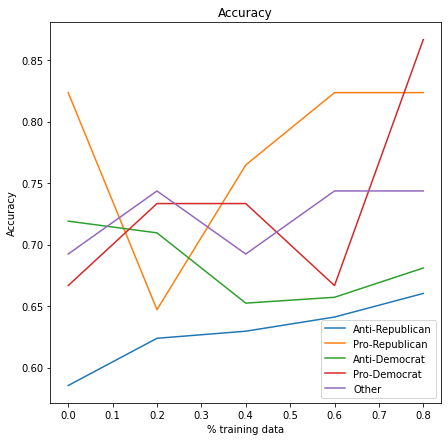

In [112]:
plot_analysis_usa_stance_acc(anti_Republican_dfs)

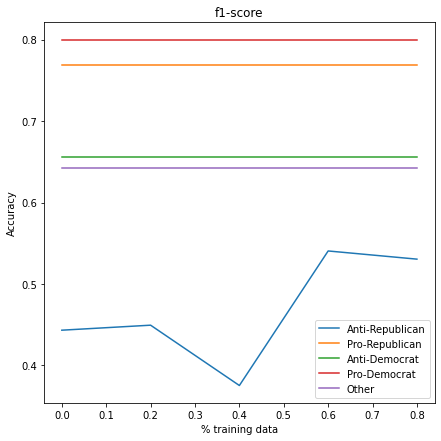

In [113]:
plot_analysis_usa_stance_f1(anti_Republican_dfs)

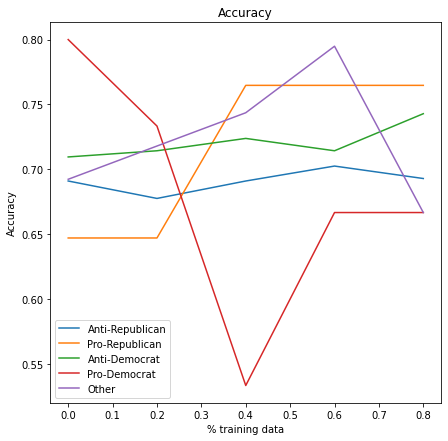

In [114]:
plot_analysis_usa_stance_acc(pro_Republican_dfs)

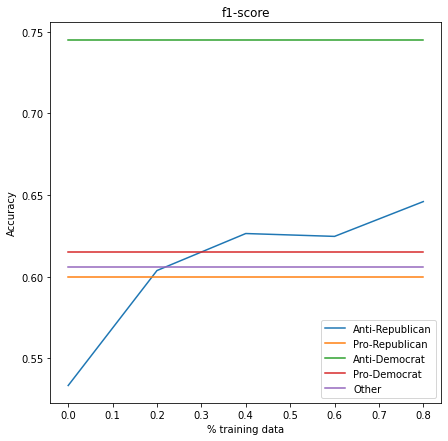

In [115]:
plot_analysis_usa_stance_f1(pro_Republican_dfs)

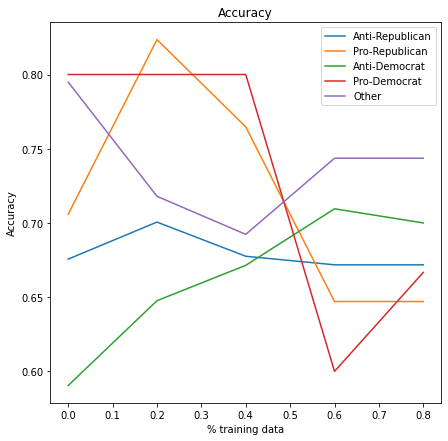

In [117]:
plot_analysis_usa_stance_acc(anti_democrat_dfs)

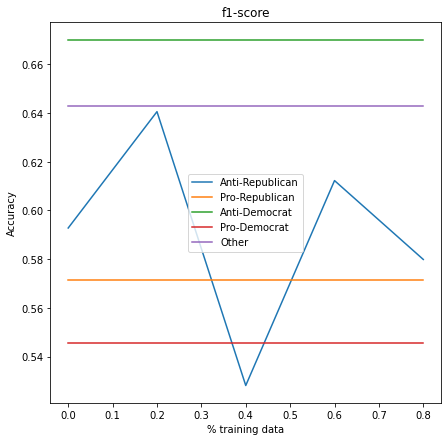

In [118]:
plot_analysis_usa_stance_f1(anti_democrat_dfs)

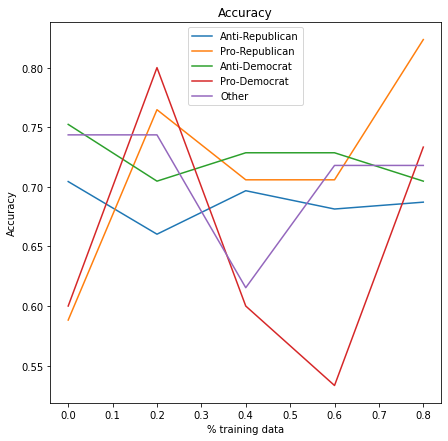

In [119]:
plot_analysis_usa_stance_acc(pro_democrat_dfs)

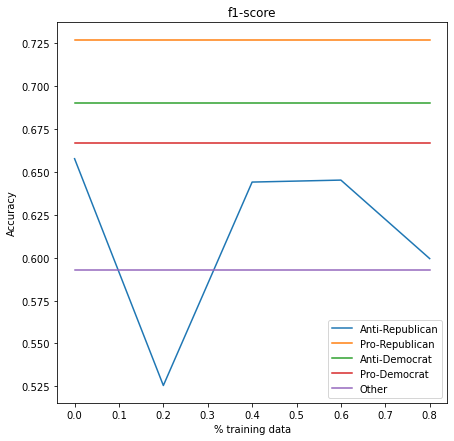

In [120]:
plot_analysis_usa_stance_f1(pro_democrat_dfs)

In [ ]:
BJP_dfs = [BJP_0_df,BJP_2_df,BJP_4_df,BJP_6_df,BJP_8_df]

In [ ]:
Cong_dfs = [cong_0_df,cong_2_df,cong_4_df,cong_6_df,cong_8_df]

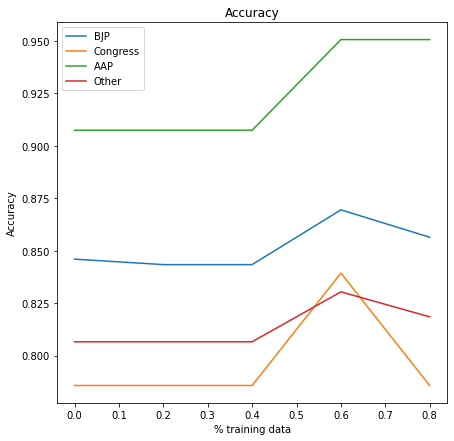

In [ ]:
plot_analysis_india_party_acc(BJP_dfs)

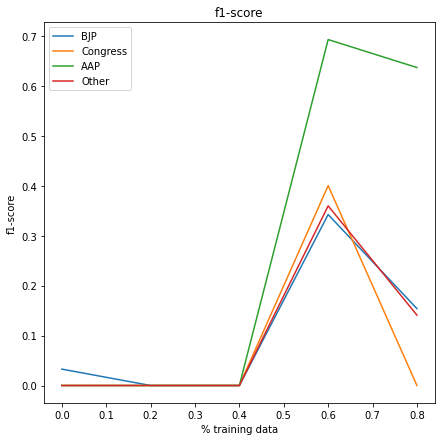

In [ ]:
plot_analysis_india_party_f1(BJP_dfs)

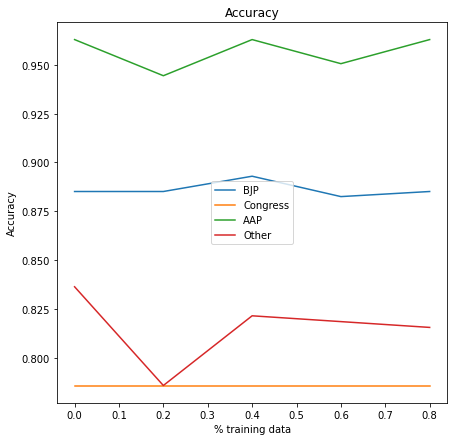

In [ ]:
plot_analysis_india_party_acc(Cong_dfs)

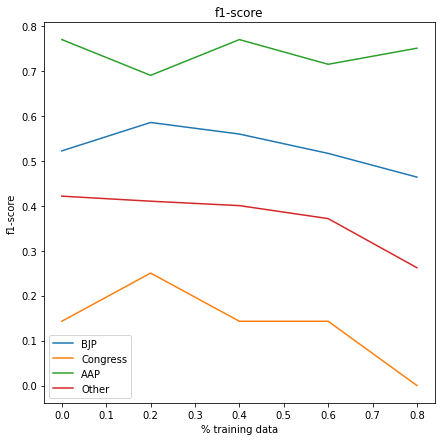

In [ ]:
plot_analysis_india_party_f1(Cong_dfs)

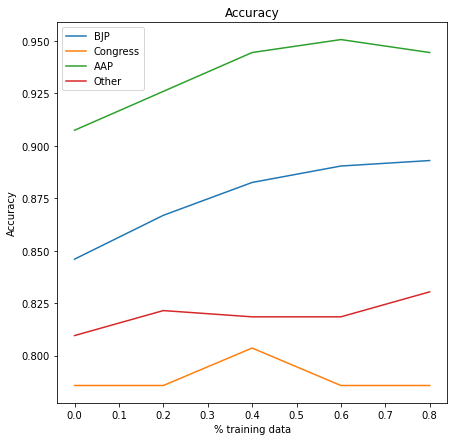

In [ ]:
plot_analysis_india_party_acc(aap_dfs)

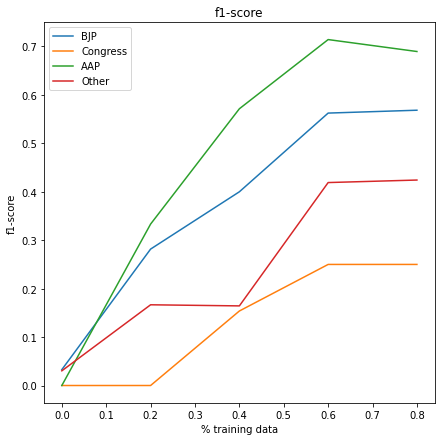

In [ ]:
plot_analysis_india_party_f1(aap_dfs)

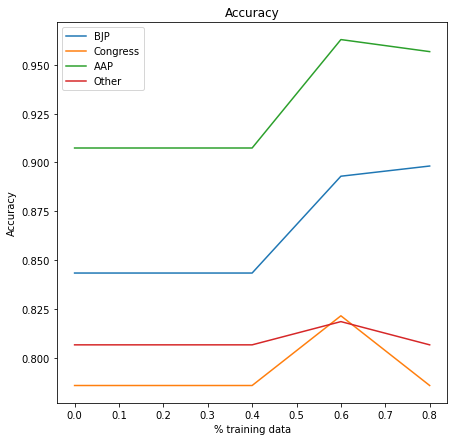

In [ ]:
plot_analysis_india_party_acc(other_dfs)

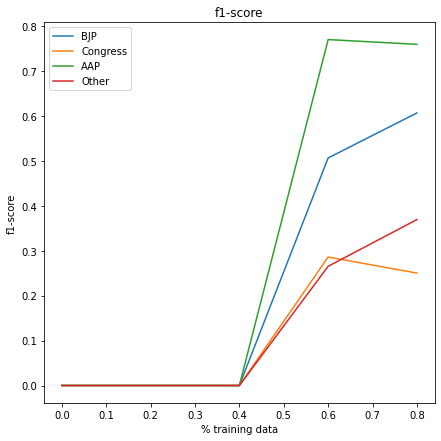

In [ ]:
plot_analysis_india_party_f1(other_dfs)

# Stance Variations

In [ ]:
anti_bjp_dfs = analysis_dfs_stance([0])

Shape (3230, 4)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
4/4 [==============================] - 12s 915ms/step - loss: 0.6897 - acc: 0.6752
Epoch 2/15
4/4 [==============================] - 4s 919ms/step - loss: 0.6655 - acc: 0.8418
Epoch 3/15
4/4 [==============================] - 4s 911ms/step - loss: 0.6197 - acc: 0.8418
Epoch 4/15


----Other----

In [ ]:
labels[0]

In [ ]:
def preprocess(text_string):
    """
    Accepts a text string and replaces:
    1) urls with URLHERE
    2) lots of whitespace with one instance
    3) mentions with MENTIONHERE

    This allows us to get standardized counts of urls and mentions
    Without caring about specific people mentioned
    """
    space_pattern = '\s+'
    giant_url_regex = ('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|'
                       '[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
    mention_regex = '@[\w\-]+'
    parsed_text = re.sub(space_pattern, ' ', text_string)
    parsed_text = re.sub(giant_url_regex, ' ', parsed_text)
    parsed_text = re.sub(mention_regex, ' ', parsed_text)
    return parsed_text


def count_twitter_objs(text_string):
    """
    Accepts a text string and replaces:
    1) urls with URLHERE
    2) lots of whitespace with one instance
    3) mentions with MENTIONHERE
    4) hashtags with HASHTAGHERE

    This allows us to get standardized counts of urls and mentions
    Without caring about specific people mentioned.
    
    Returns counts of urls, mentions, and hashtags.
    """
    space_pattern = '\s+'
    giant_url_regex = ('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|'
                       '[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
    mention_regex = '@[\w\-]+'
    hashtag_regex = '#[\w\-]+'
    parsed_text = re.sub(space_pattern, ' ', text_string)
    parsed_text = re.sub(giant_url_regex, 'URLHERE', parsed_text)
    parsed_text = re.sub(mention_regex, 'MENTIONHERE', parsed_text)
    parsed_text = re.sub(hashtag_regex, 'HASHTAGHERE', parsed_text)
    return (parsed_text.count('URLHERE'), parsed_text.count('MENTIONHERE'),
            parsed_text.count('HASHTAGHERE'))


def other_features(tweet):
    """This function takes a string and returns a list of features.
    These include Sentiment scores, Text and Readability scores,
    as well as Twitter specific features"""
    sentiment = sentiment_analyzer.polarity_scores(tweet)

    words = preprocess(tweet)  #Get text only

    syllables = textstat.syllable_count(words)
    num_chars = sum(len(w) for w in words)
    num_chars_total = len(tweet)
    num_terms = len(tweet.split())
    num_words = len(words.split())
    avg_syl = round(float((syllables + 0.001)) / float(num_words + 0.001), 4)
    num_unique_terms = len(set(words.split()))

    ###Modified FK grade, where avg words per sentence is just num words/1
    FKRA = round(
        float(0.39 * float(num_words) / 1.0) + float(11.8 * avg_syl) - 15.59,
        1)
    ##Modified FRE score, where sentence fixed to 1
    FRE = round(
        206.835 - 1.015 * (float(num_words) / 1.0) - (84.6 * float(avg_syl)),
        2)

    twitter_objs = count_twitter_objs(tweet)
    retweet = 0
    if "rt" in words:
        retweet = 1
    features = [
        FKRA, FRE, syllables, avg_syl, num_chars, num_chars_total, num_terms,
        num_words, num_unique_terms, sentiment['neg'], sentiment['pos'],
        sentiment['neu'], sentiment['compound'], twitter_objs[2],
        twitter_objs[1], twitter_objs[0], retweet
    ]
    #features = pandas.DataFrame(features)
    return features


def get_feature_array(tweets):
    feats = []
    for t in tweets:
        feats.append(other_features(t))
    return np.array(feats)


def basic_tokenize(tweet):
    stripped = [w.translate(table) for w in tweet.split()]
    tweet = " ".join(stripped).strip()
#     print(tweet)
    return tweet

def load_data(tweets, labels_data):

    labels = []
 
    for i in labels_data:
      if(i=='Hate' or i=='Offensive'):
        labels.append(1)
      else:
        labels.append(2)  
    return tweets, labels


def train_model(tweets_set, Y):
  
    tweets_tags = []
    for tweet in tweets_set:
        tokens = basic_tokenize(preprocess(tweet))
        tags = nltk.pos_tag(tokens)
        tag_list = [x[1] for x in tags]
        tag_str = " ".join(tag_list)
        tweets_tags.append(tag_str)
    pos_features = pos_vectorizer.fit_transform(
        pd.Series(tweets_tags)).toarray()
    tfidf_features = vectorizer.fit_transform(tweets_set).toarray()
    other_features = get_feature_array(tweets_set)
    M = np.concatenate([tfidf_features, pos_features, other_features], axis=1)
    print(M.shape)
    X = pd.DataFrame(M)
    Y = [1 if i == 1 else 0 for i in Y]
    X, Y = shuffle(X, Y, random_state=42)
    return X, Y
 
    
def score_tweet(new_tweet='', print_=True):
    tweets_tags = []
    if len(new_tweet) == 0:
        new_tweet = input()

    tokens = basic_tokenize(preprocess(new_tweet))
    tags = nltk.pos_tag(tokens)
    tag_list = [x[1] for x in tags]
    tag_str = " ".join(tag_list)
    tweets_tags.append(tag_str)
    pos_features = pos_vectorizer.transform(pd.Series(tweets_tags)).toarray()
    tfidf_features = vectorizer.transform([new_tweet]).toarray()
    
    other_features = get_feature_array([new_tweet])
    M_test = np.concatenate([tfidf_features, pos_features, other_features],
                            axis=1)
    X_test = pd.DataFrame(M_test)
    pred_class = hate_map[int(davidson_model.predict(X_test)[0])]
    if print_:
        print("Predicted class is: {}".format(pred_class))
    pred_probs = davidson_model.predict_proba(X_test)[0]
    if print_:
        print("Predicted Prob of HATE: {}".format(pred_probs[1]))
    return pred_class, pred_probs[1]

In [ ]:
import nltk
nltk.download('stopwords')

In [ ]:
stopwords = nltk.corpus.stopwords.words("english")
other_exclusions = ["#ff", "ff", "rt"]
stopwords.extend(other_exclusions)
table = str.maketrans('', '', string.punctuation)
stemmer = PorterStemmer()

sentiment_analyzer = VS()

pos_vectorizer = TfidfVectorizer(
    tokenizer=None,
    lowercase=False,
    preprocessor=None,
    ngram_range=(1, 3),
    stop_words=None,
    use_idf=False,
    smooth_idf=False,
    norm=None,
    decode_error='replace',
    max_features=5000,
    min_df=5,
    max_df=0.75,
)

vectorizer = TfidfVectorizer(tokenizer=basic_tokenize,
                             preprocessor=preprocess,
                             ngram_range=(1, 3),
                             stop_words=stopwords,
                             use_idf=True,
                             smooth_idf=False,
                             norm=None,
                             decode_error='replace',
                             max_features=10000,
                             min_df=5,
                             max_df=0.75)


model = tf.keras.Sequential()
model.add(keras.layers.Embedding(8038, 50, mask_zero=True))
model.add(Bidirectional(LSTM(64)))
model.add(keras.layers.Dense(16, activation=tf.nn.relu))
model.add(keras.layers.Dense(1, activation=tf.nn.sigmoid))

model.compile(optimizer=Adam(lr=0.001), loss='binary_crossentropy', metrics=['acc'])

davidson_model = LogisticRegression(class_weight='balanced', penalty='l2')

hate_map = {0: "NON HATE", 1: "HATE"}

In [ ]:
def build_word_index_for_fold(tweets):
    # A dictionary mapping words to an integer index
    word_index = build_words_indexing(tweets)

    reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
    return(word_index, reverse_word_index)
  
def build_words_indexing(tweets, most_common=None):
    
    words = {}
    for index, tw in enumerate(tweets):
        for w in tw:
            try:
                words[w] +=1
            except:
                words[w] = 1    
                
    words_indexing = {}
    for index, word in enumerate(words):
        words_indexing[word] = index        

    words_indexing = {k:(v+2) for k,v in words_indexing.items()}
    words_indexing["<PAD>"] = 0
    words_indexing["<UNK>"] = 1
        
    return(words_indexing)

In [ ]:
tweets_set, Y = load_data(tweets, labels)

In [ ]:
X_t, Y_t = train_model(tweets_set, Y)

In [ ]:
Y_t

In [ ]:
hi1, hi2 = build_word_index_for_fold(X_t)

In [ ]:
print(len(hi1))

In [ ]:
model.fit(np.array(X_t), np.array(Y_t), epochs=1, verbose = 0)

In [ ]:
print(X_t)